In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import reader
import visualize 
import preprocessing
import features

from scipy import stats
import scipy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os
from scipy.io import wavfile 
from scipy.ndimage import median_filter

from random import shuffle
import neurokit2 as nk

In [3]:
pts = [i for i in range(1, 74, 1)]
full_sessions = ['PRE','POST','TEST01', 'TEST02','TEST03','TEST04','TEST05','TEST06','TEST07','TEST08']

win_size = 60.0
stride = 1.0

On P049


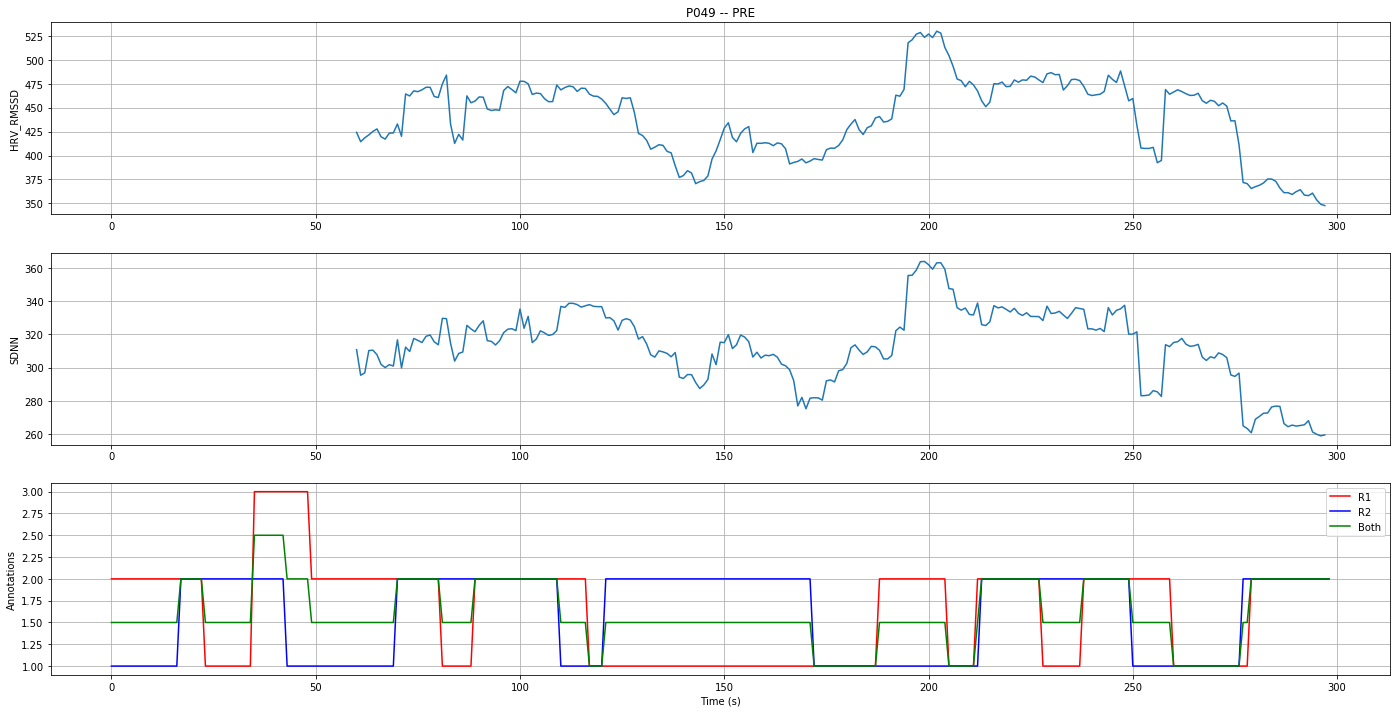

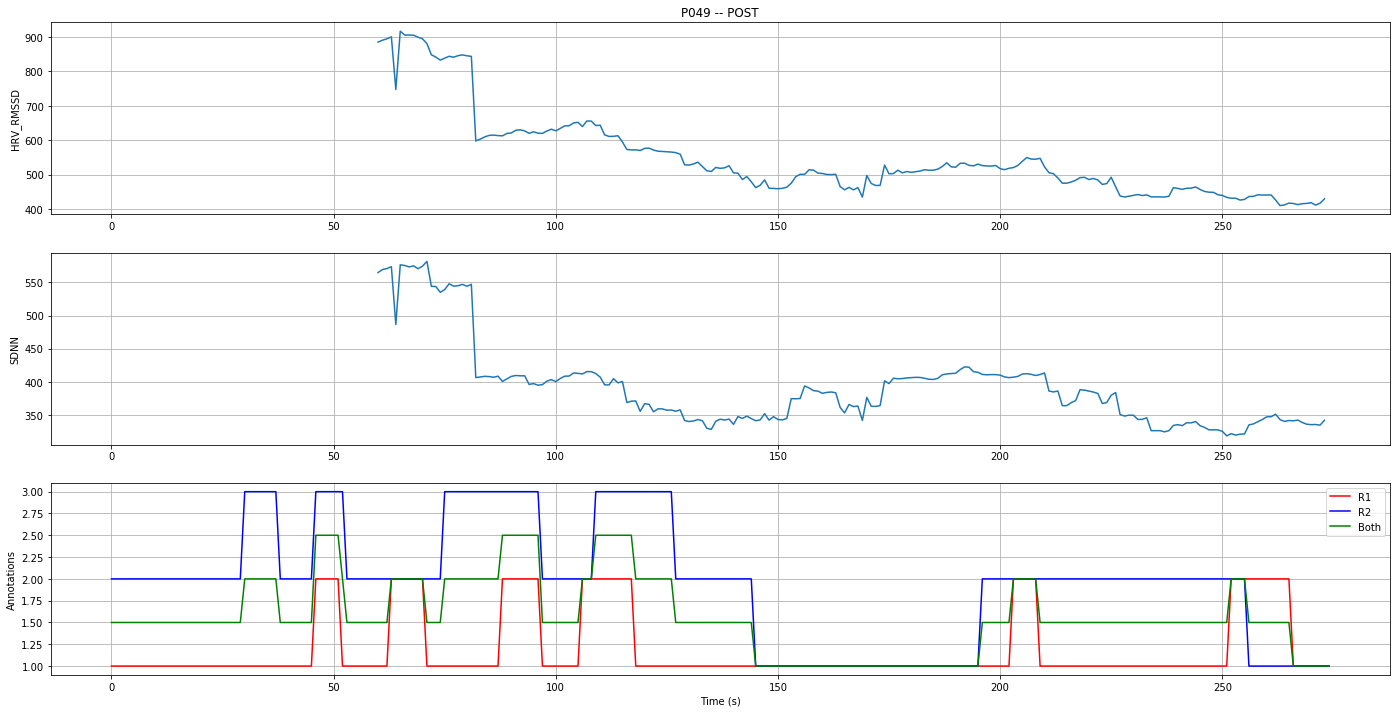

On P048


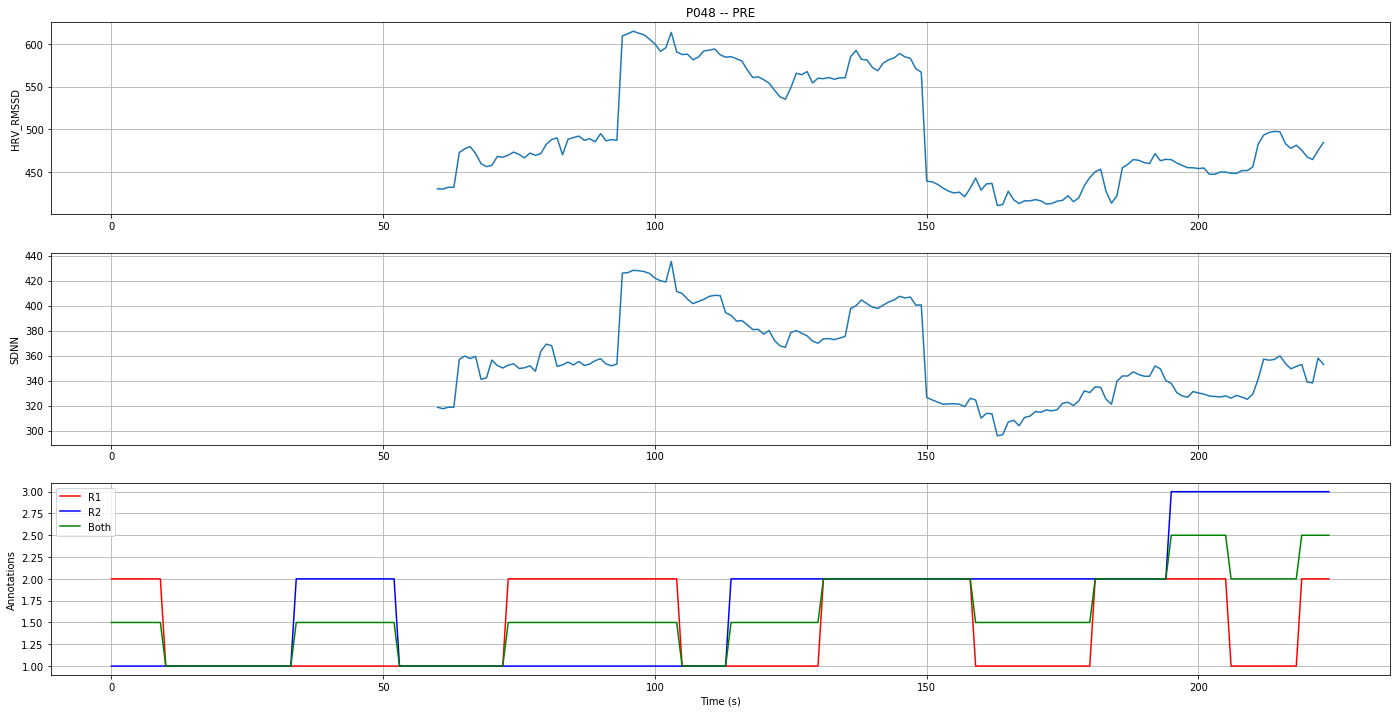

Participant 048 does not have session POST annotations
On P065


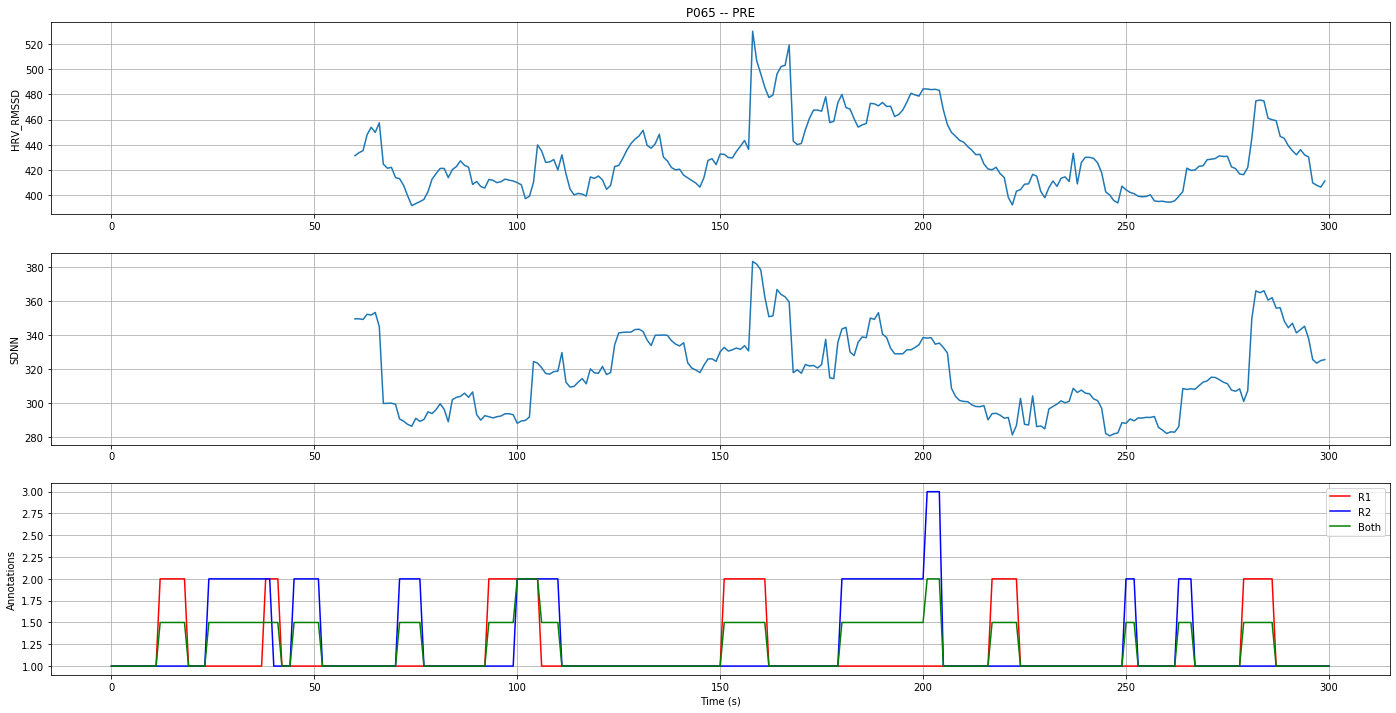

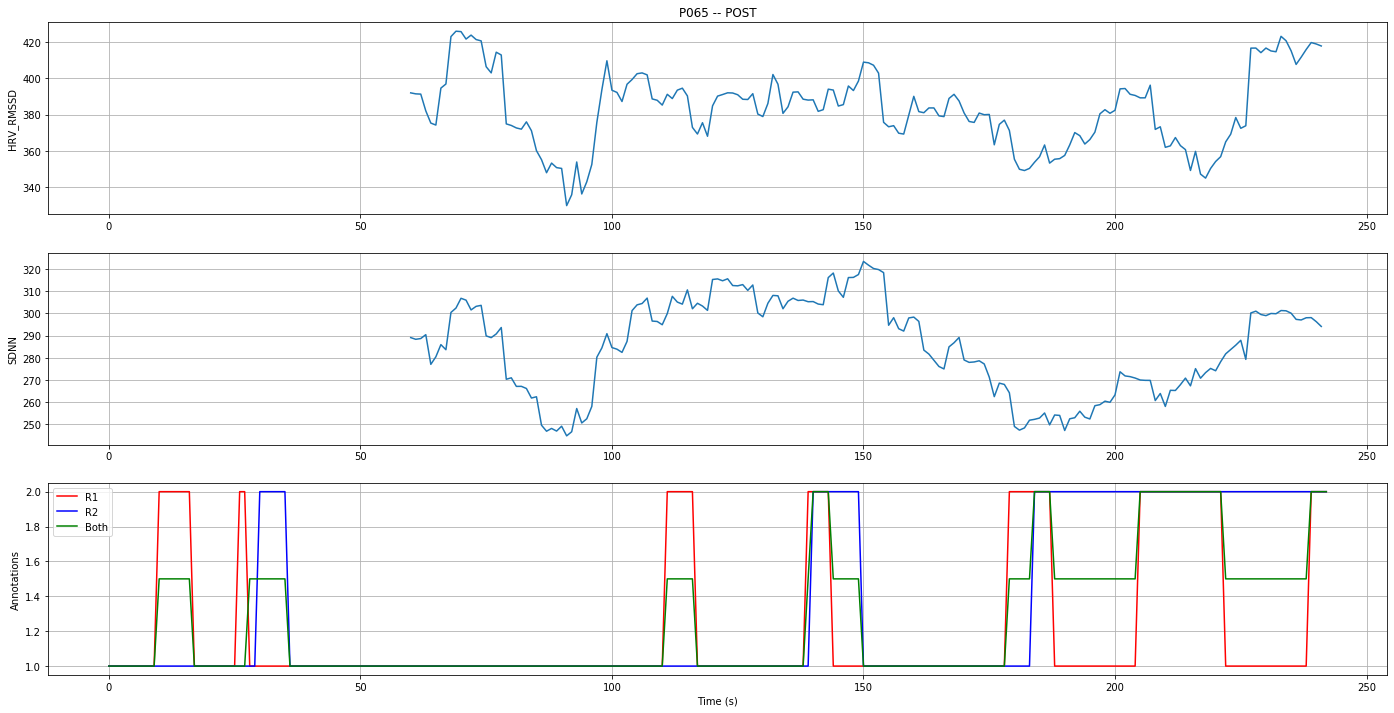

On P015
Participant 015 does not have baseline HR data
On P030
Participant 030 does not have baseline HR data
On P071


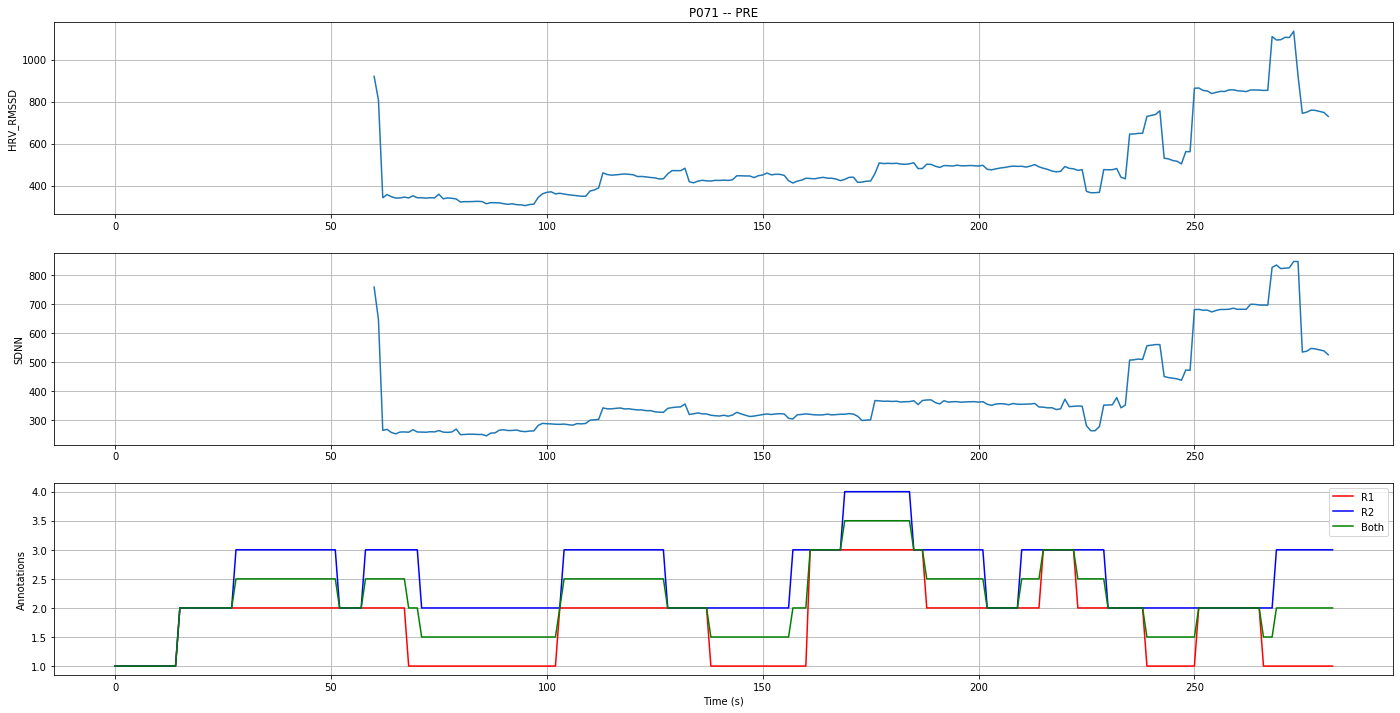

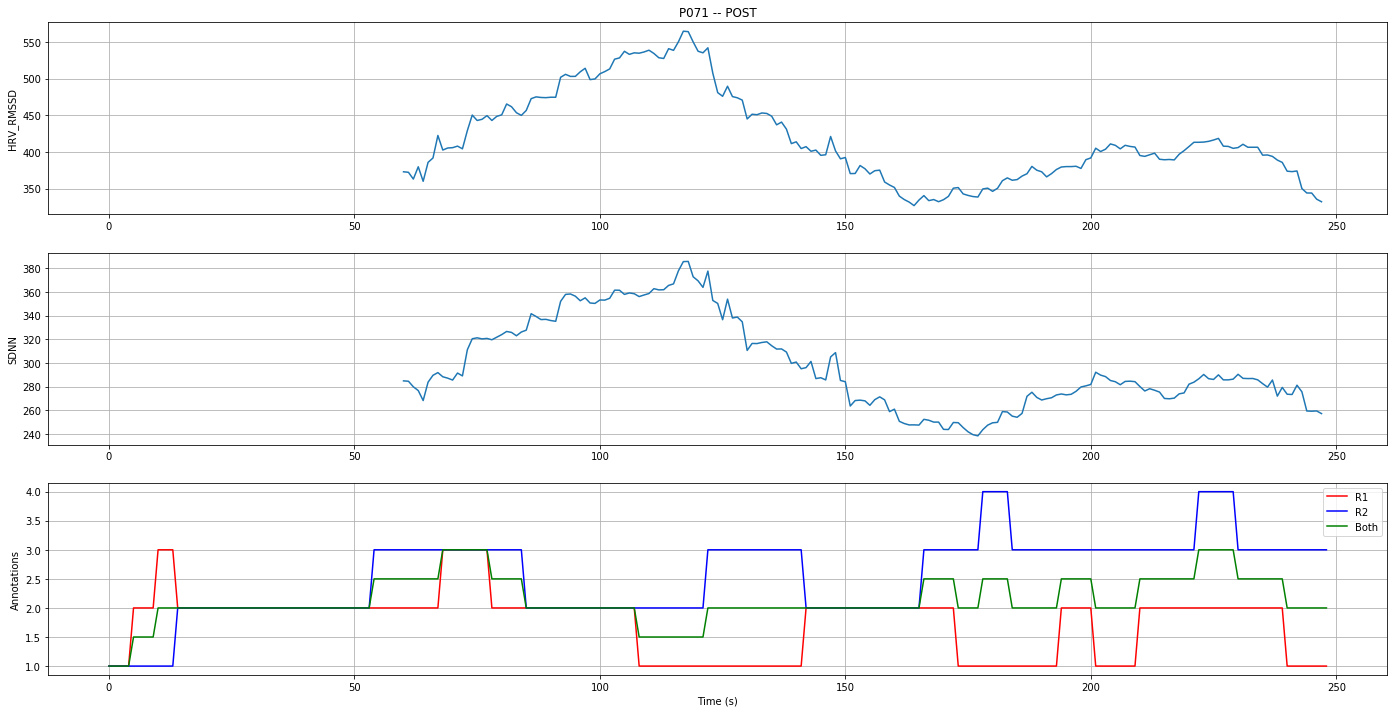

On P010
Participant 010 does not have baseline HR data
On P064


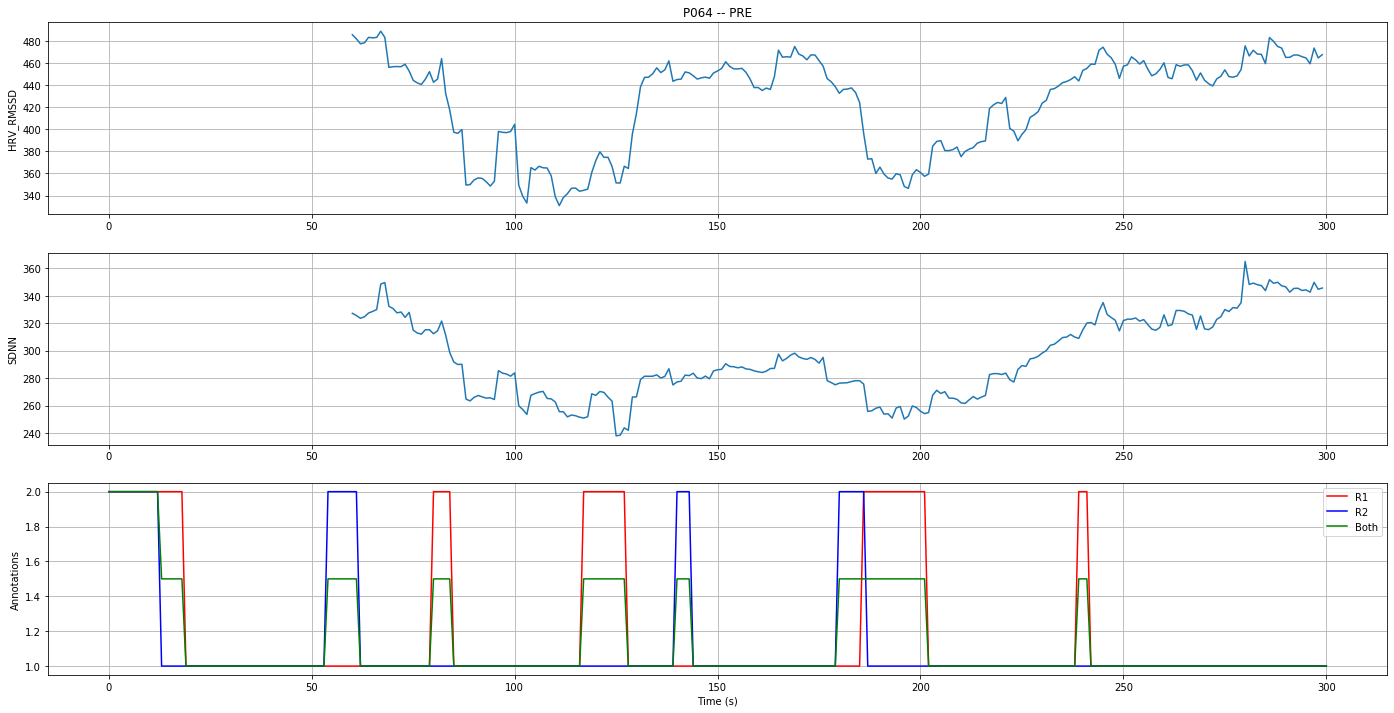

Participant 064 does not have session POST annotations
On P019
Participant 019 does not have baseline HR data
On P003


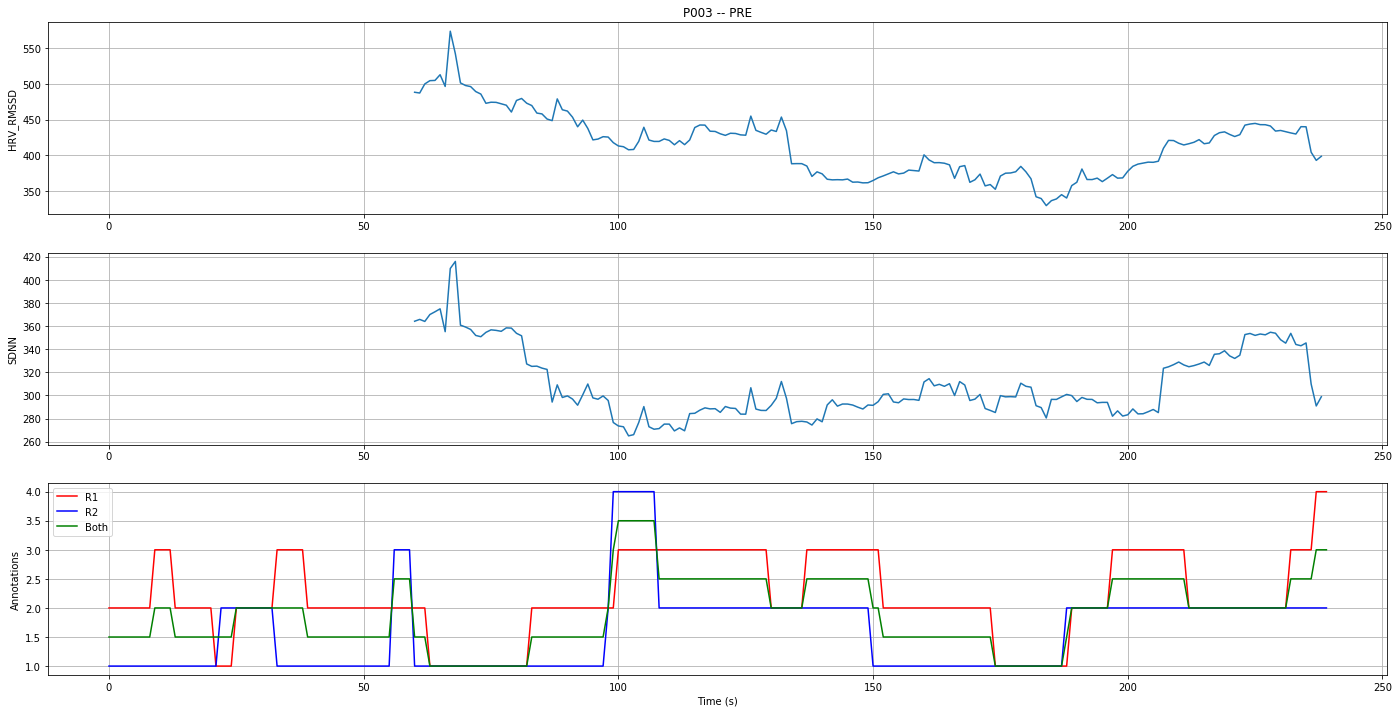

Participant 003 does not have session POST annotations
On P043


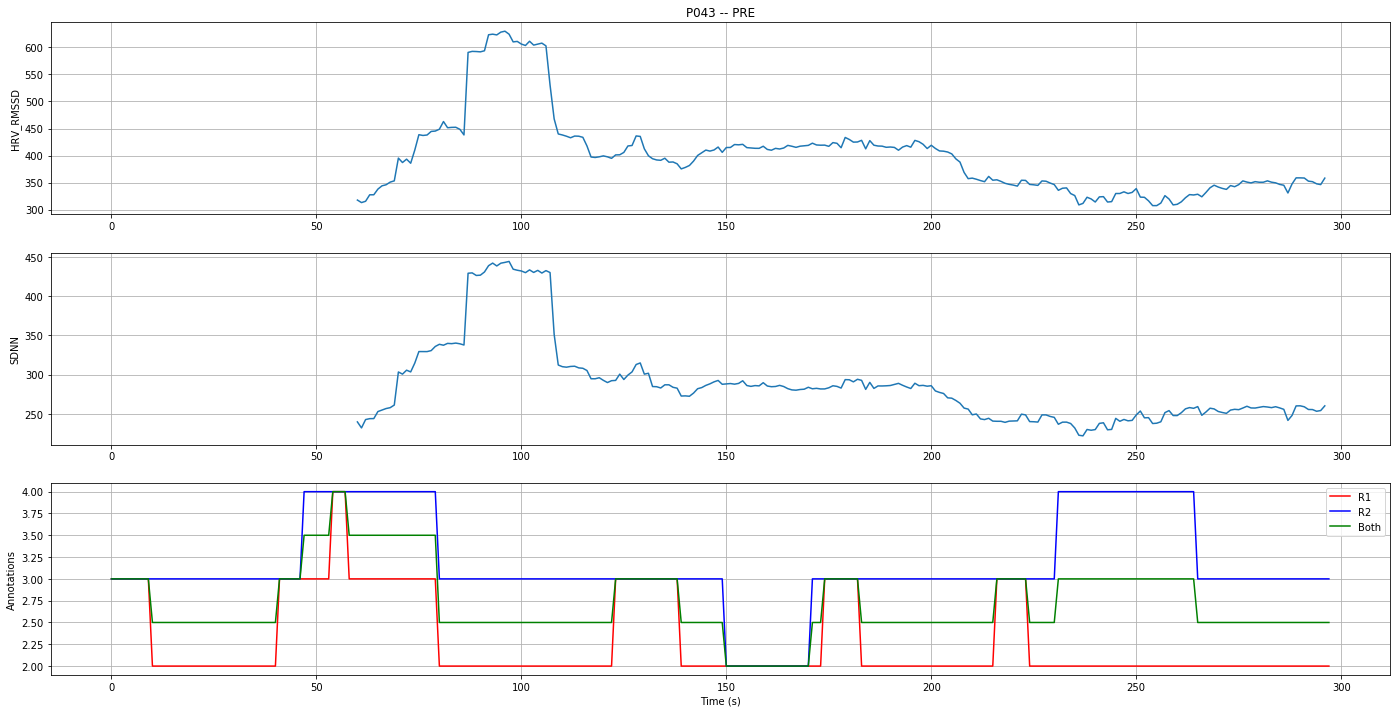

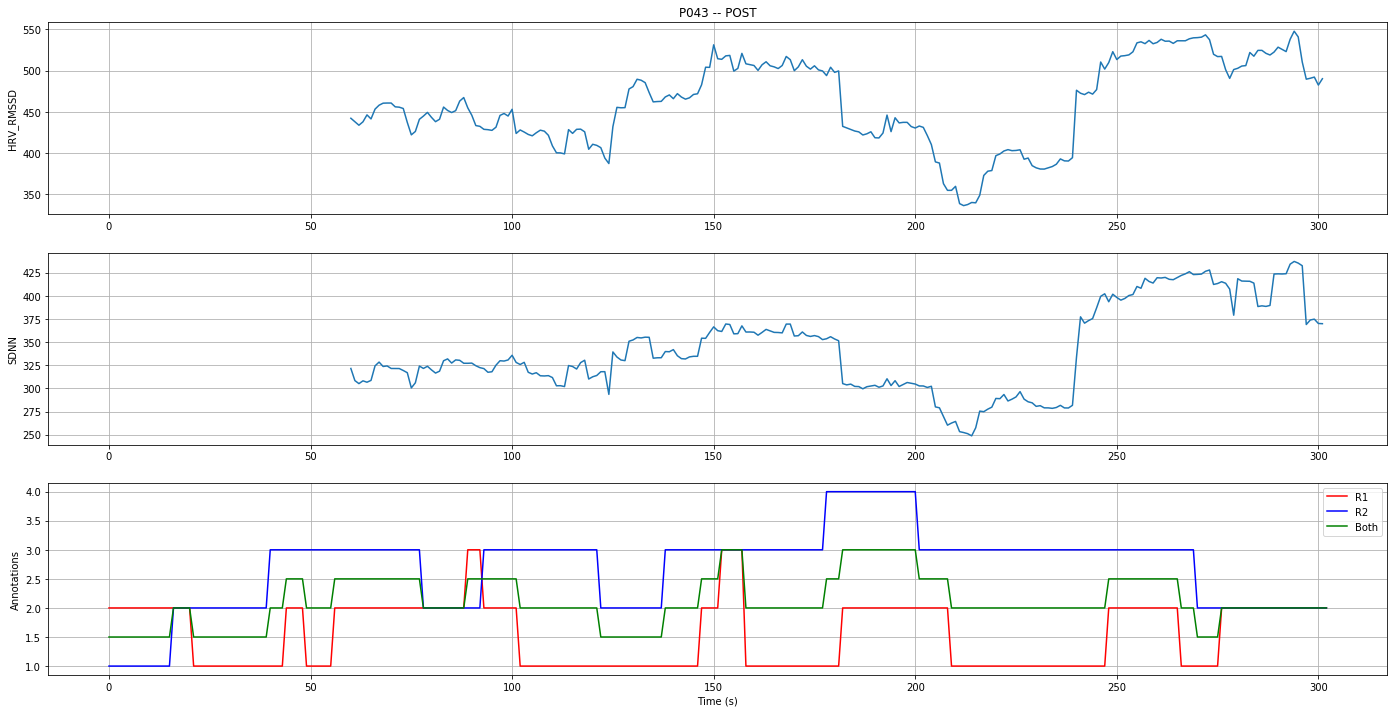

On P061


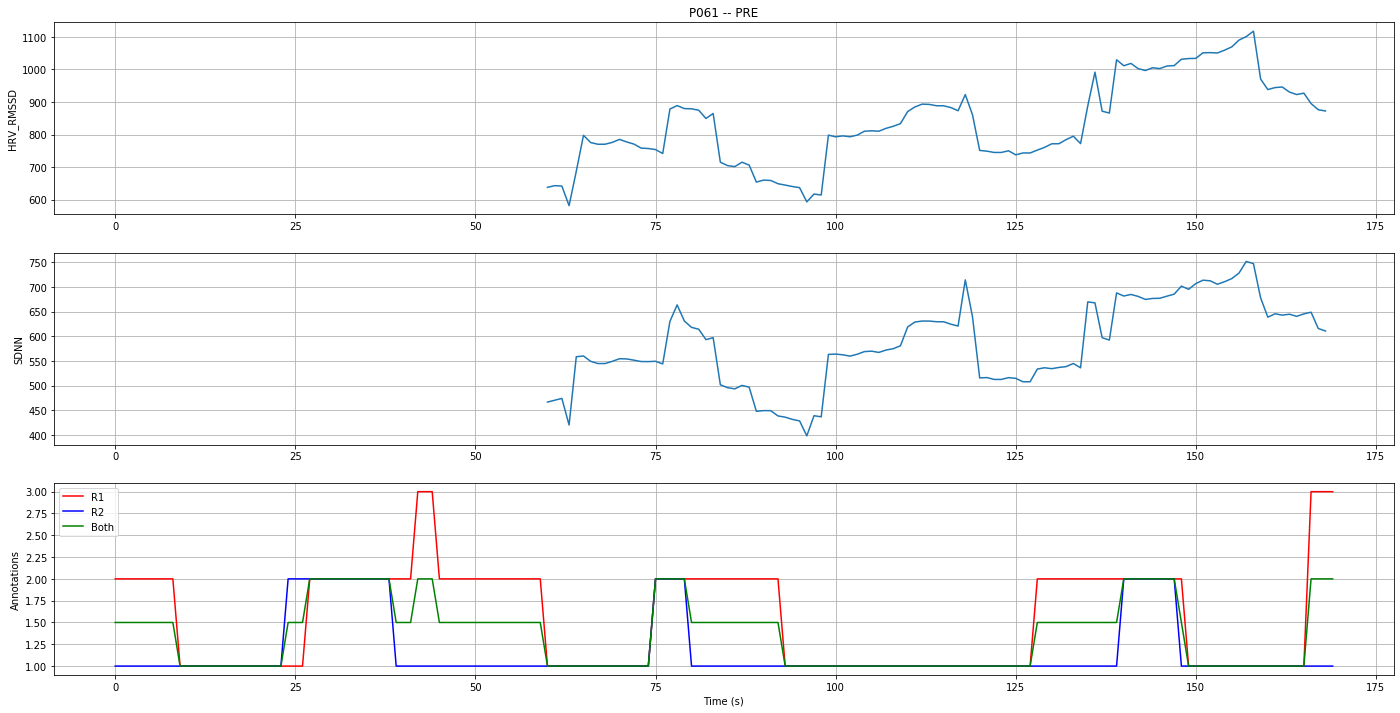

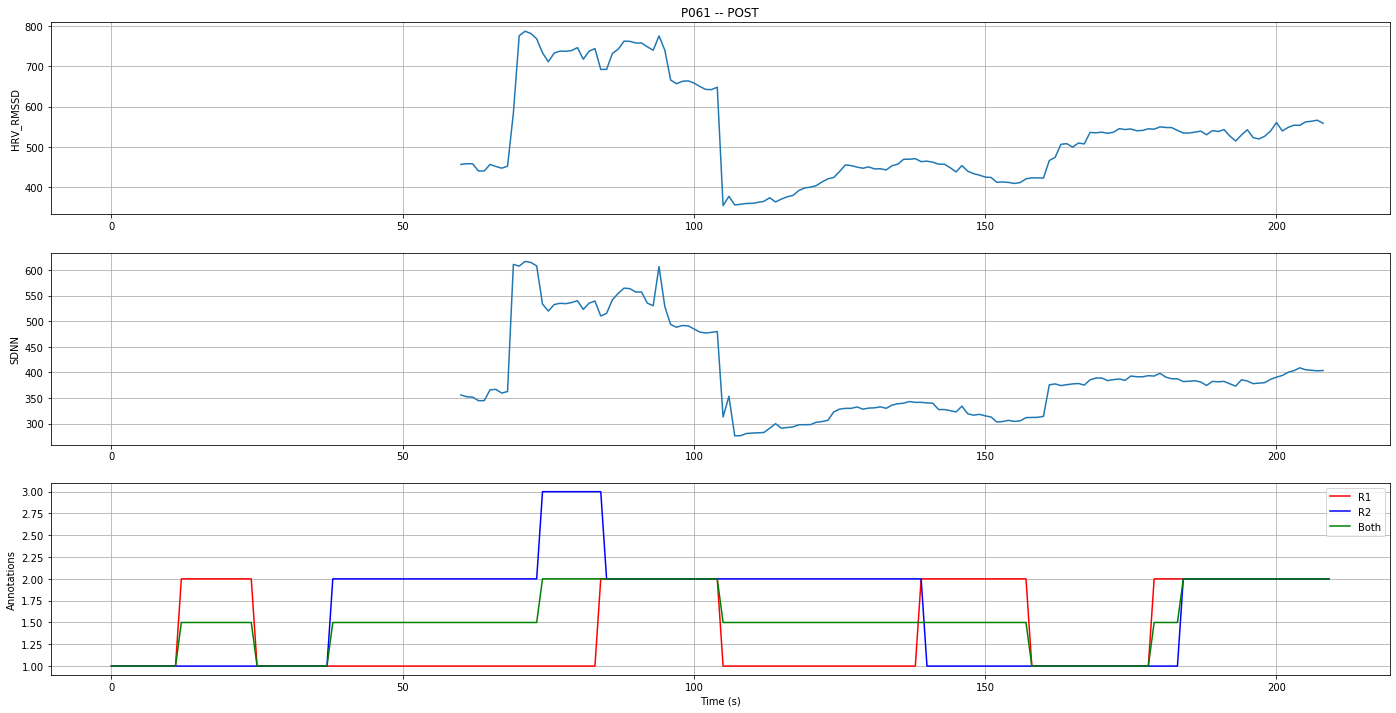

On P050


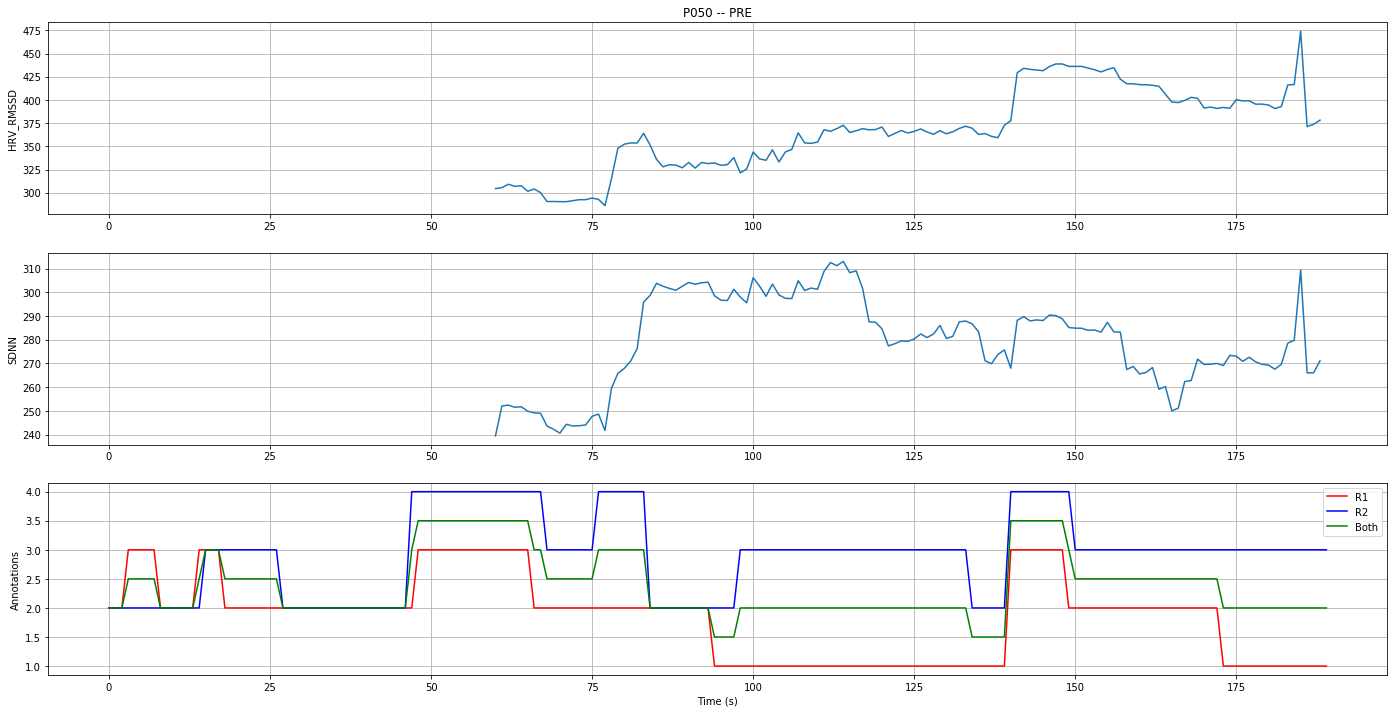

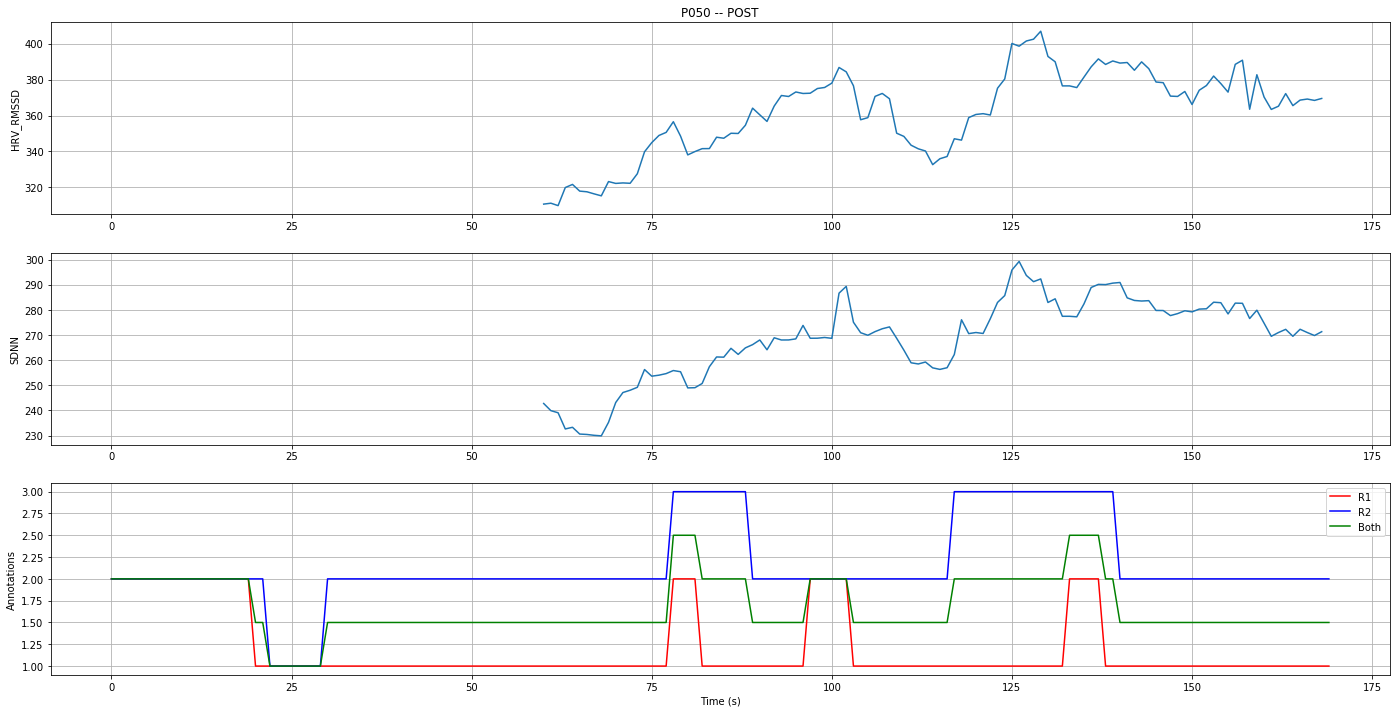

On P002
Participant 002 does not have baseline HR data
On P072


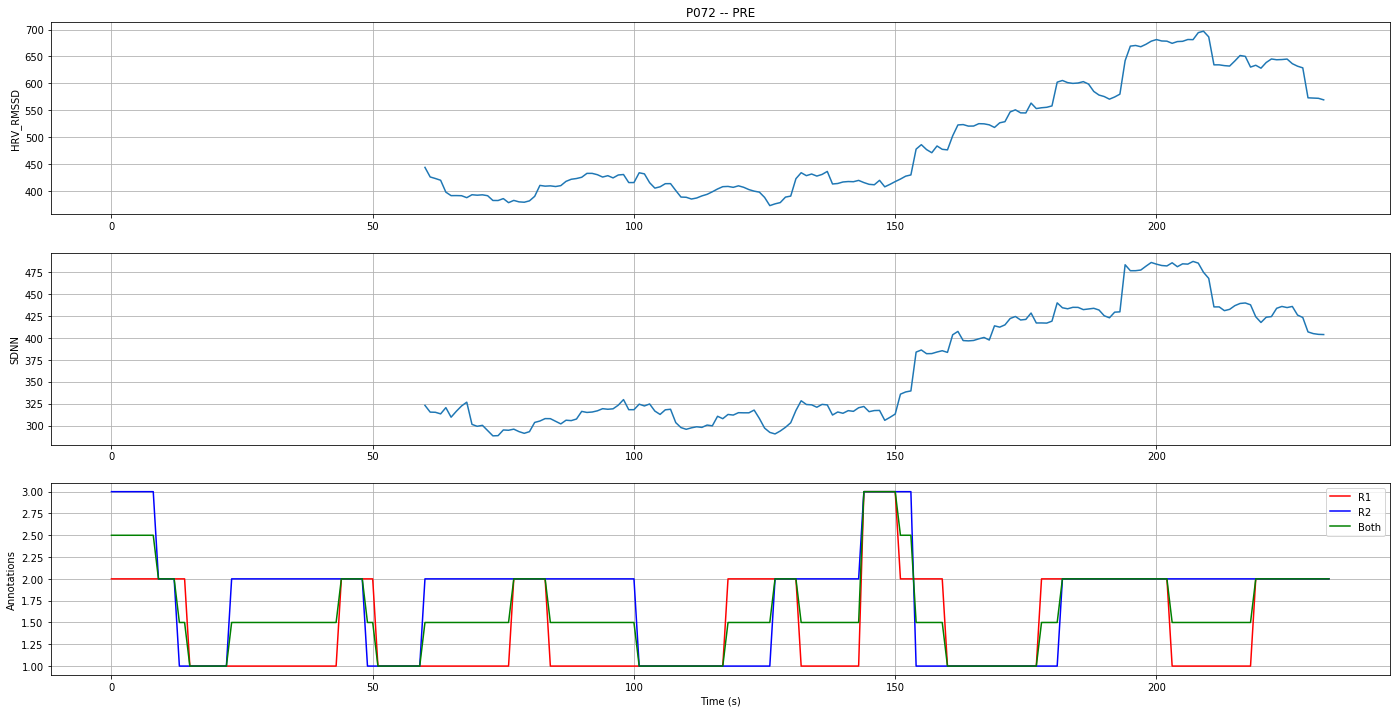

Participant 072 does not have session POST annotations
On P039


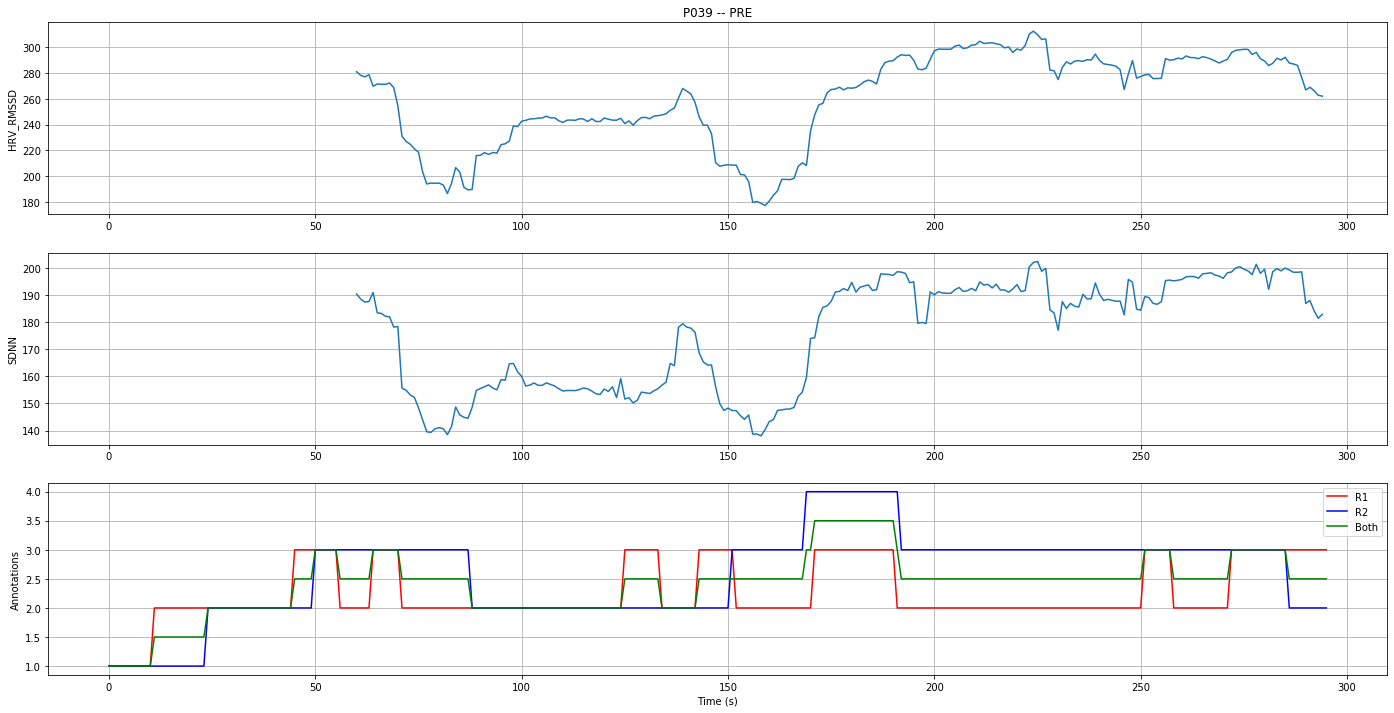

Participant 039 does not have session POST annotations
On P051


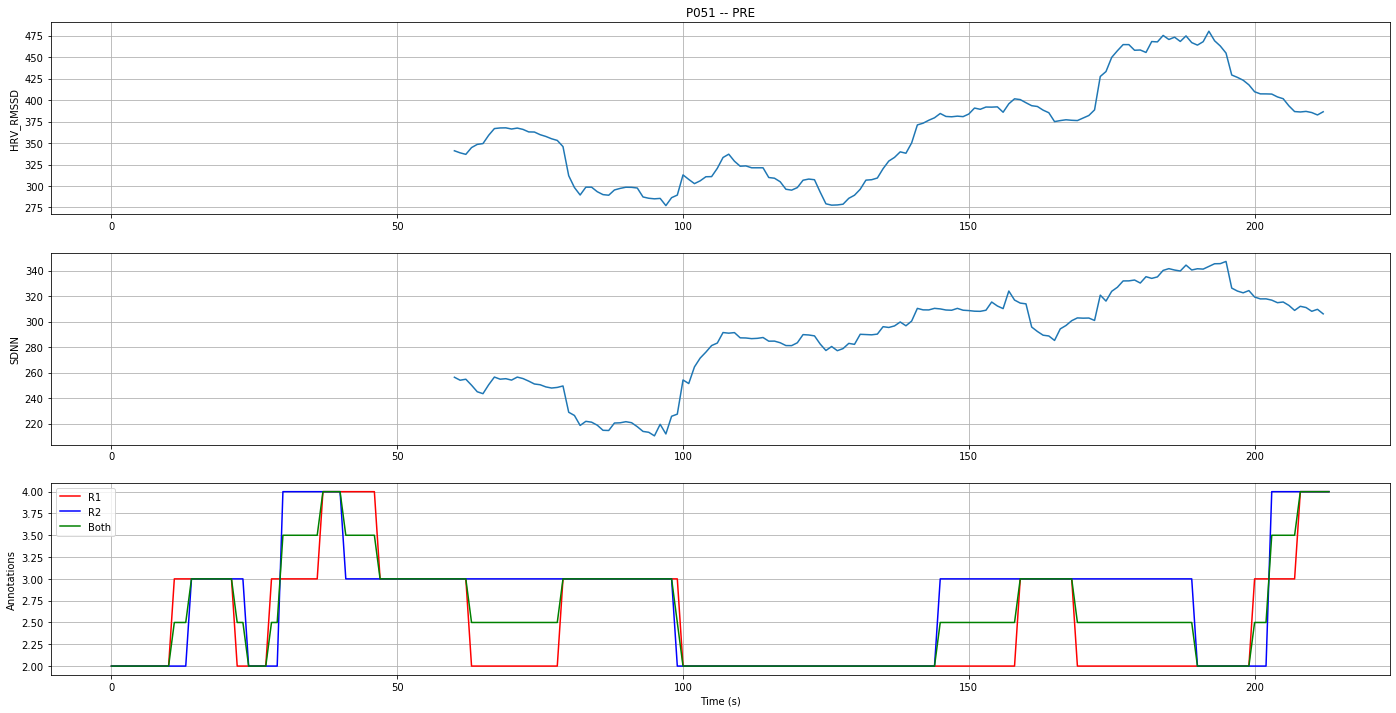

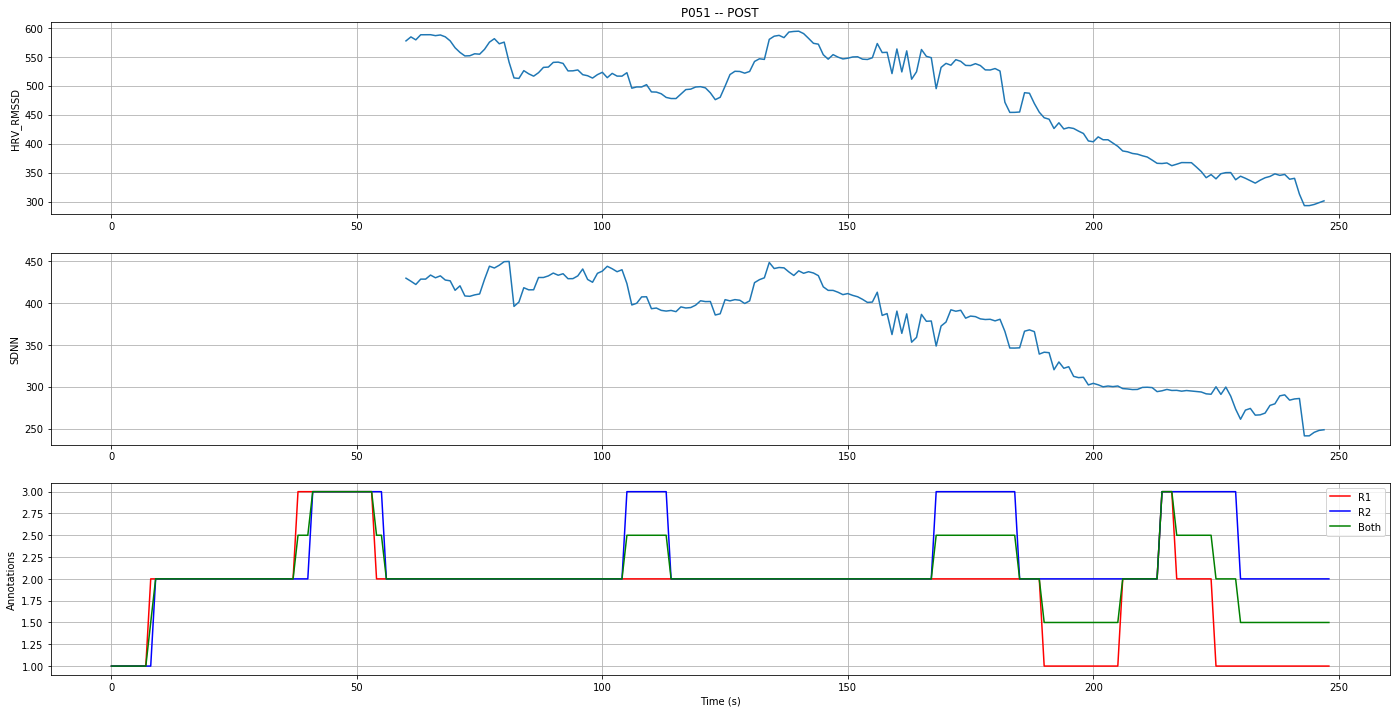

On P004


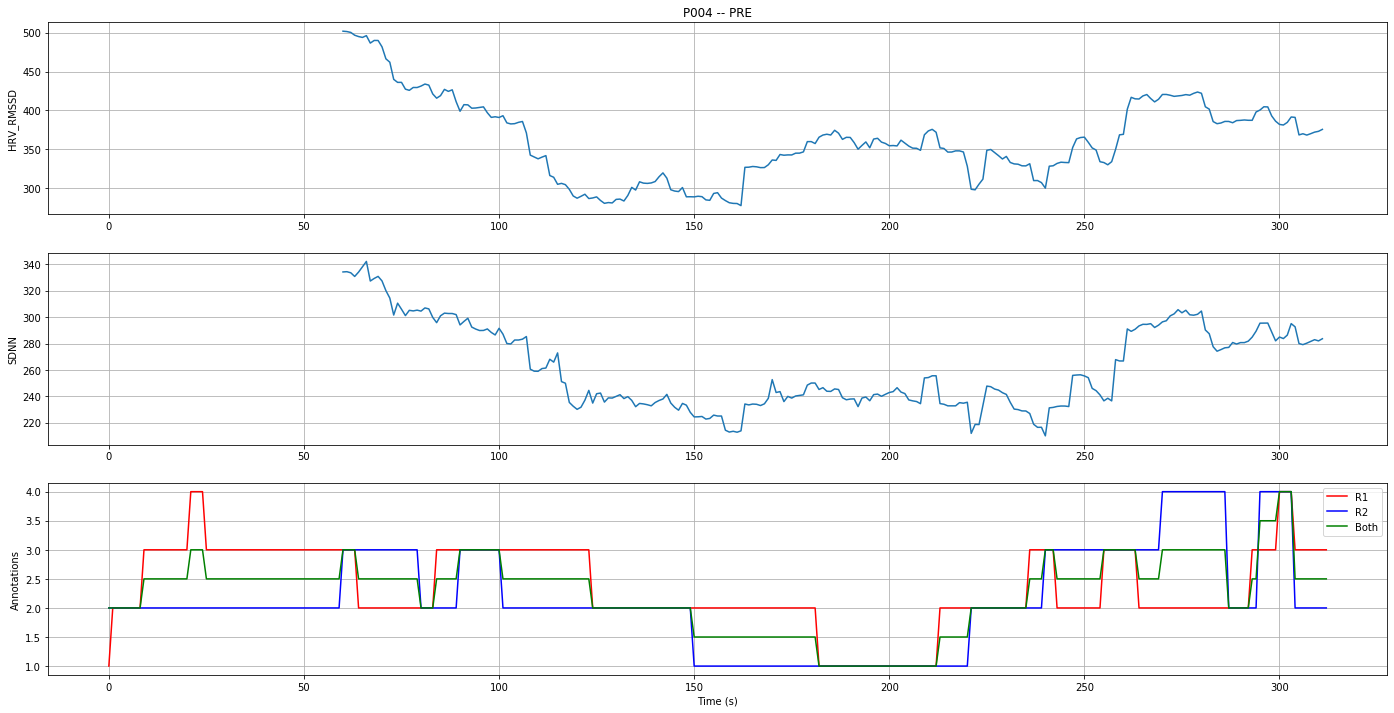

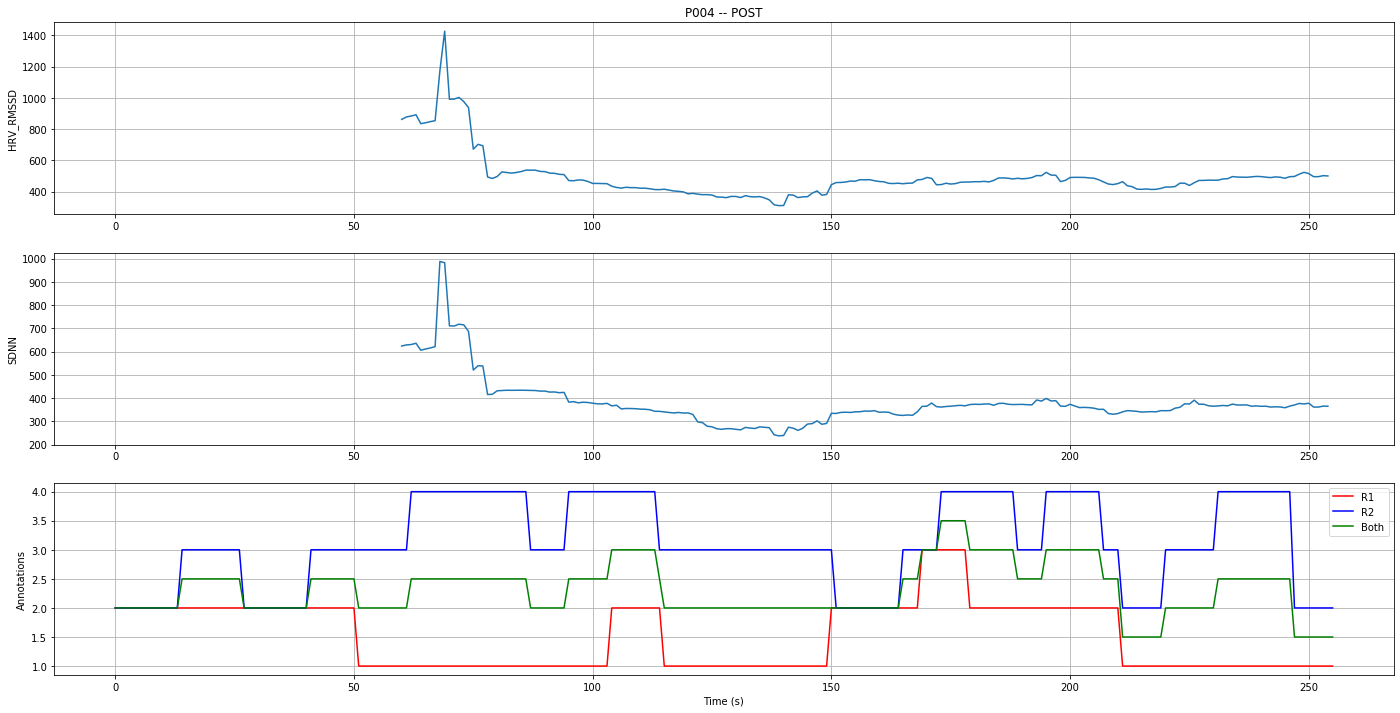

On P016


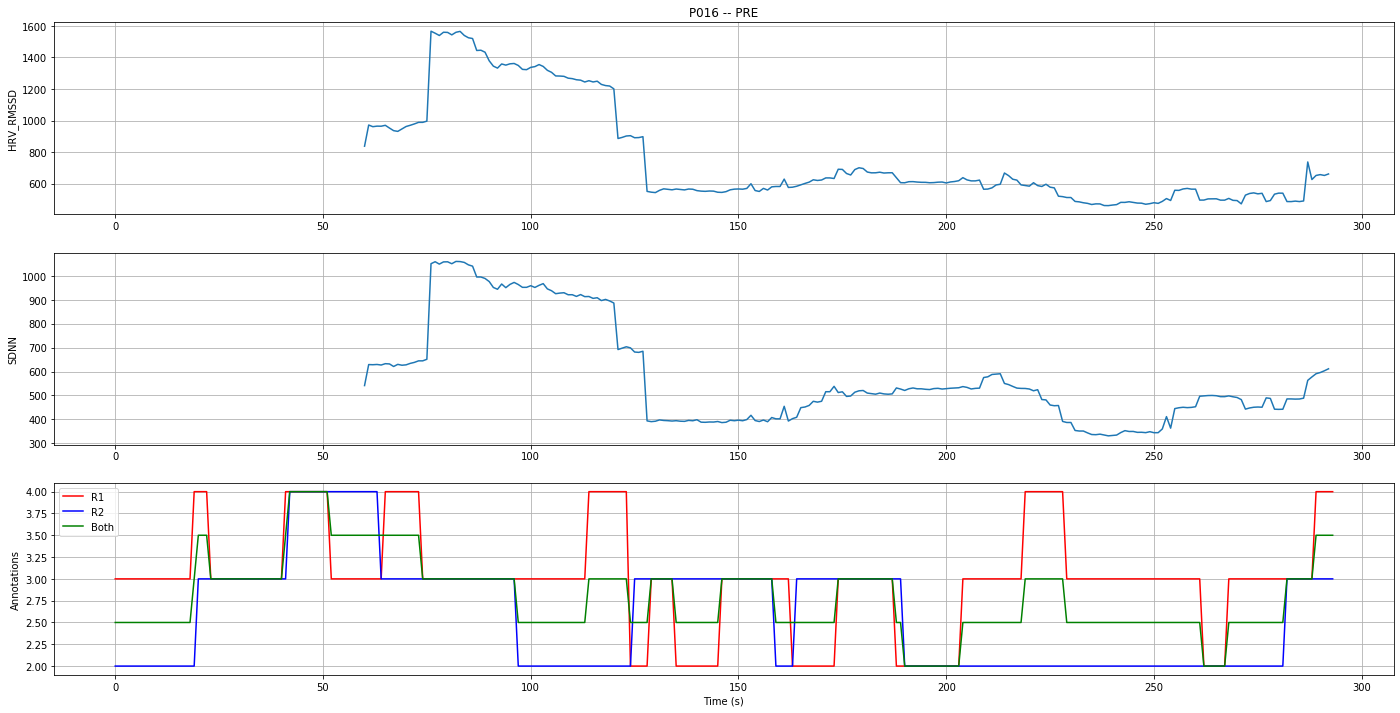

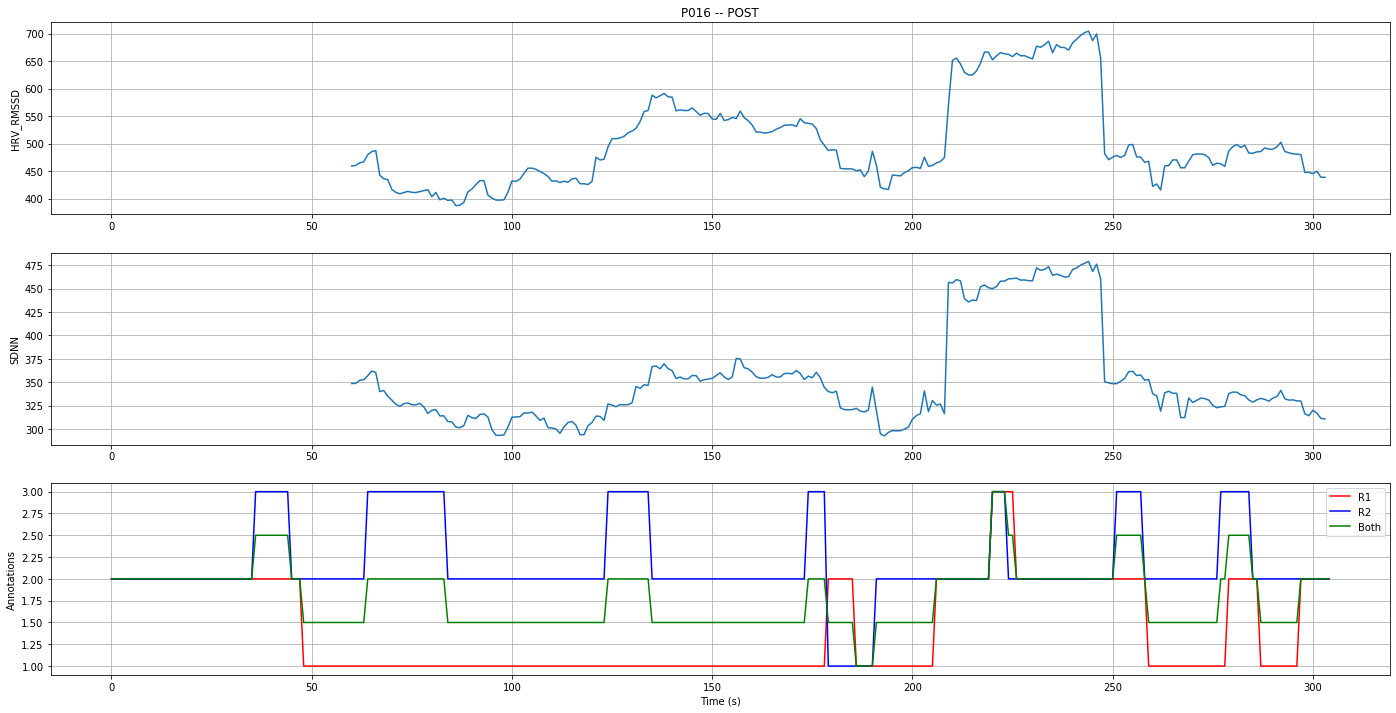

On P070
Participant 070 does not have baseline HR data
On P066


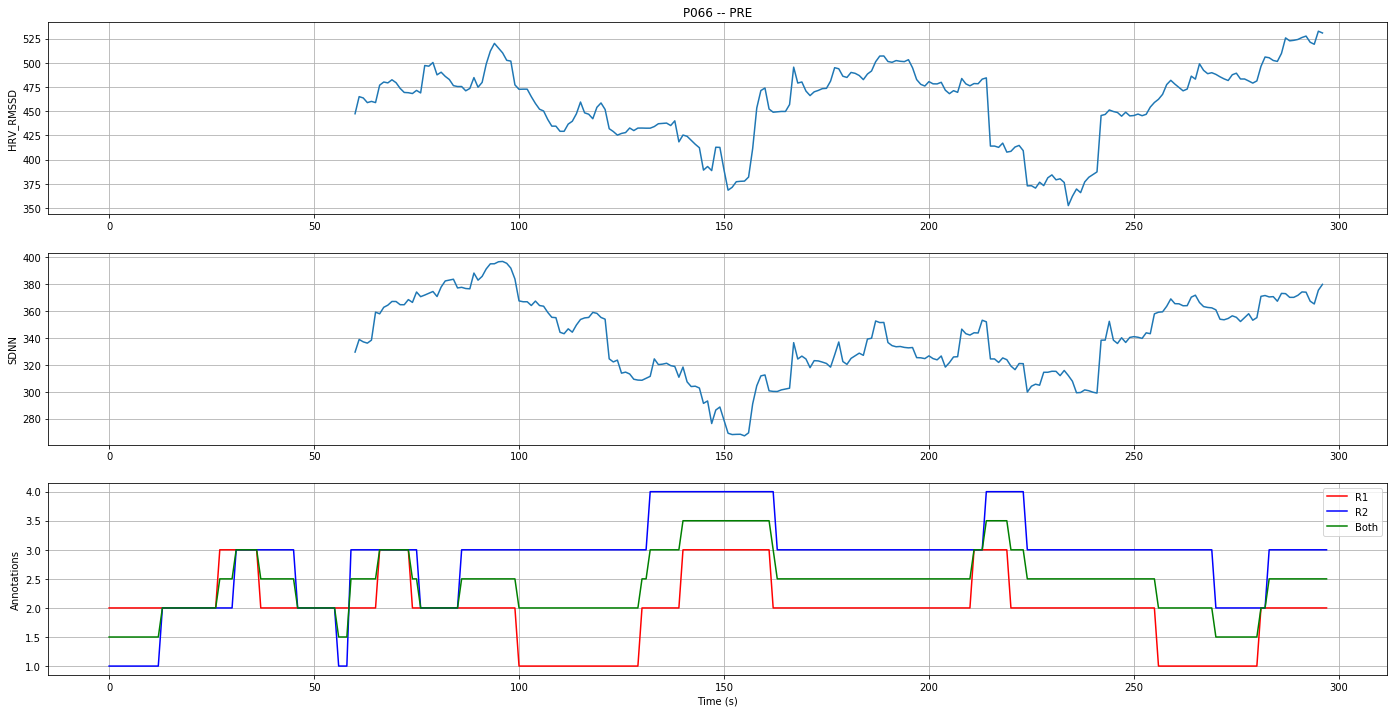

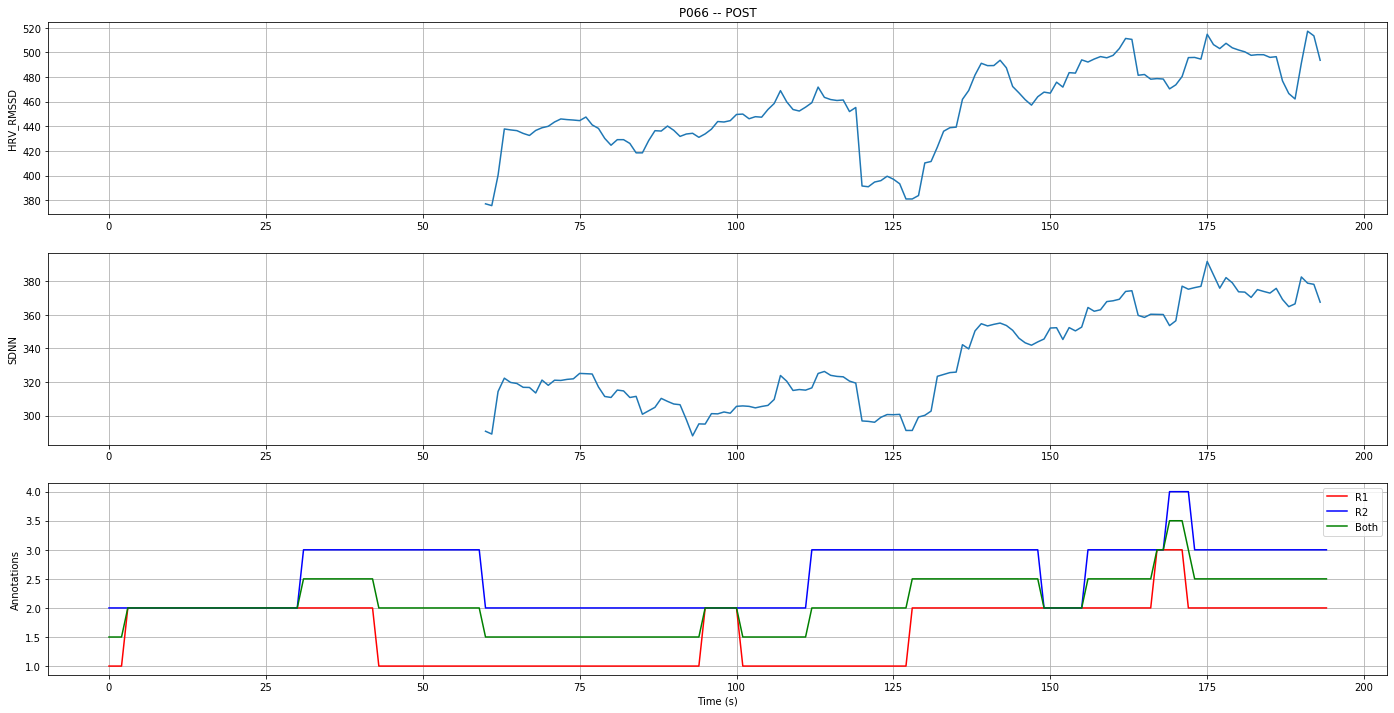

On P062


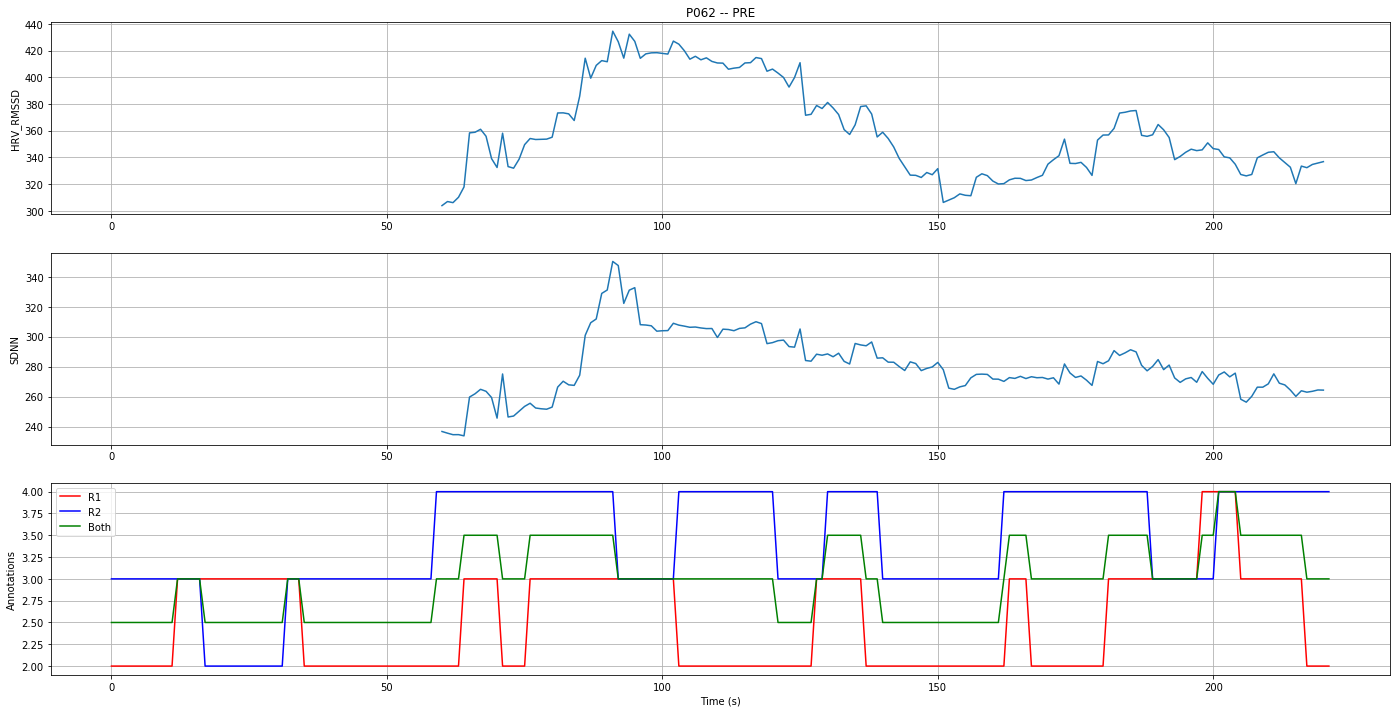

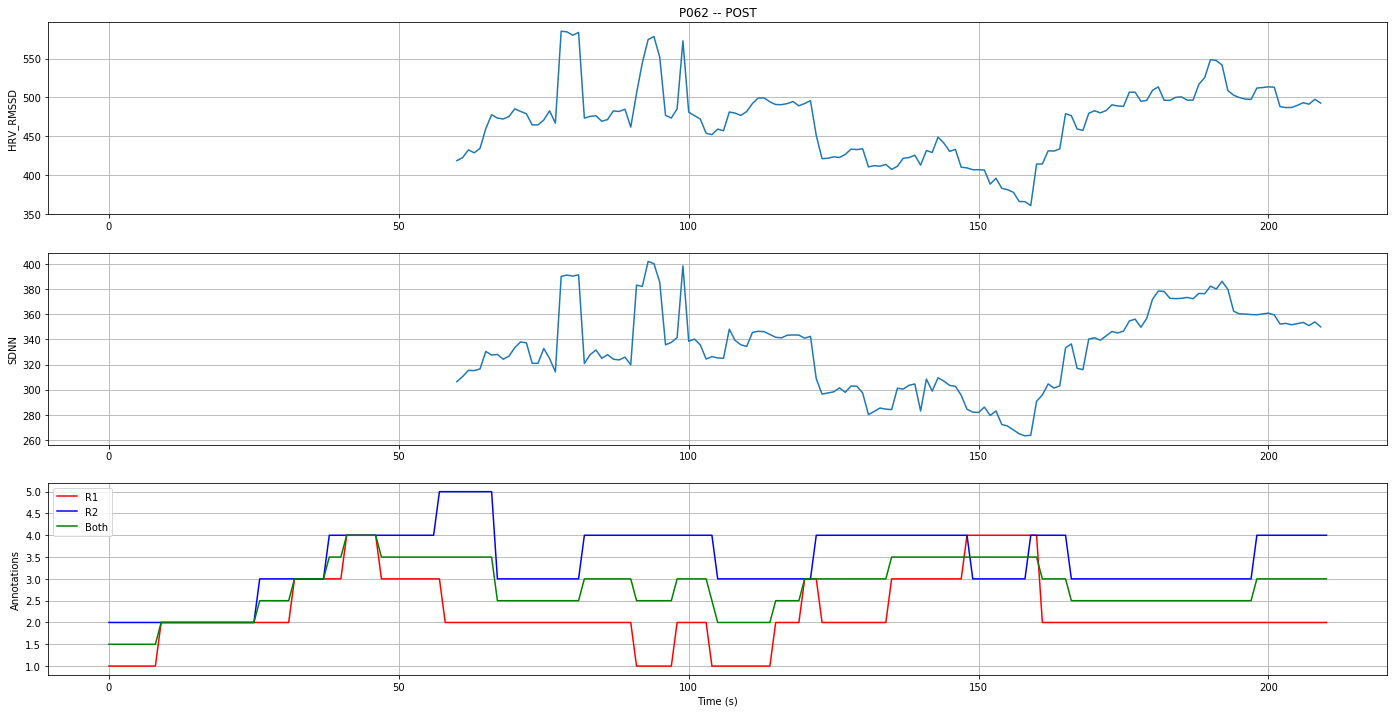

On P053


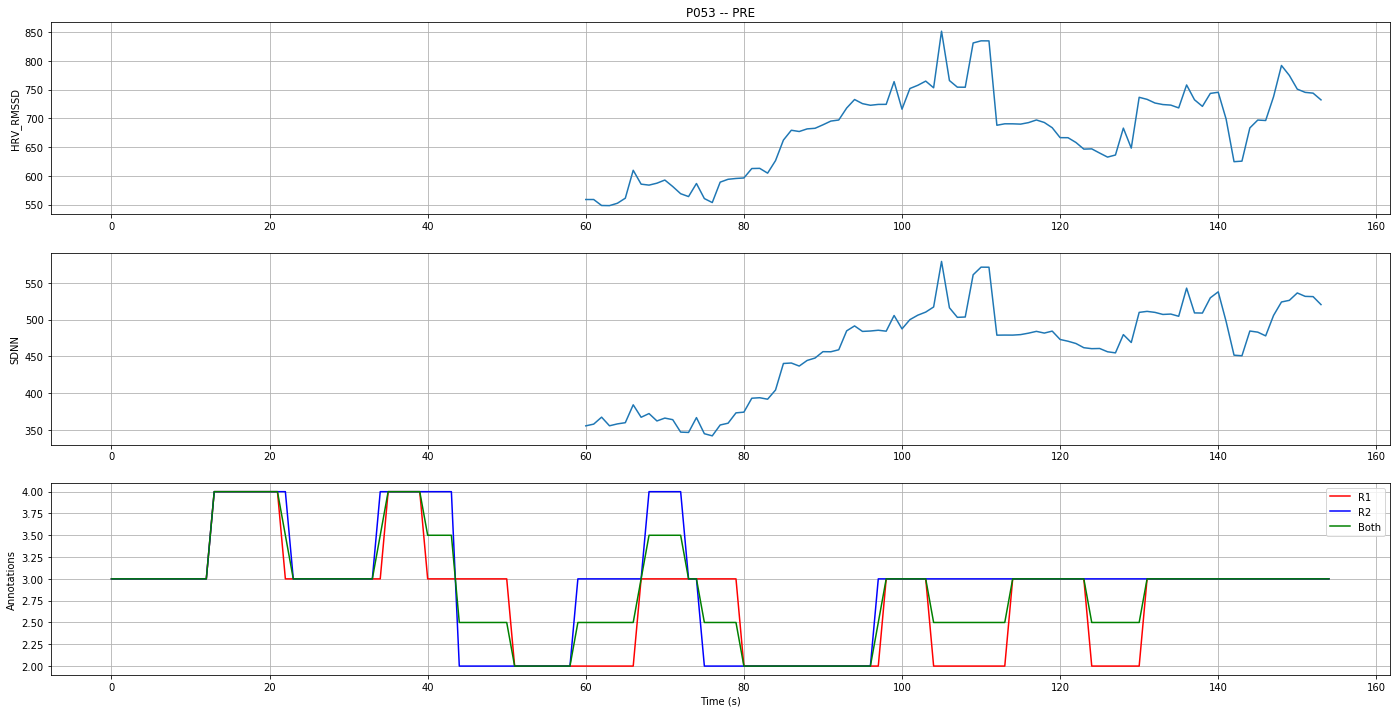

Participant 053 does not have session POST HR data
On P018


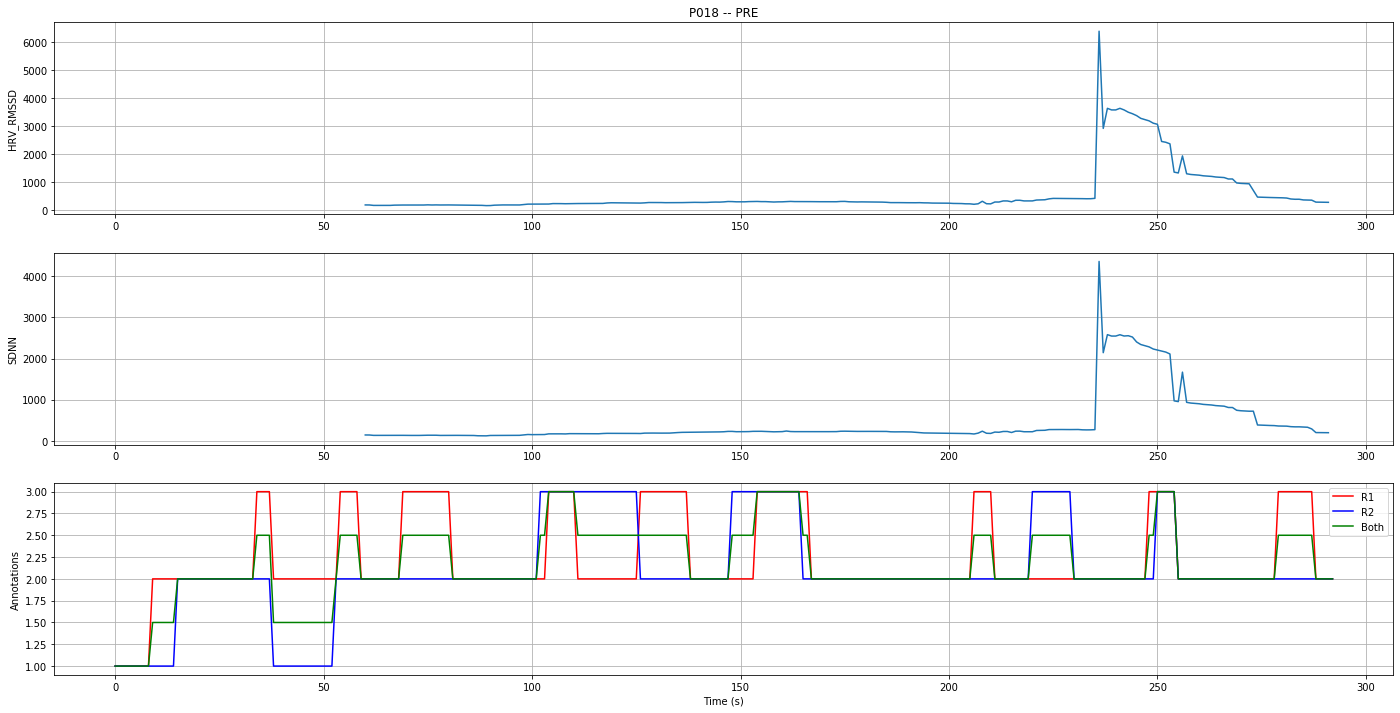

Participant 018 does not have session POST annotations
On P012
Participant 012 does not have session PRE annotations
Participant 012 does not have session POST annotations
On P023


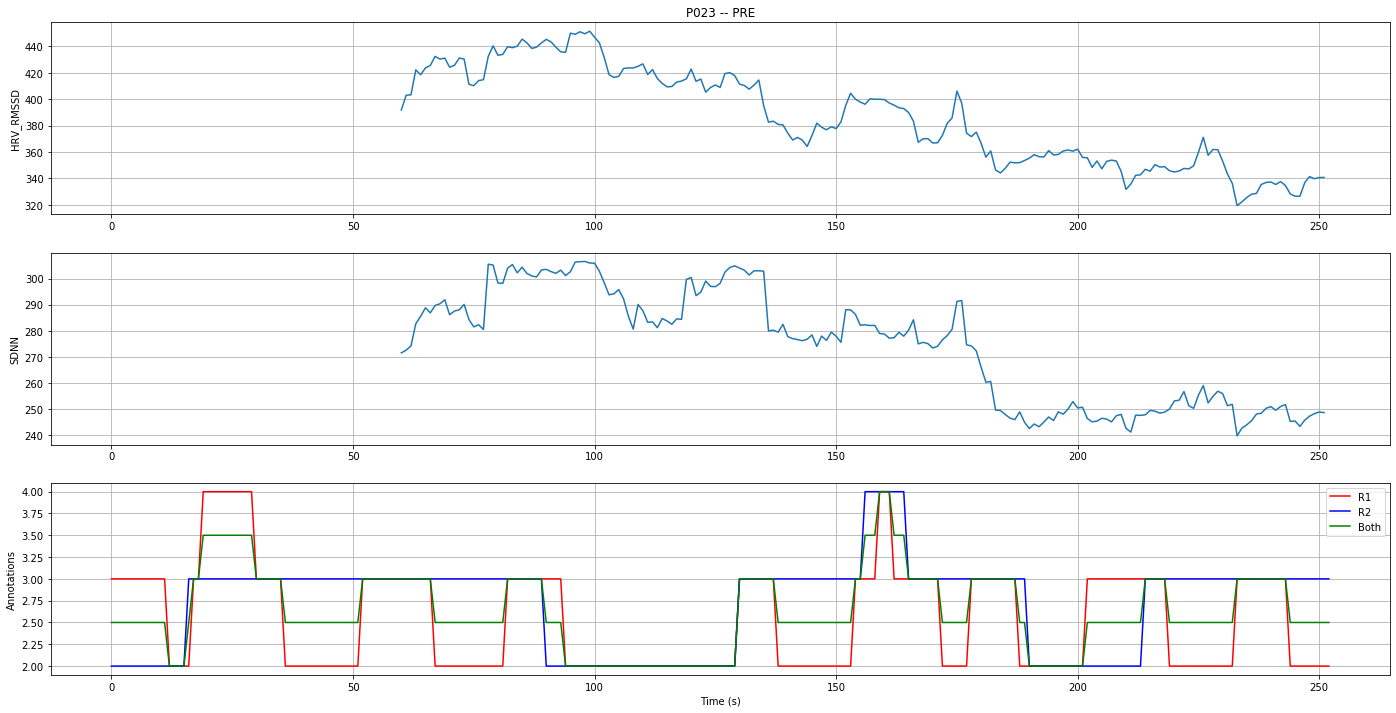

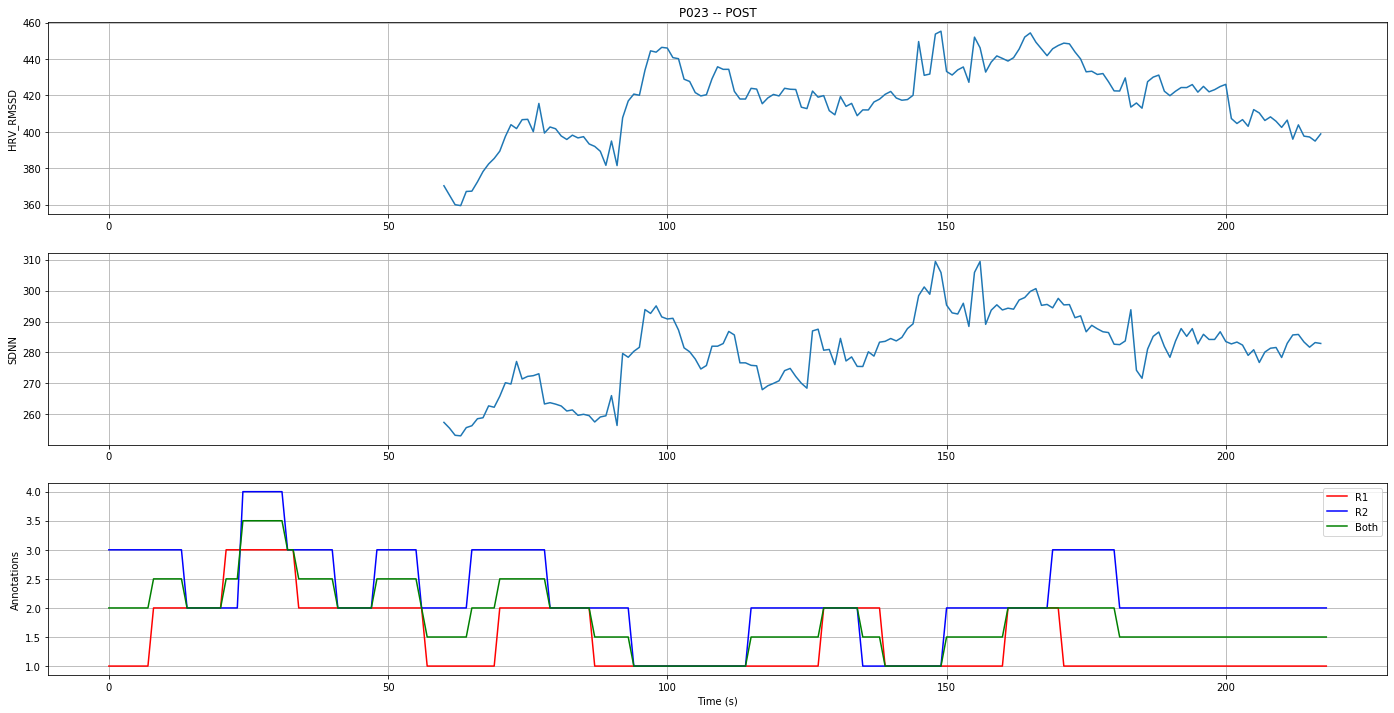

On P063


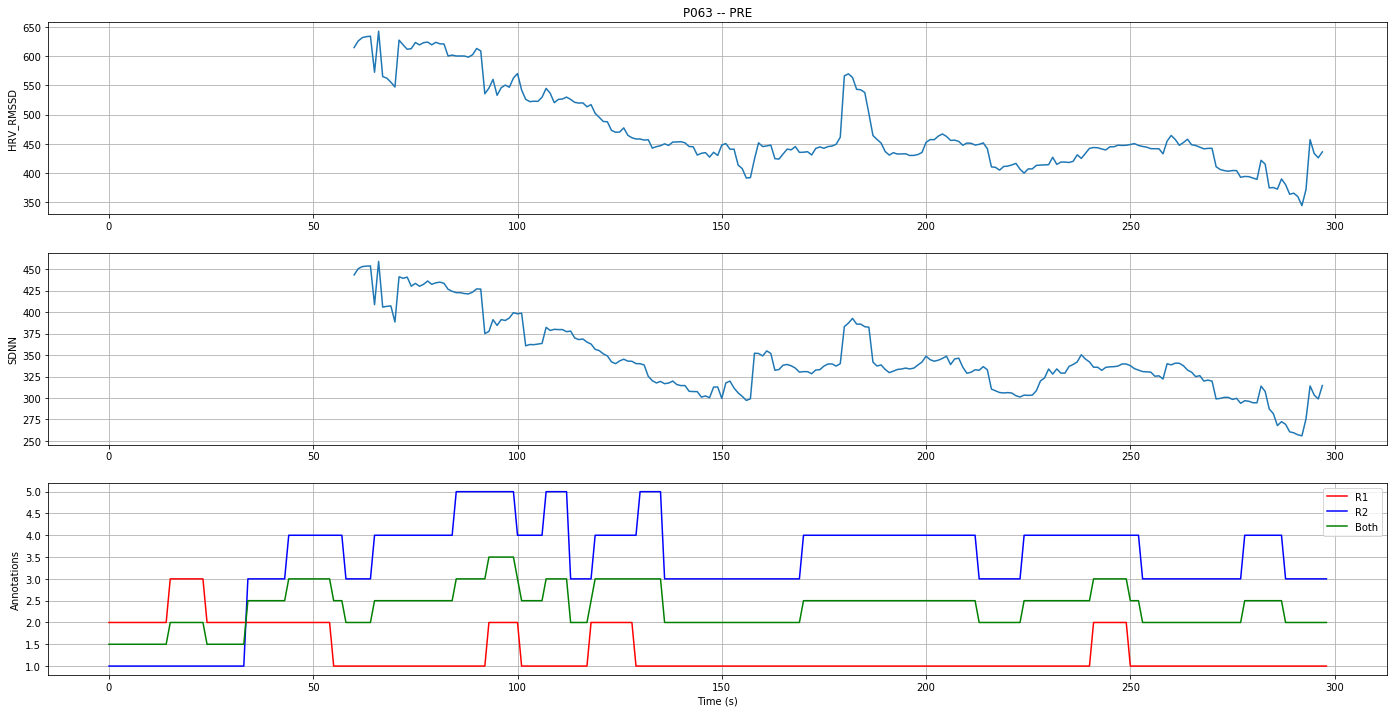

Participant 063 does not have session POST annotations
On P040


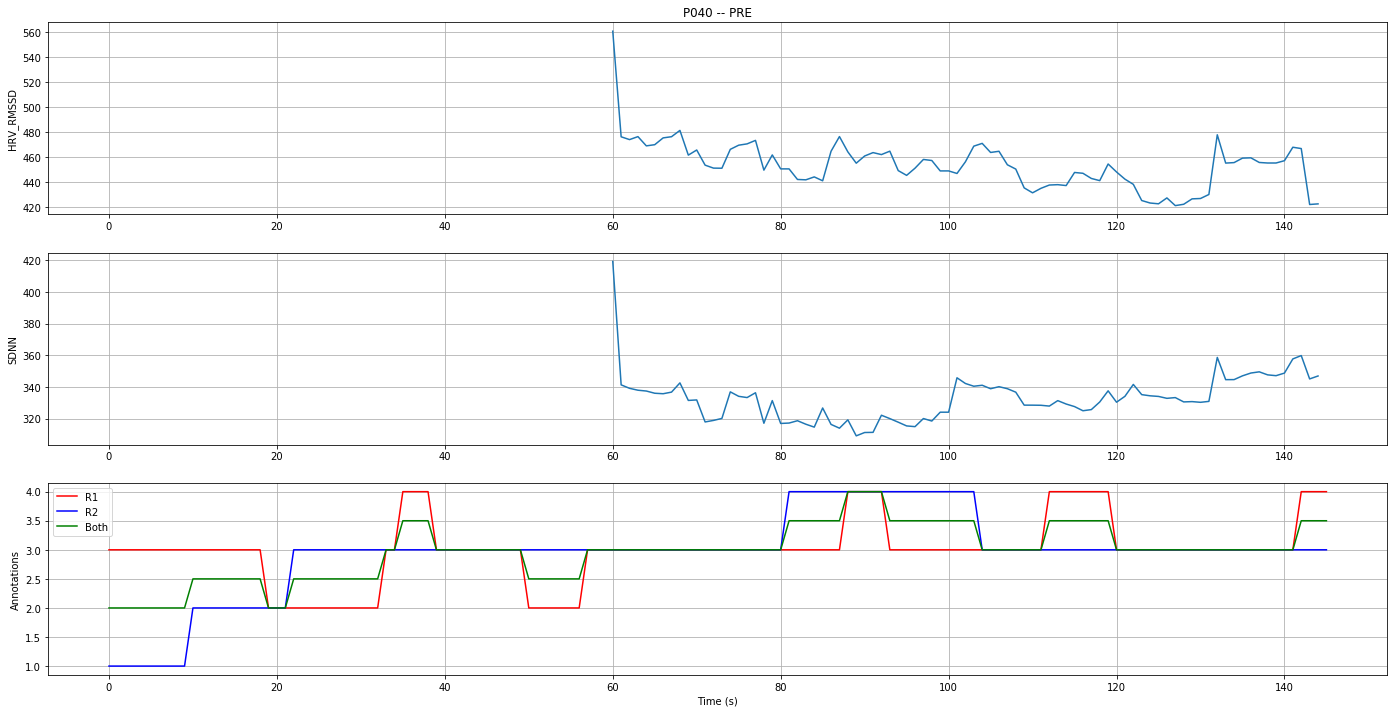

Participant 040 does not have session POST annotations
On P058


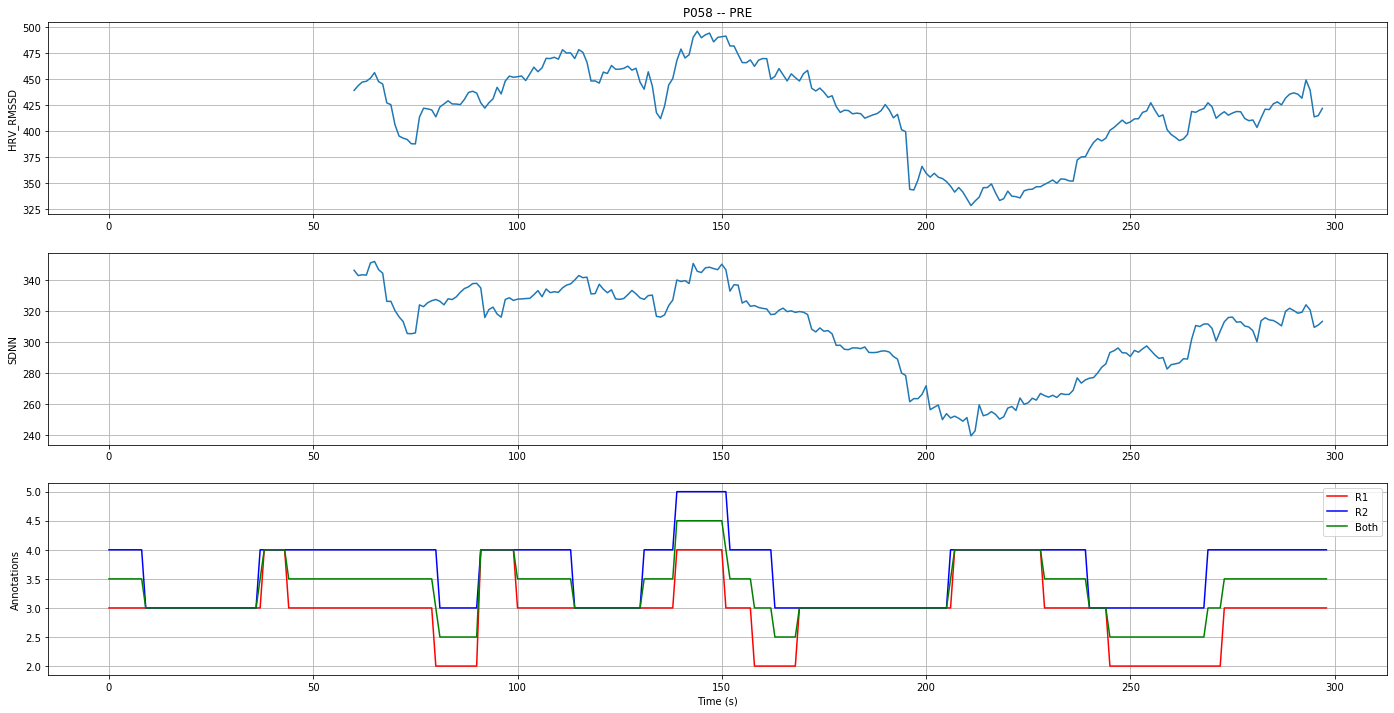

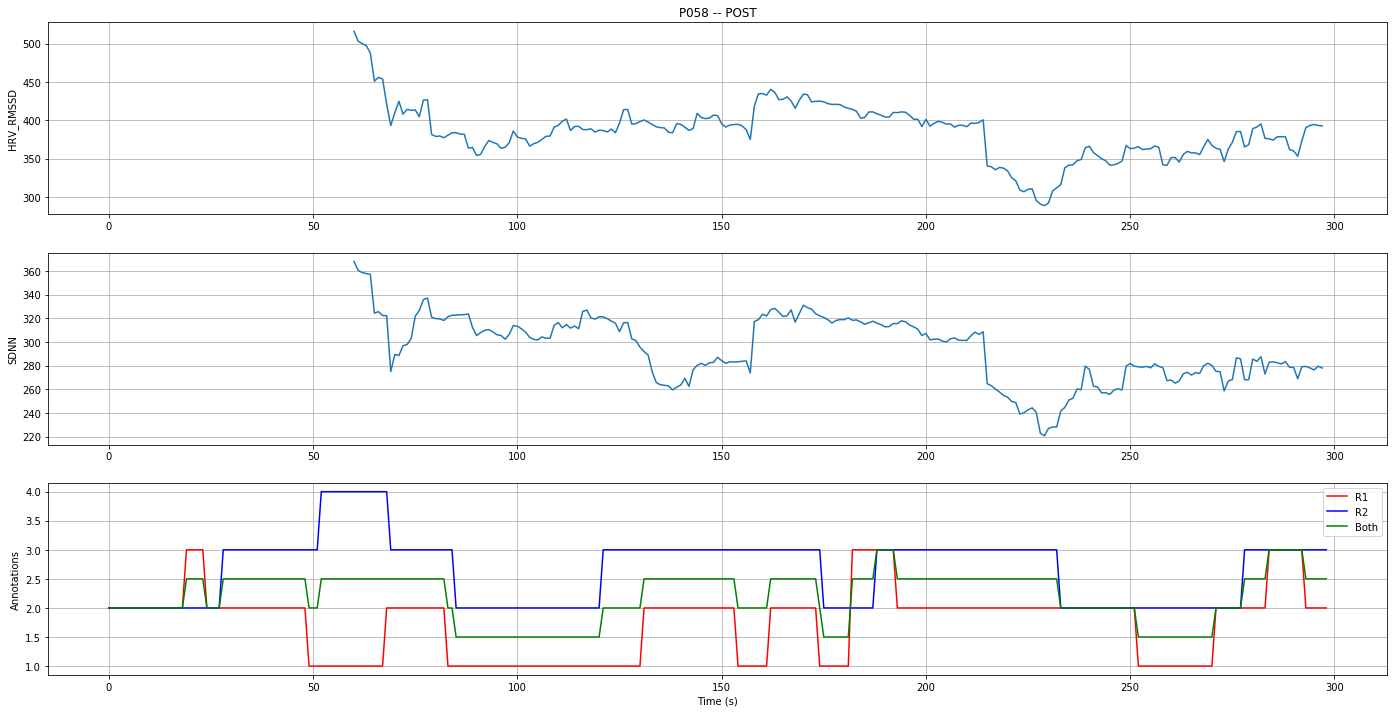

On P028
Participant 028 does not have baseline HR data
On P020


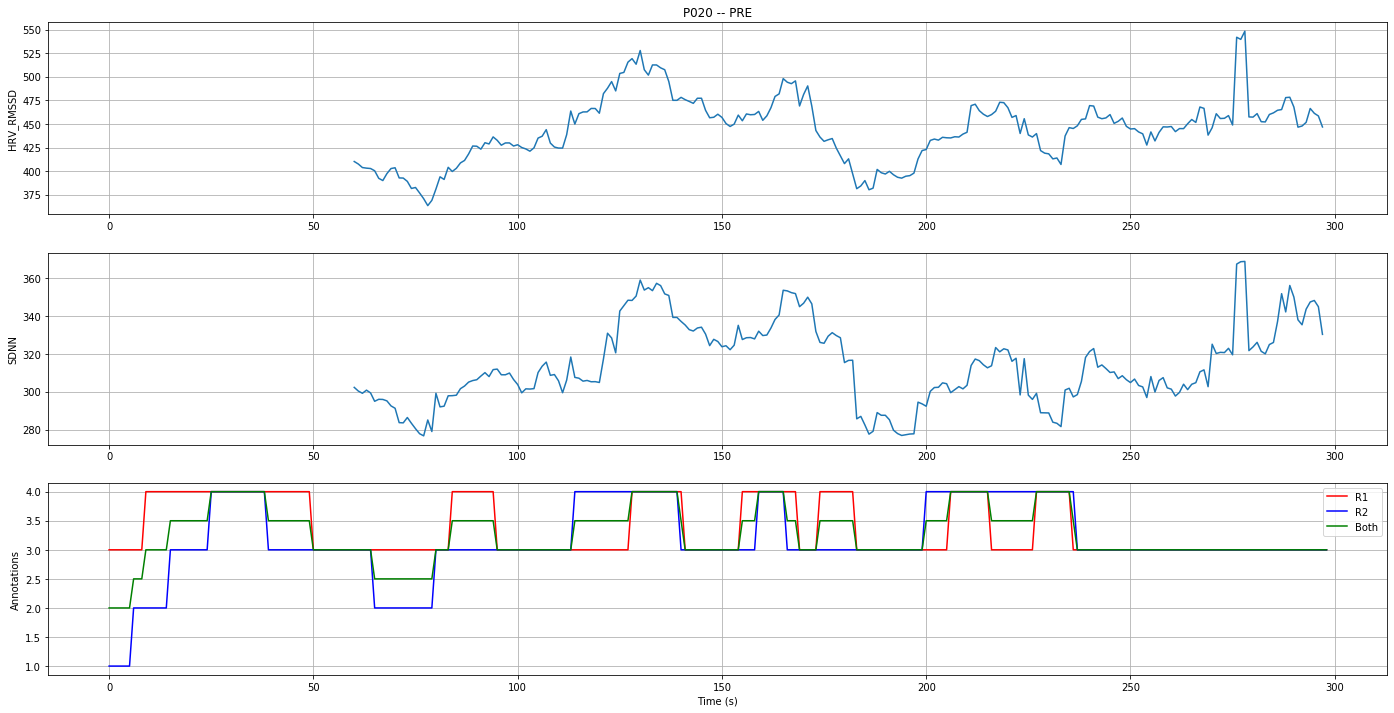

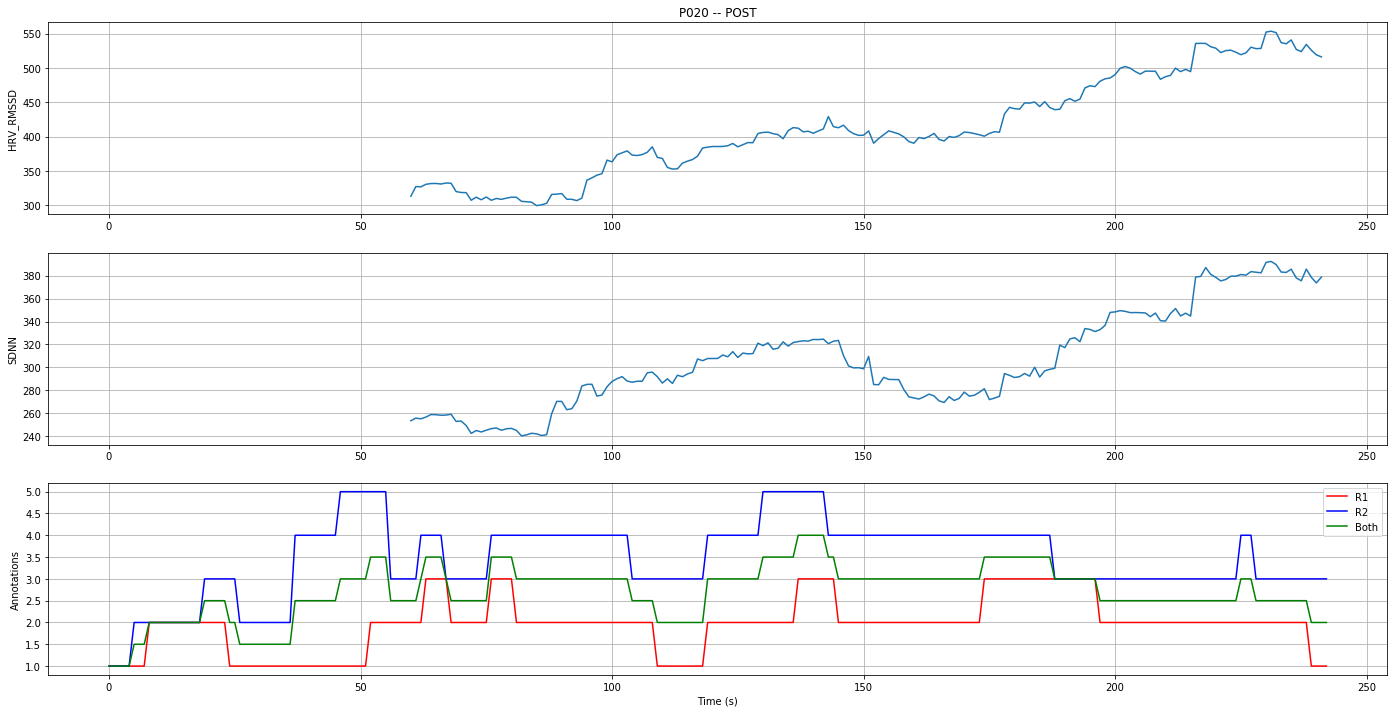

On P017


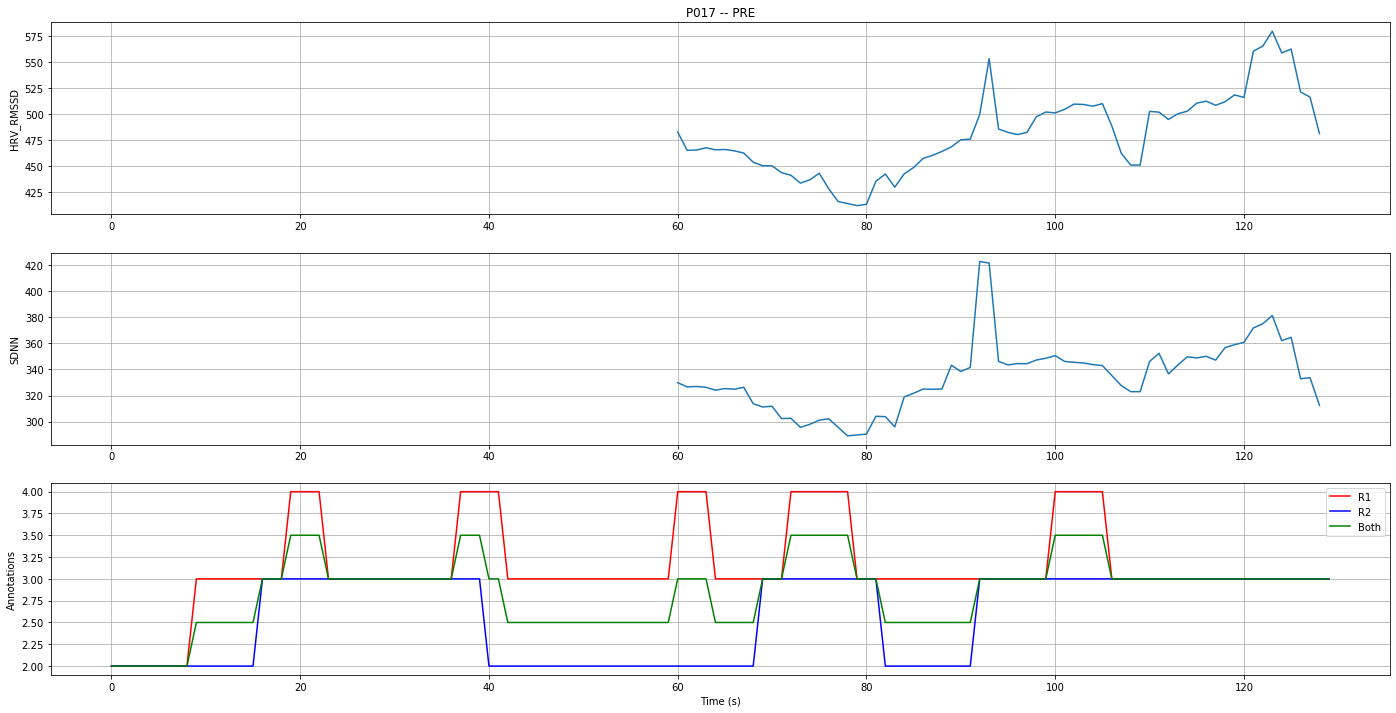

Participant 017 does not have session POST annotations
On P027


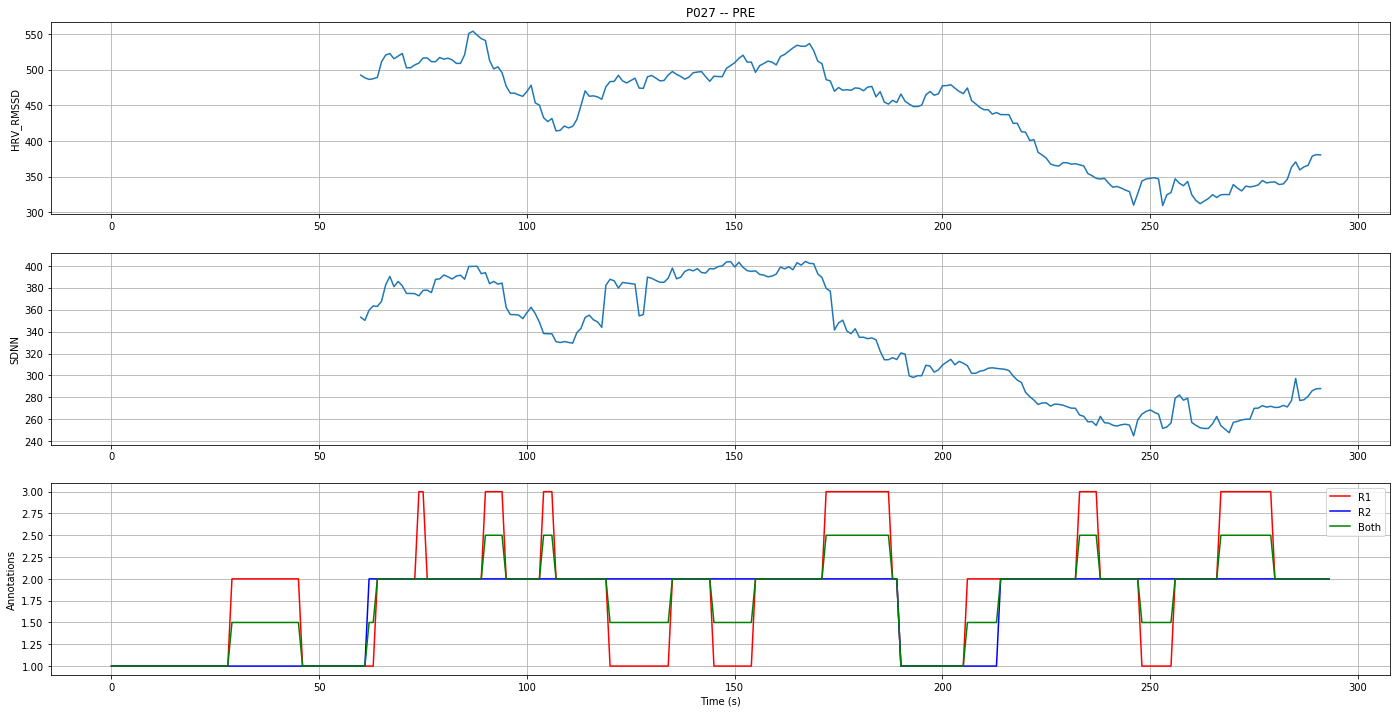

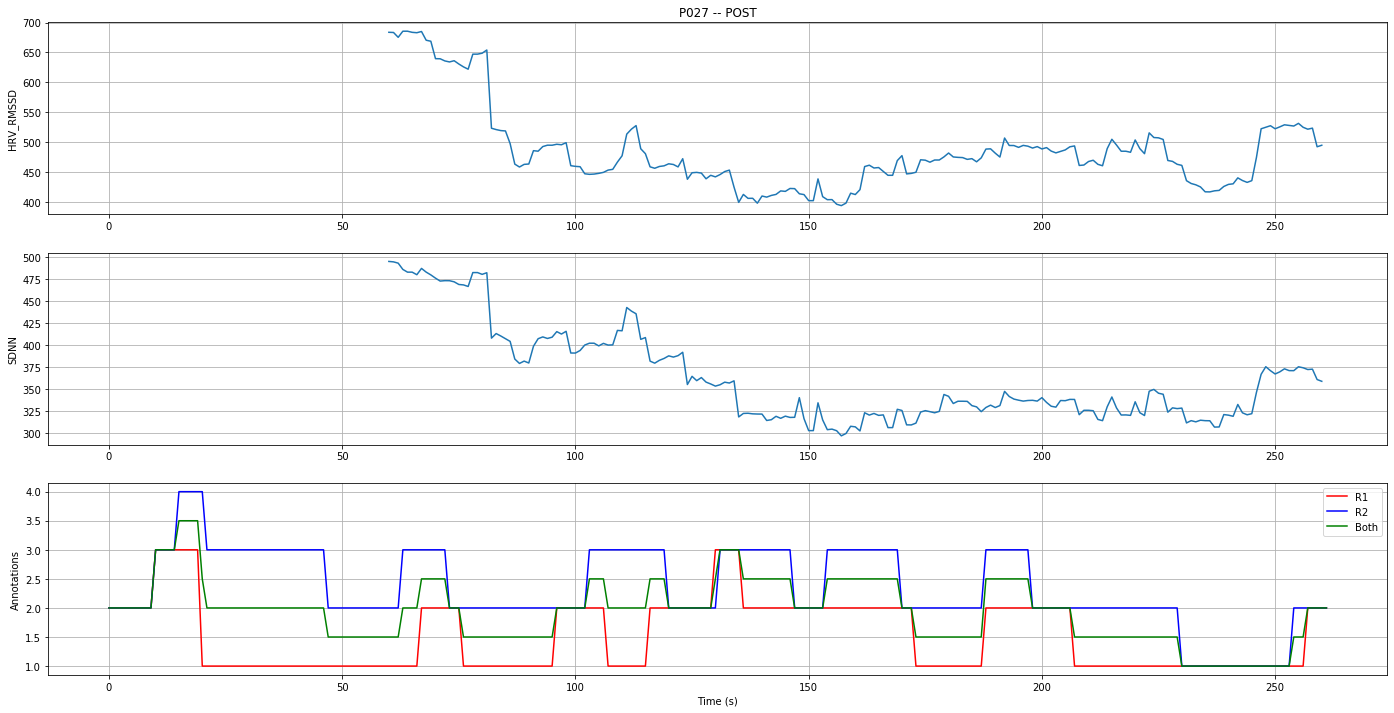

On P031


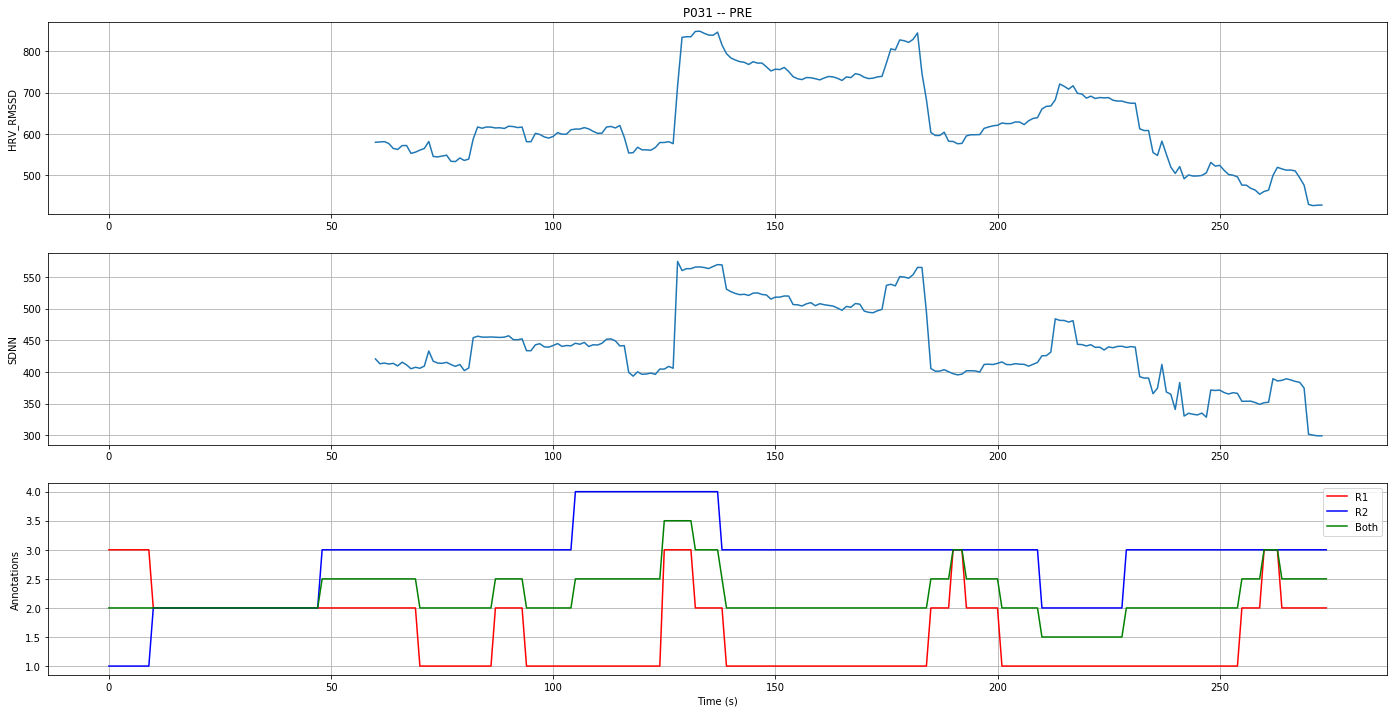

Participant 031 does not have session POST annotations
On P059
Participant 059 does not have baseline HR data
On P008


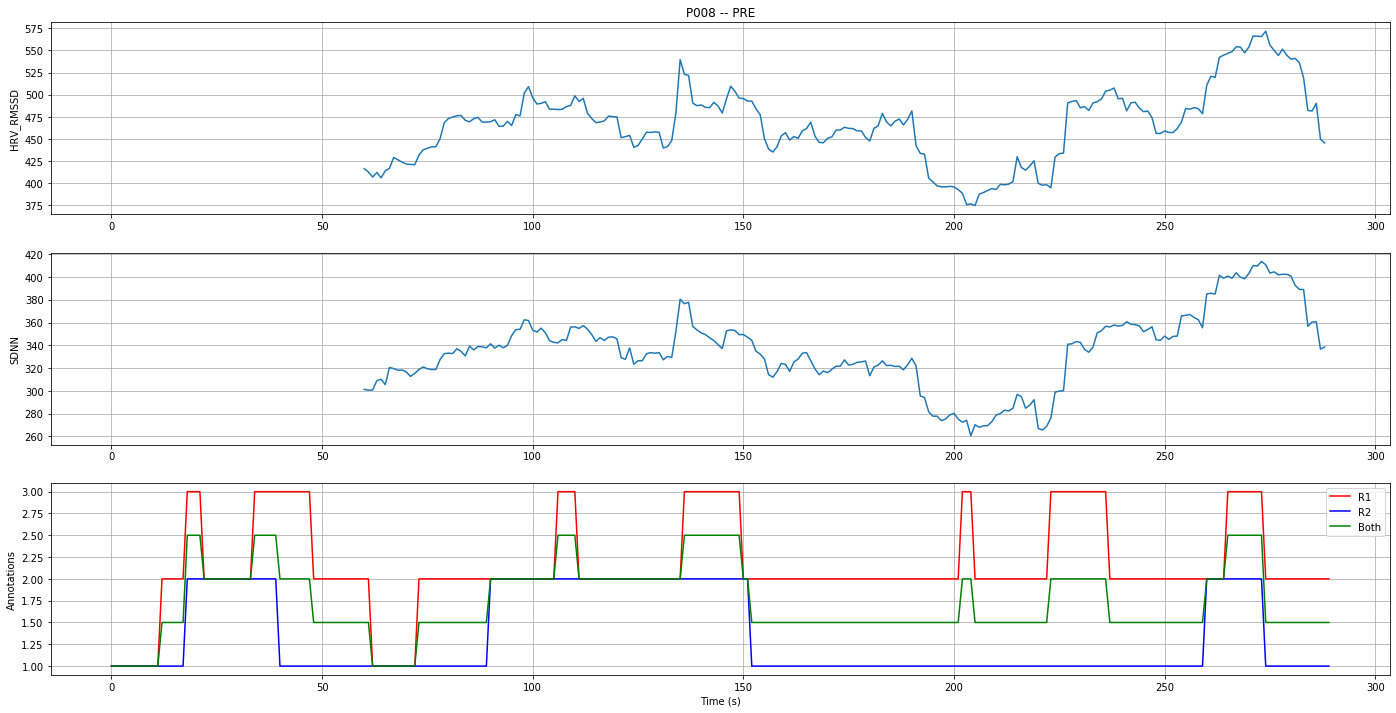

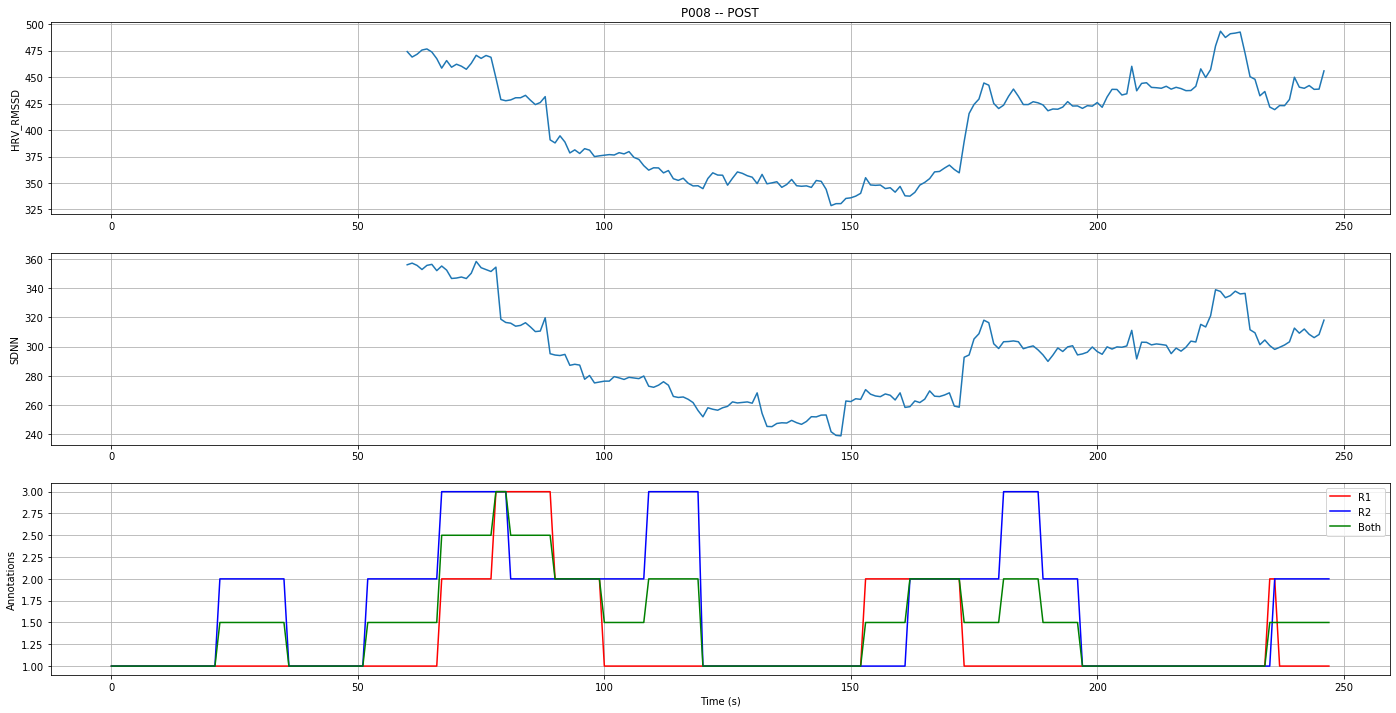

On P042


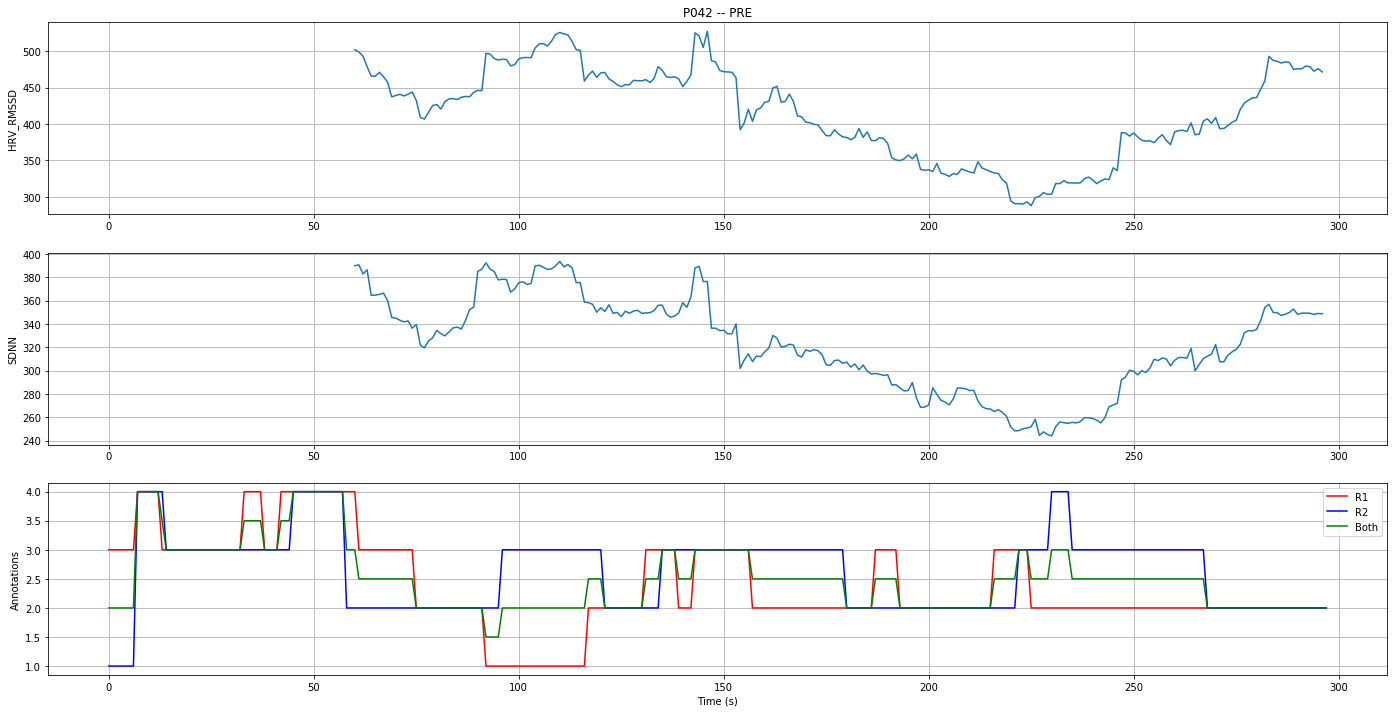

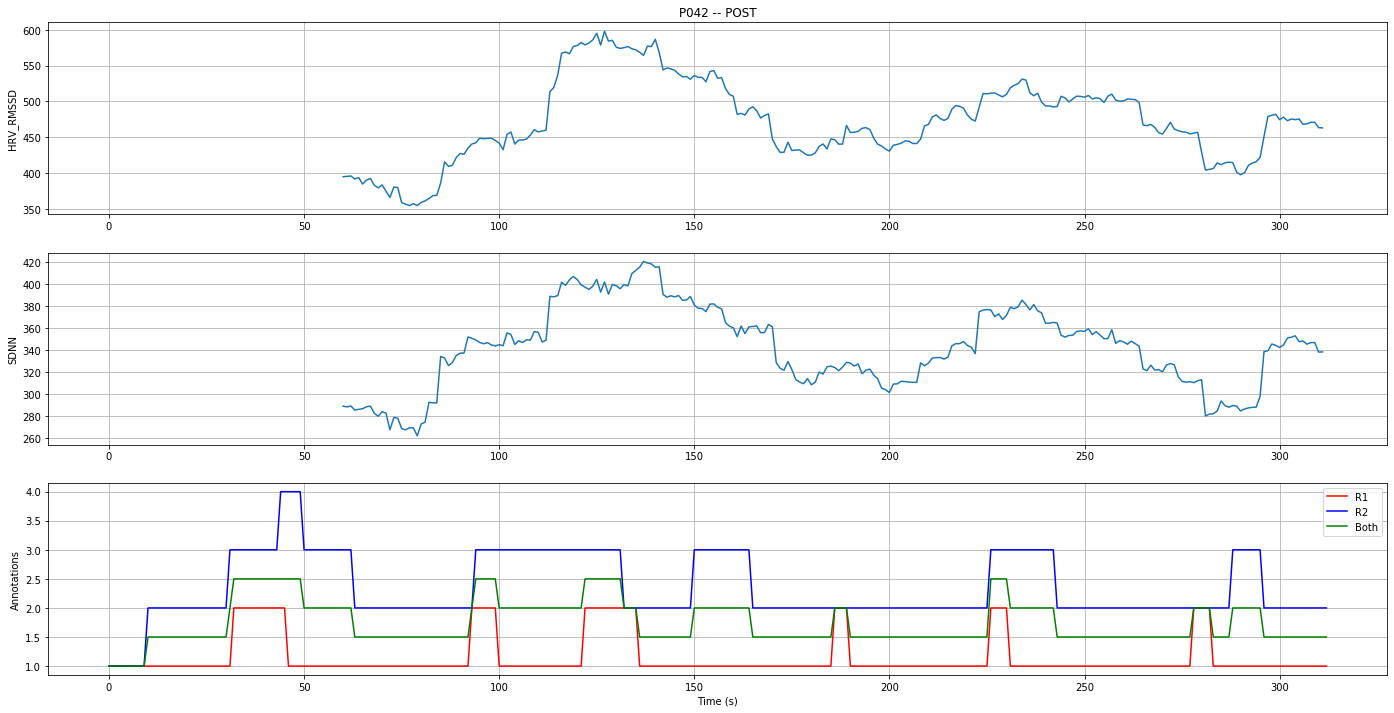

On P011


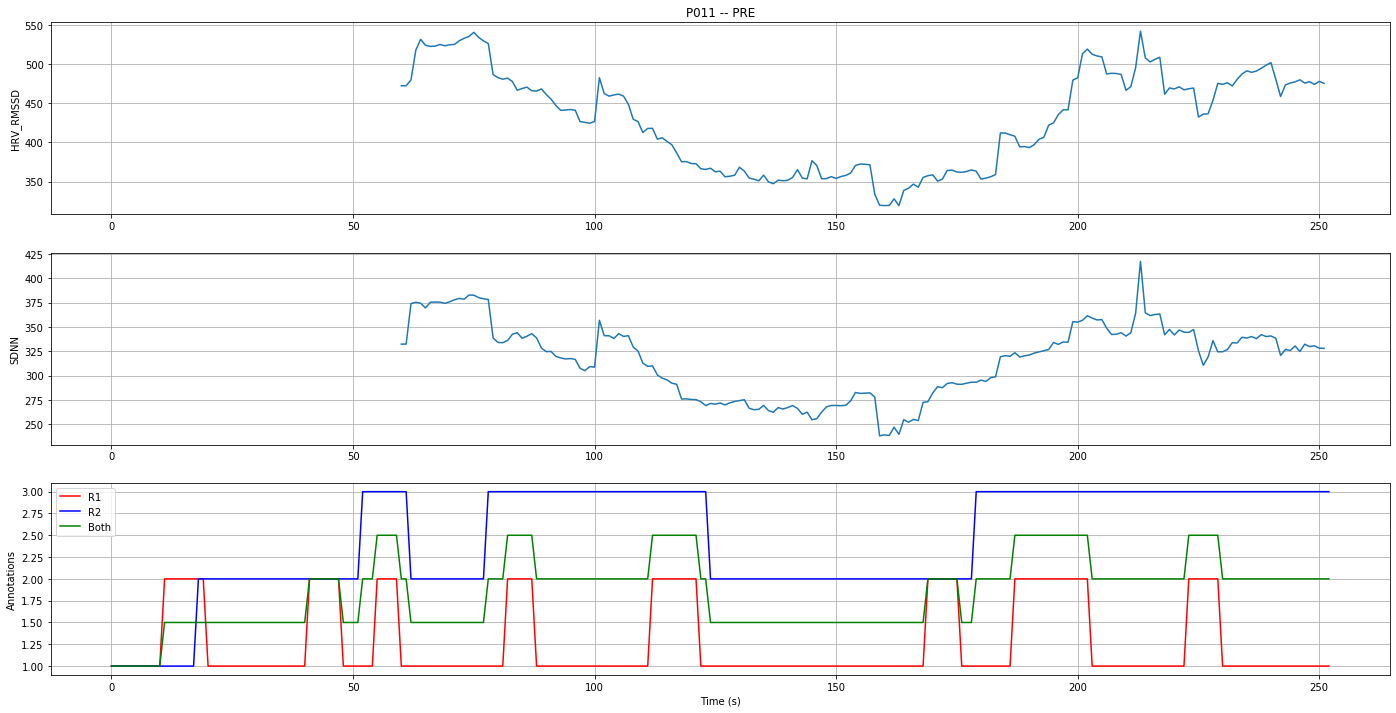

Participant 011 does not have session POST annotations
On P045


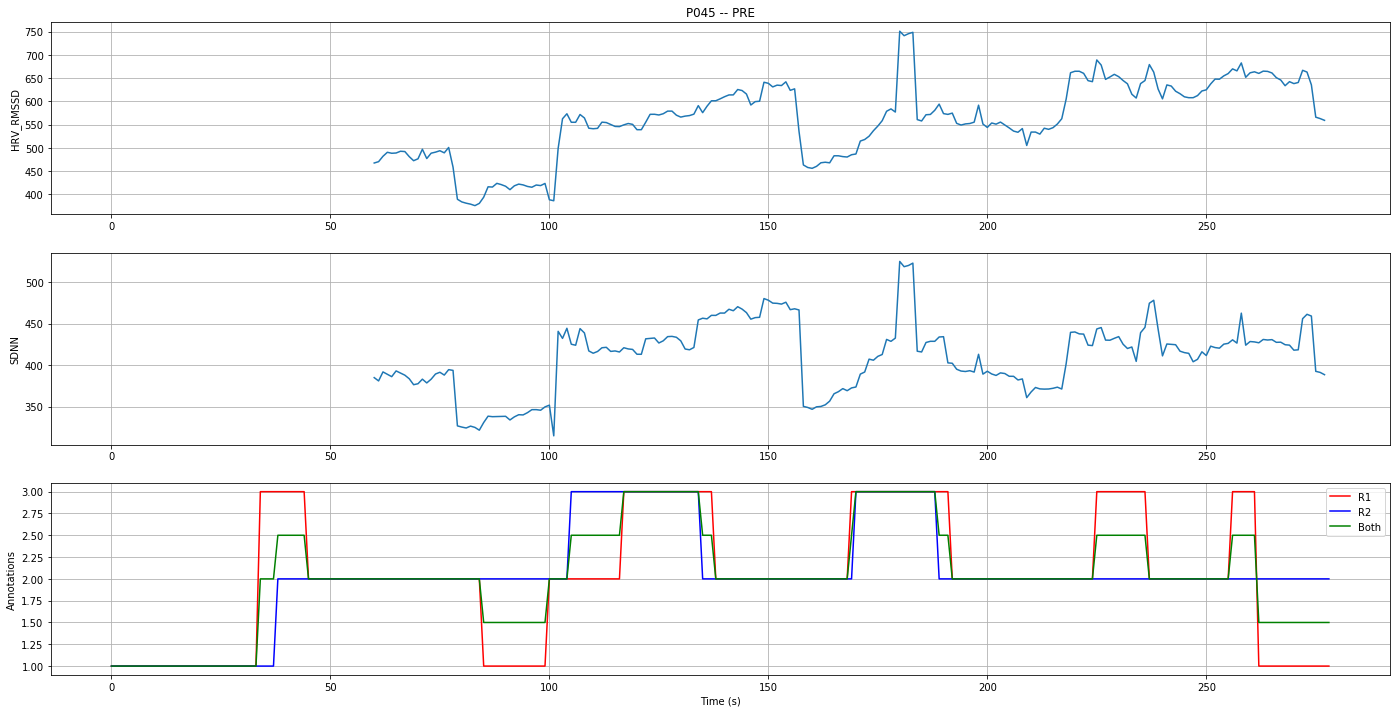

Participant 045 does not have session POST annotations
On P013


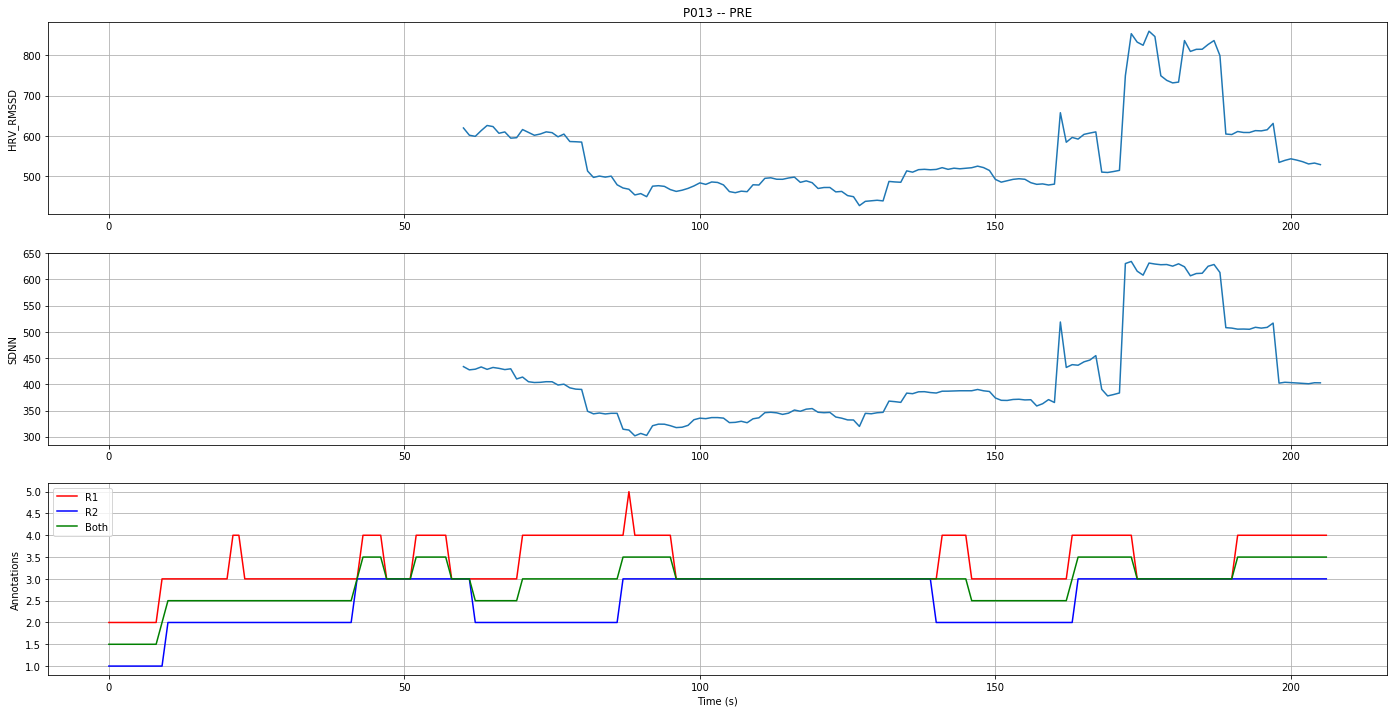

Participant 013 does not have session POST annotations
On P034
Participant 034 does not have baseline HR data
On P046


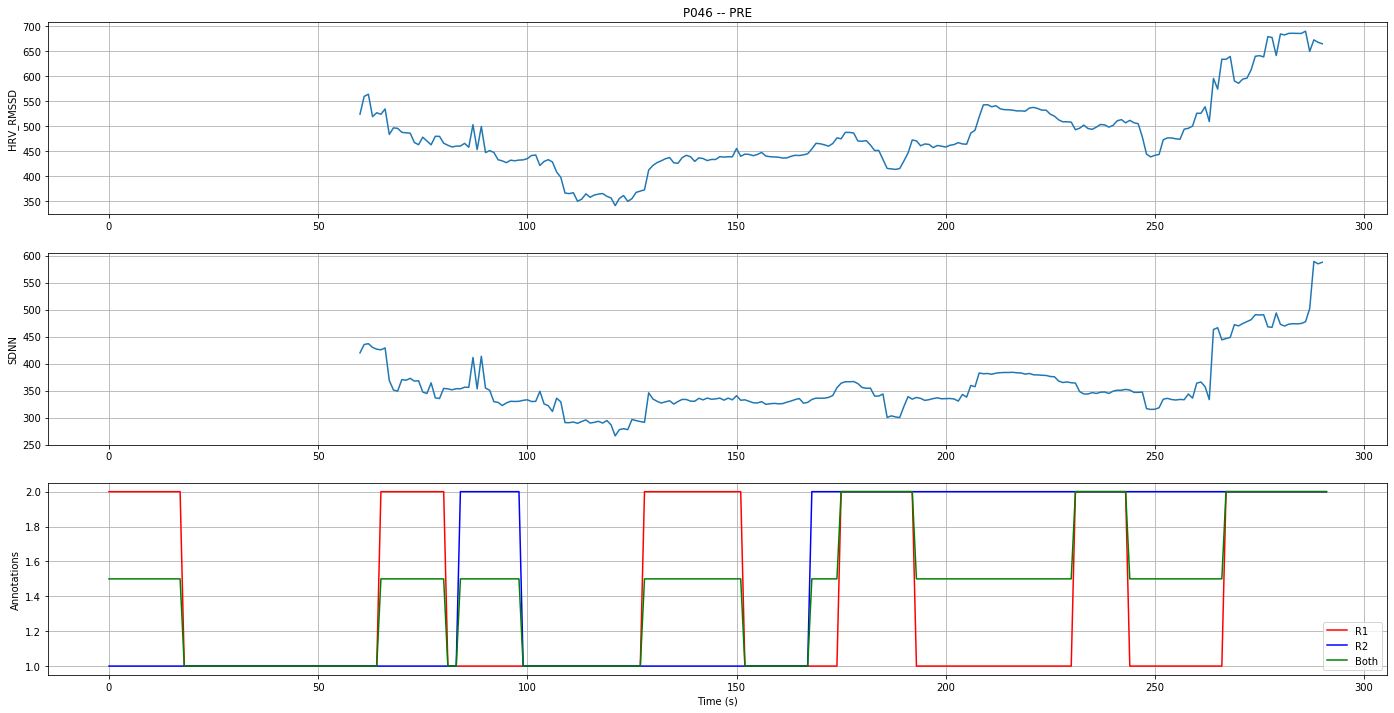

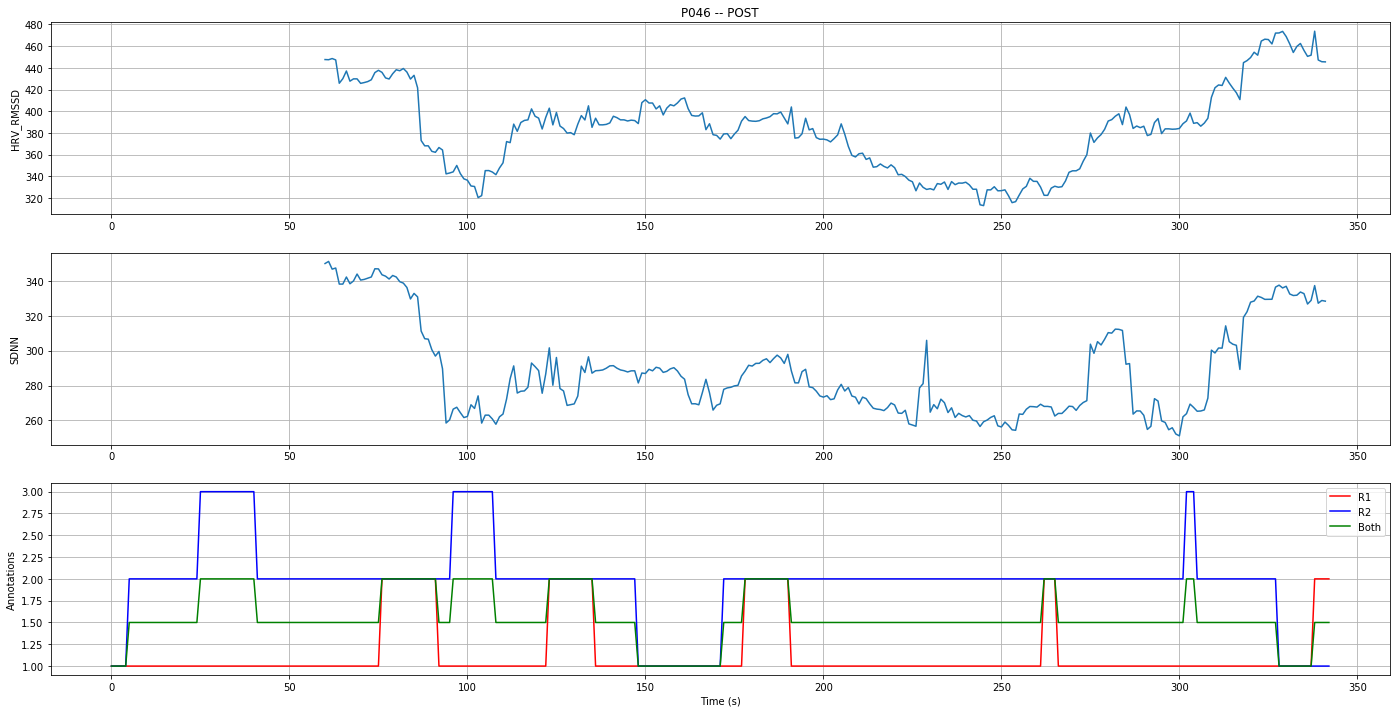

On P032


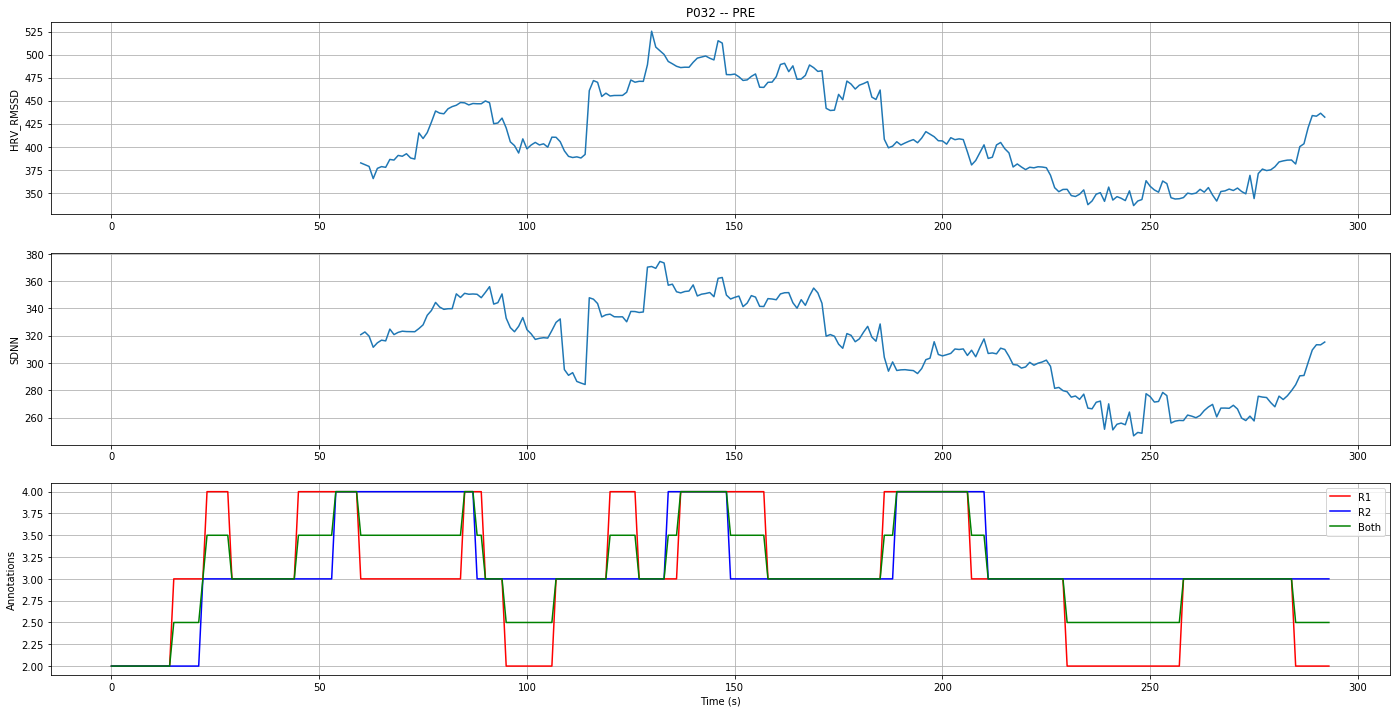

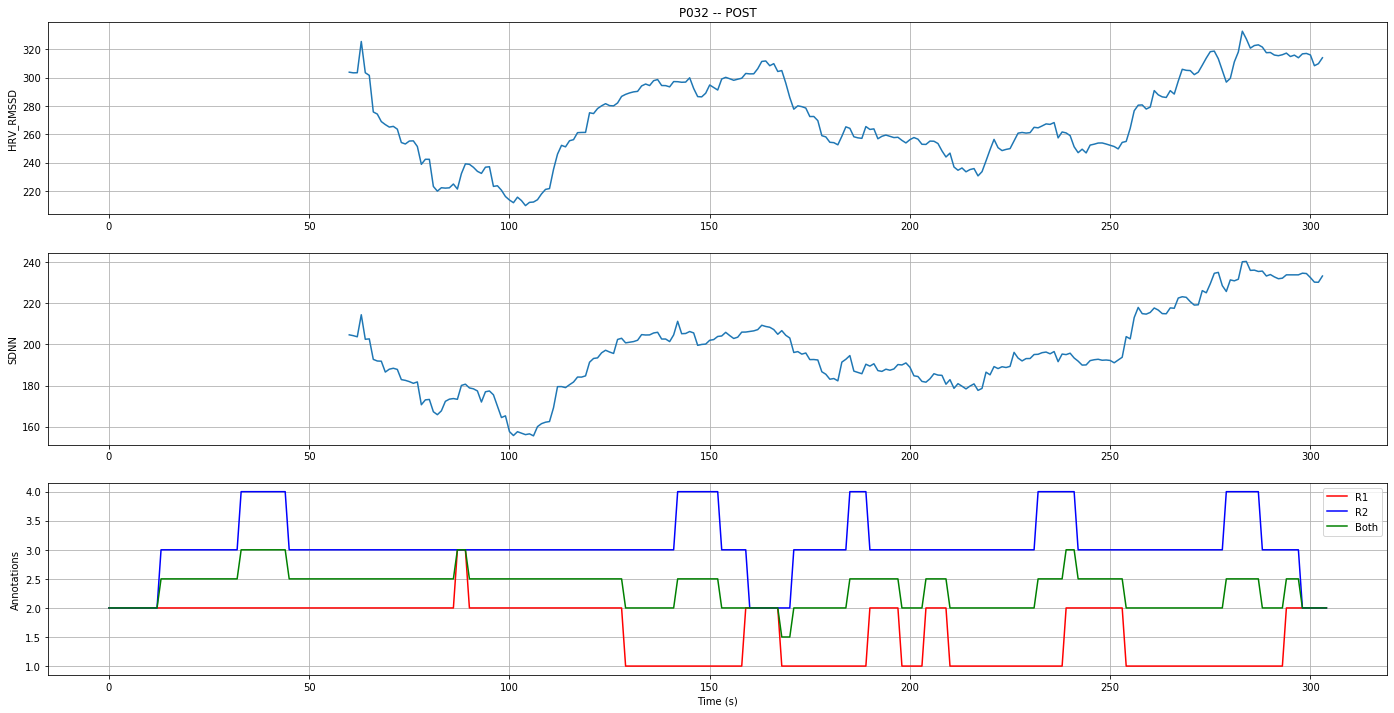

On P054
Participant 054 does not have baseline HR data
On P001


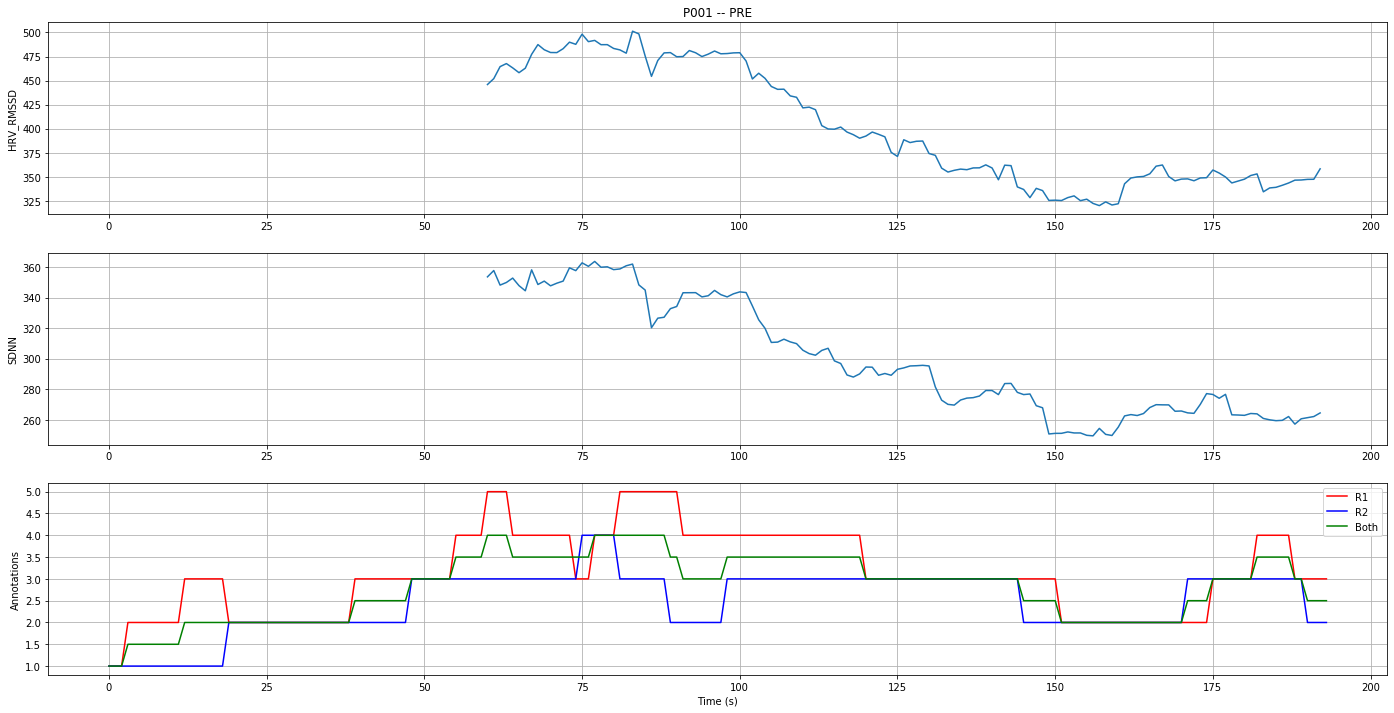

Participant 001 does not have session POST annotations
On P067


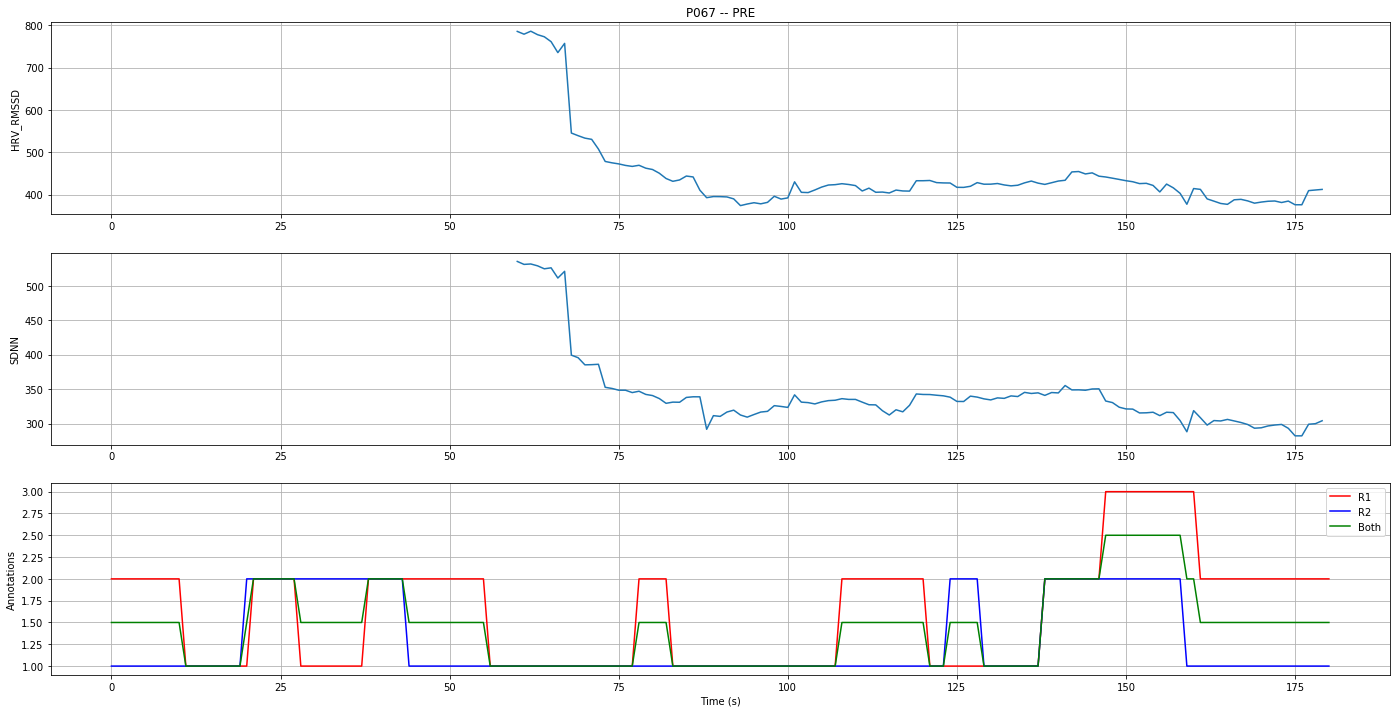

Participant 067 does not have session POST annotations
On P026


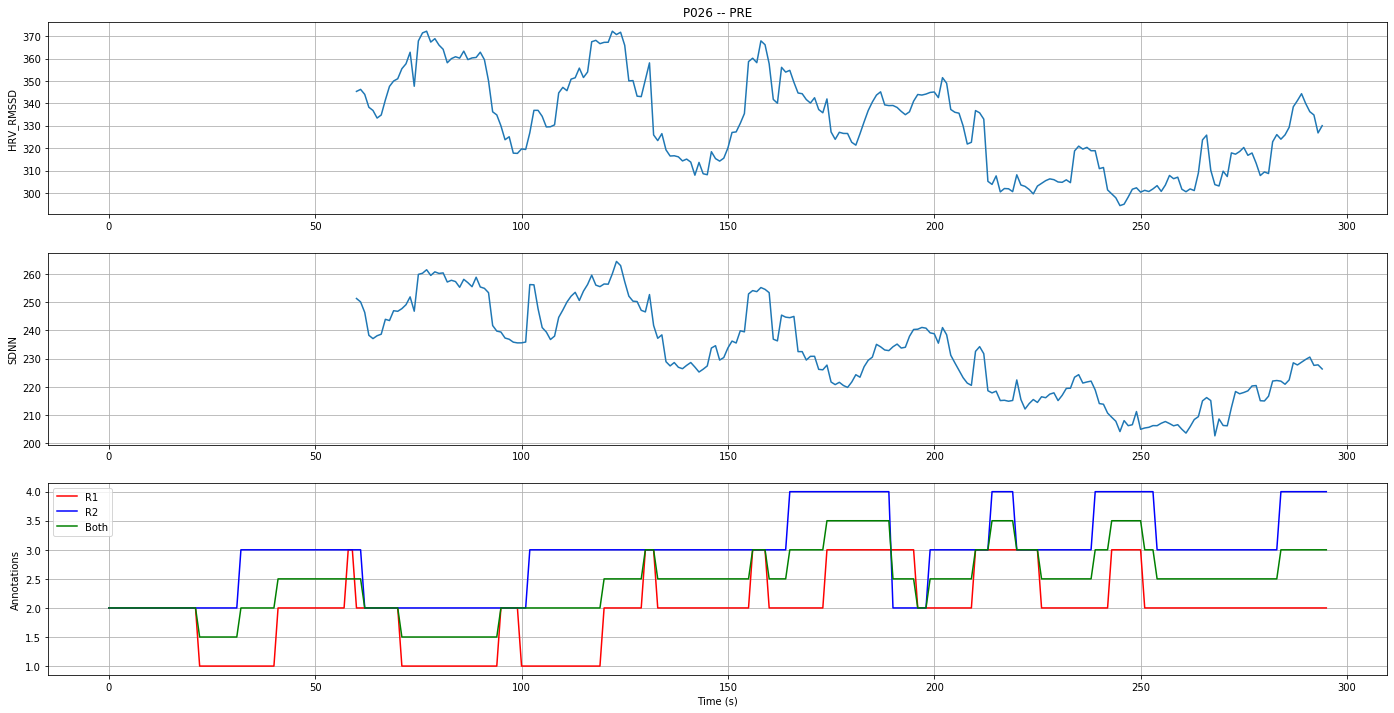

Participant 026 does not have session POST annotations
On P005


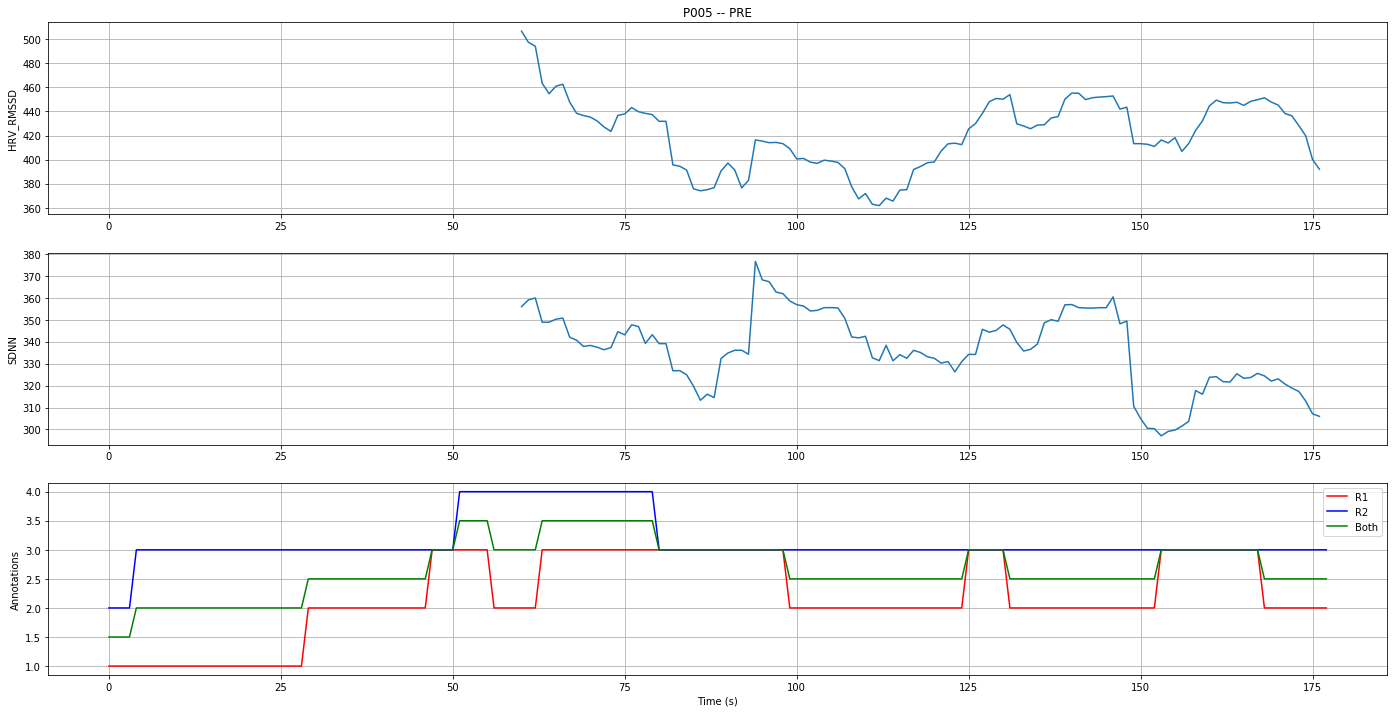

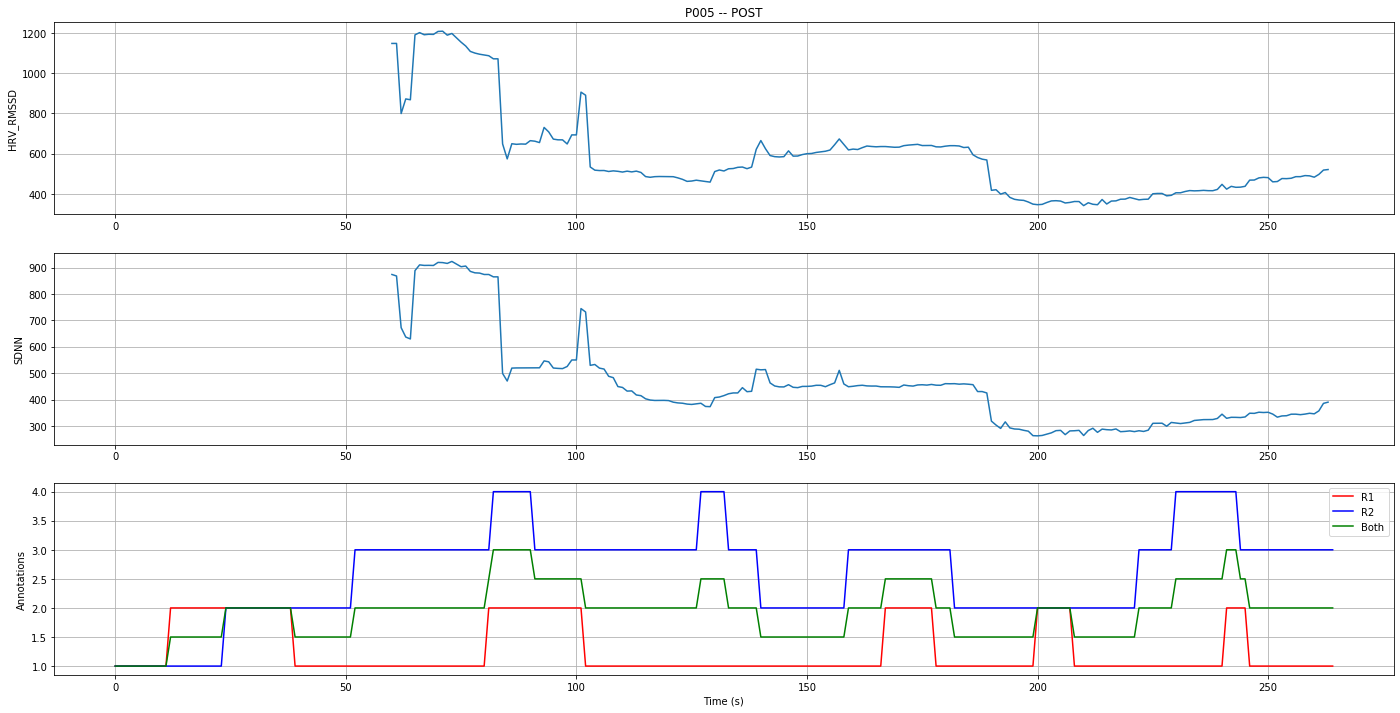

On P052


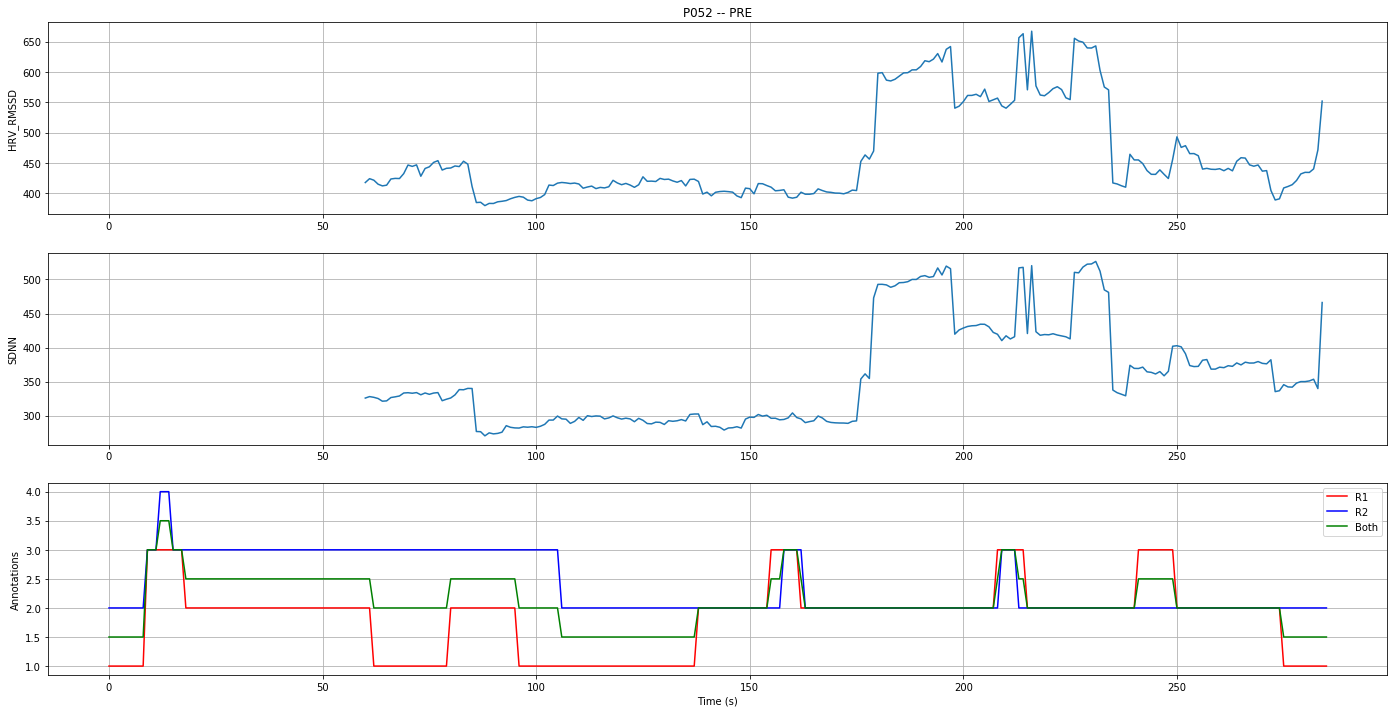

Participant 052 does not have session POST annotations
On P007
Participant 007 does not have session PRE annotations
Participant 007 does not have session POST annotations
On P021


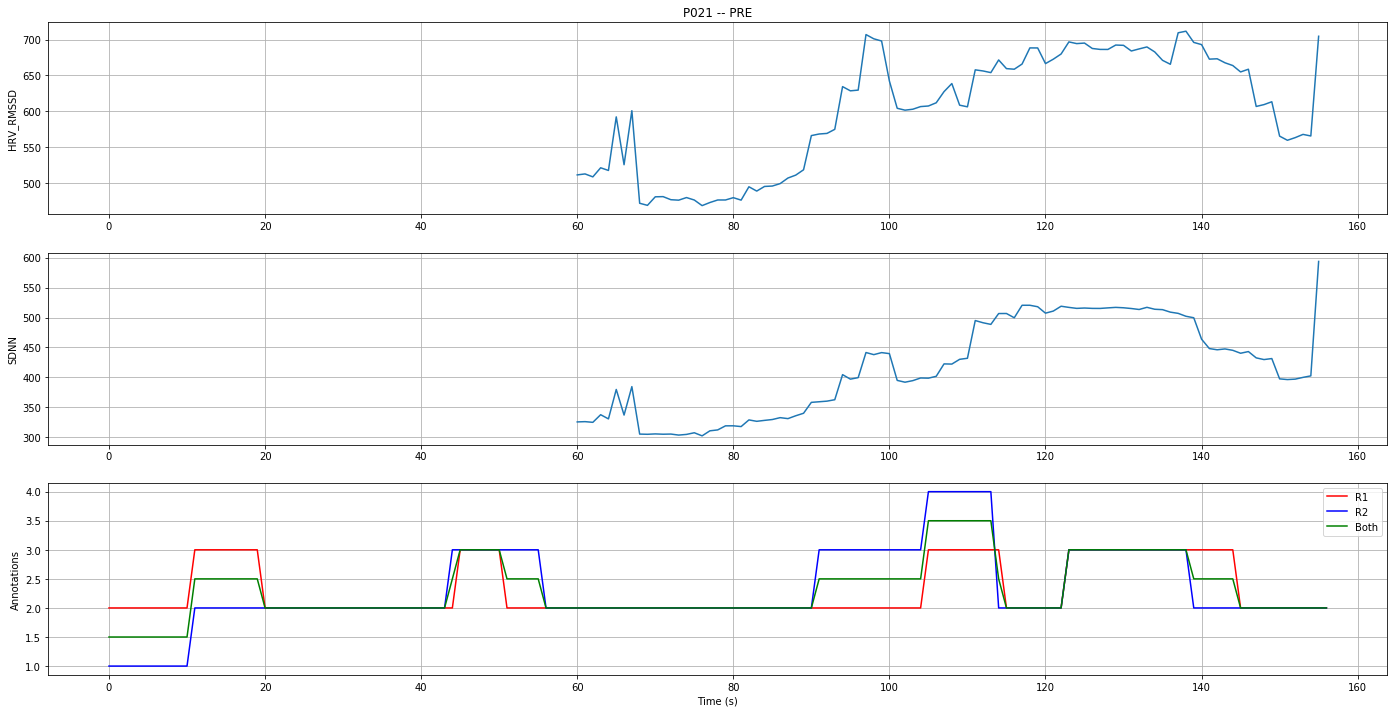

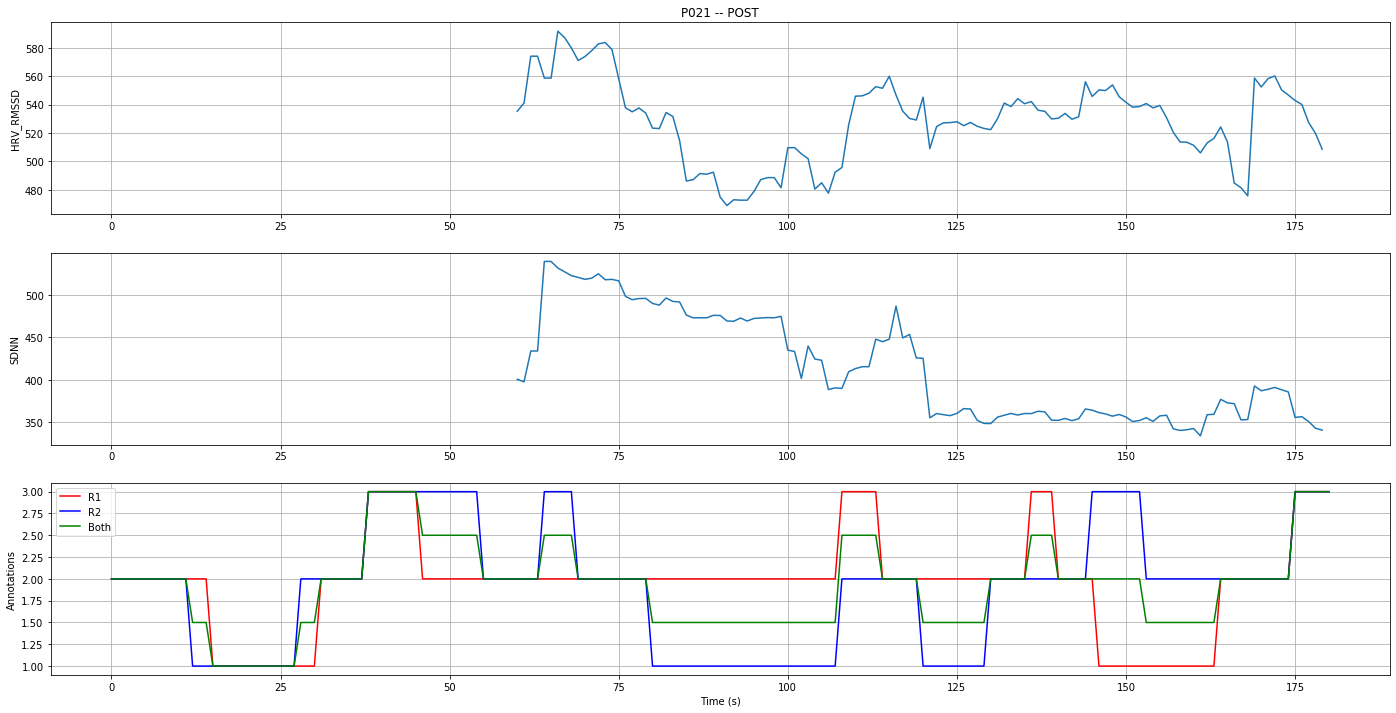

On P068


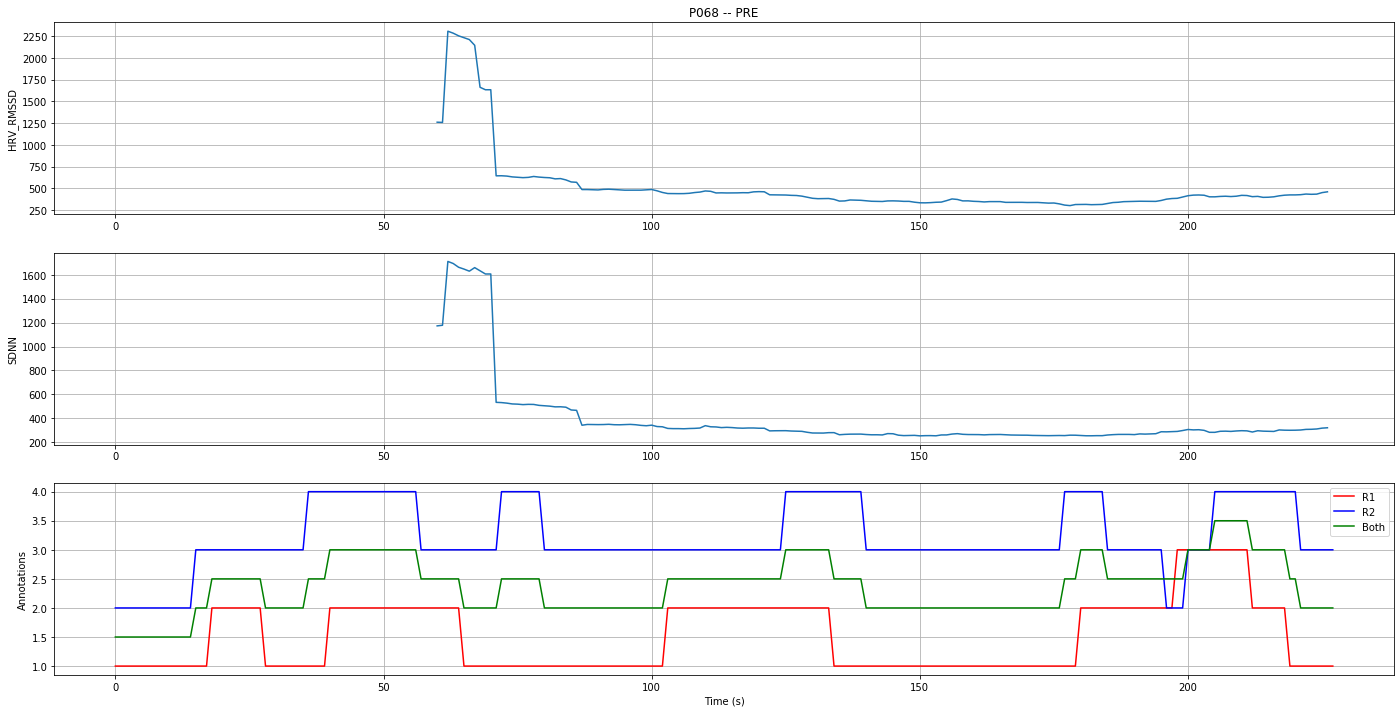

Participant 068 does not have session POST annotations
On P041


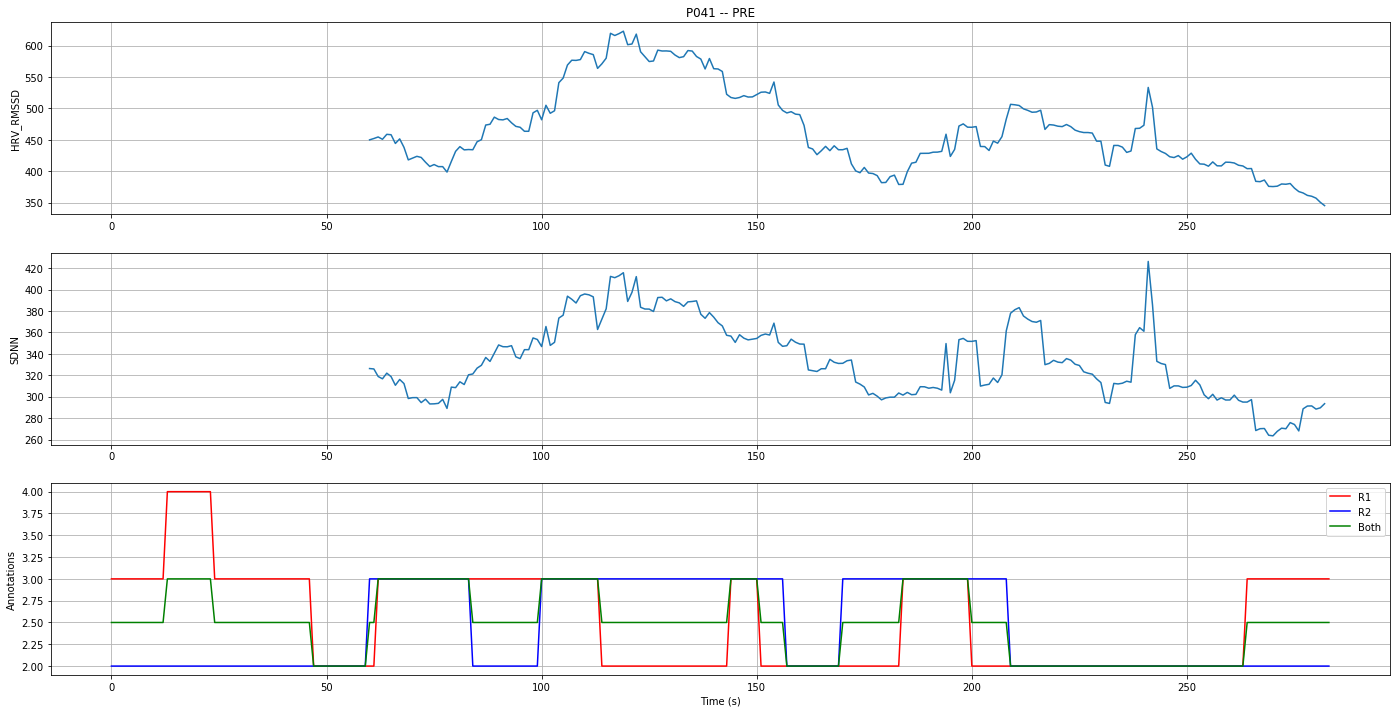

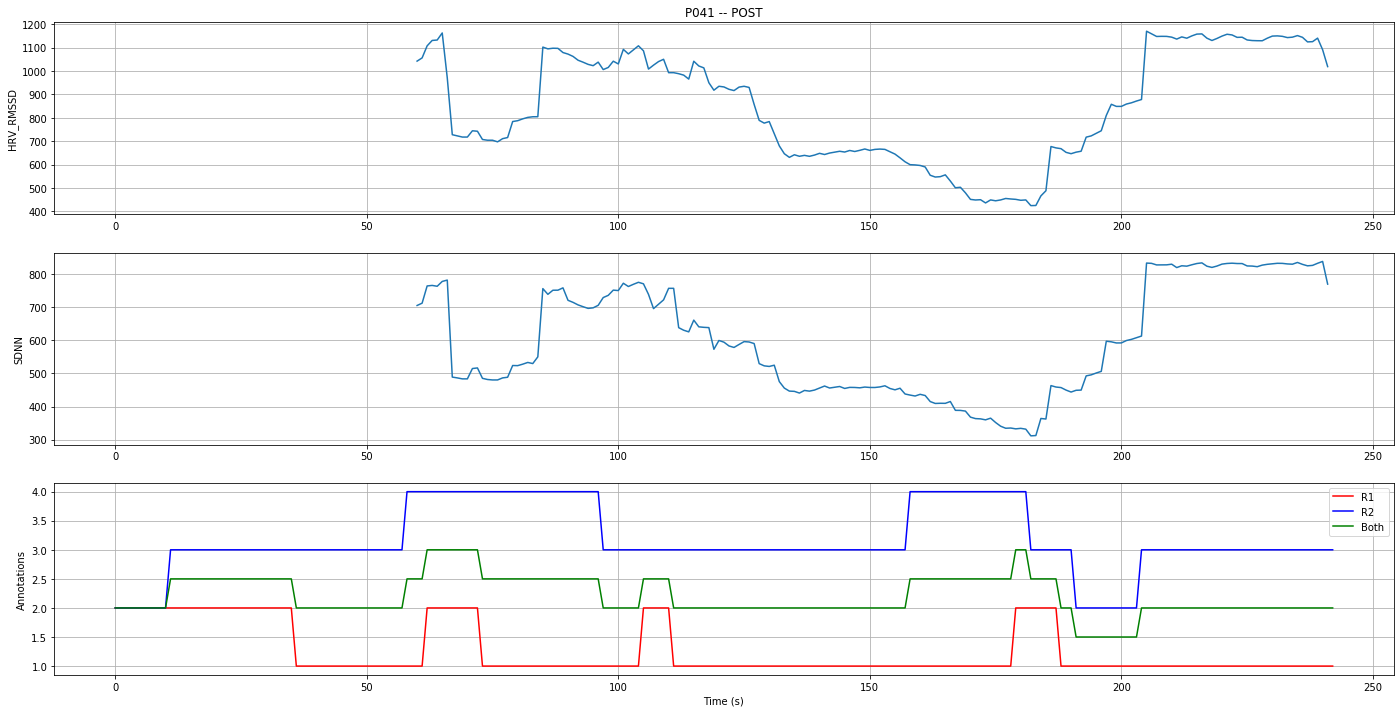

On P025
Participant 025 does not have baseline HR data
On P024
Participant 024 does not have baseline HR data
On P006


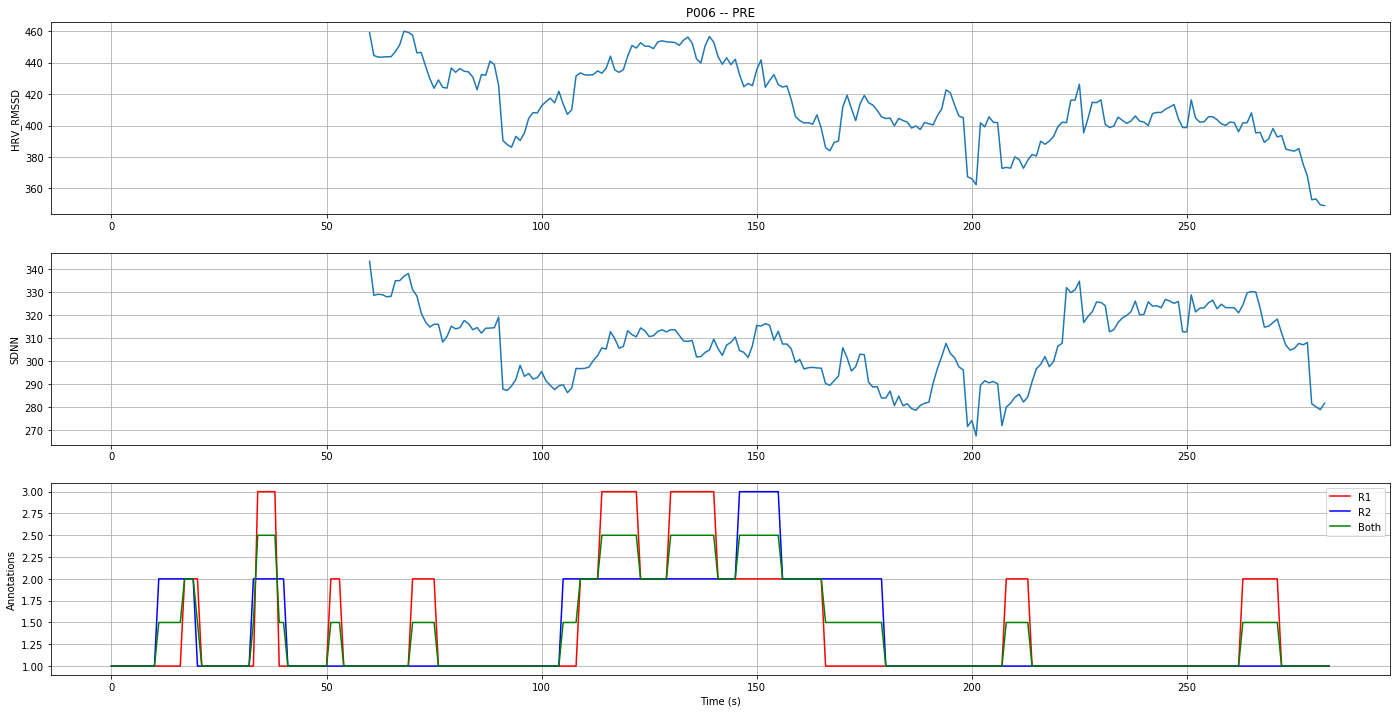

Participant 006 does not have session POST annotations
On P035


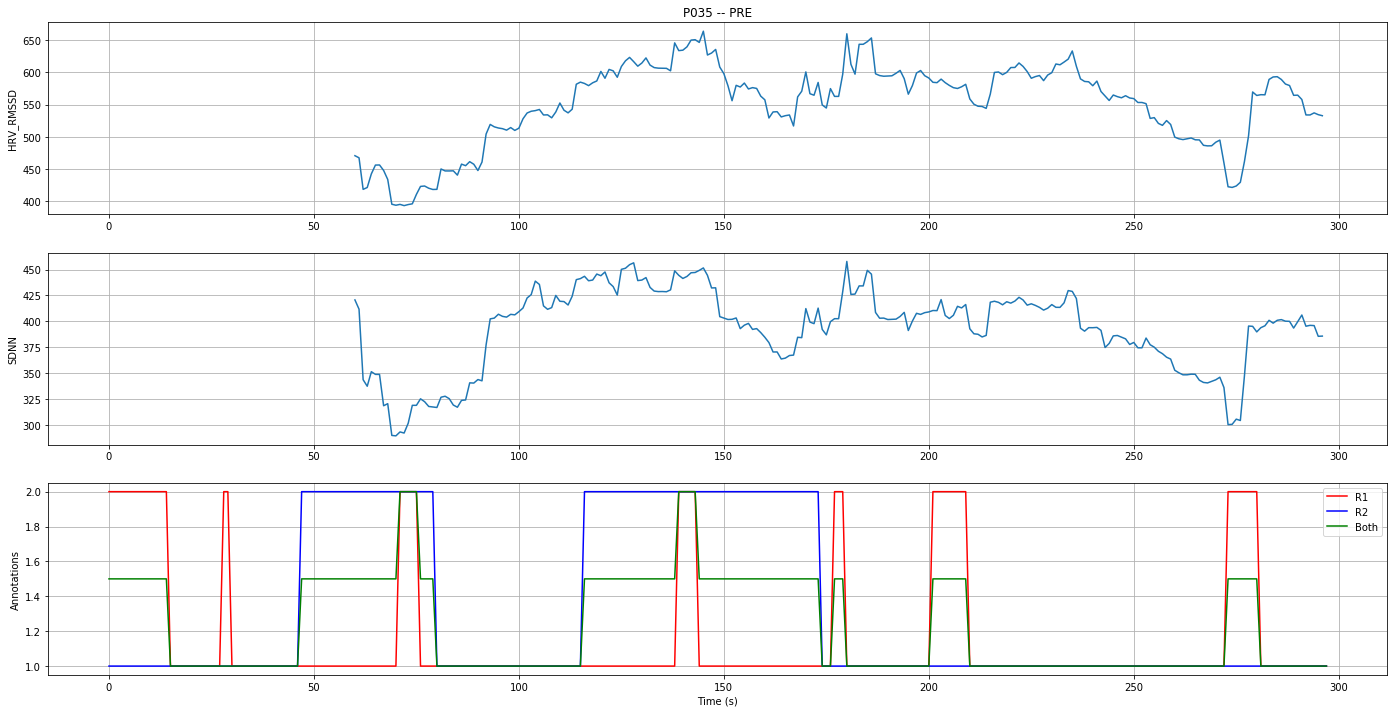

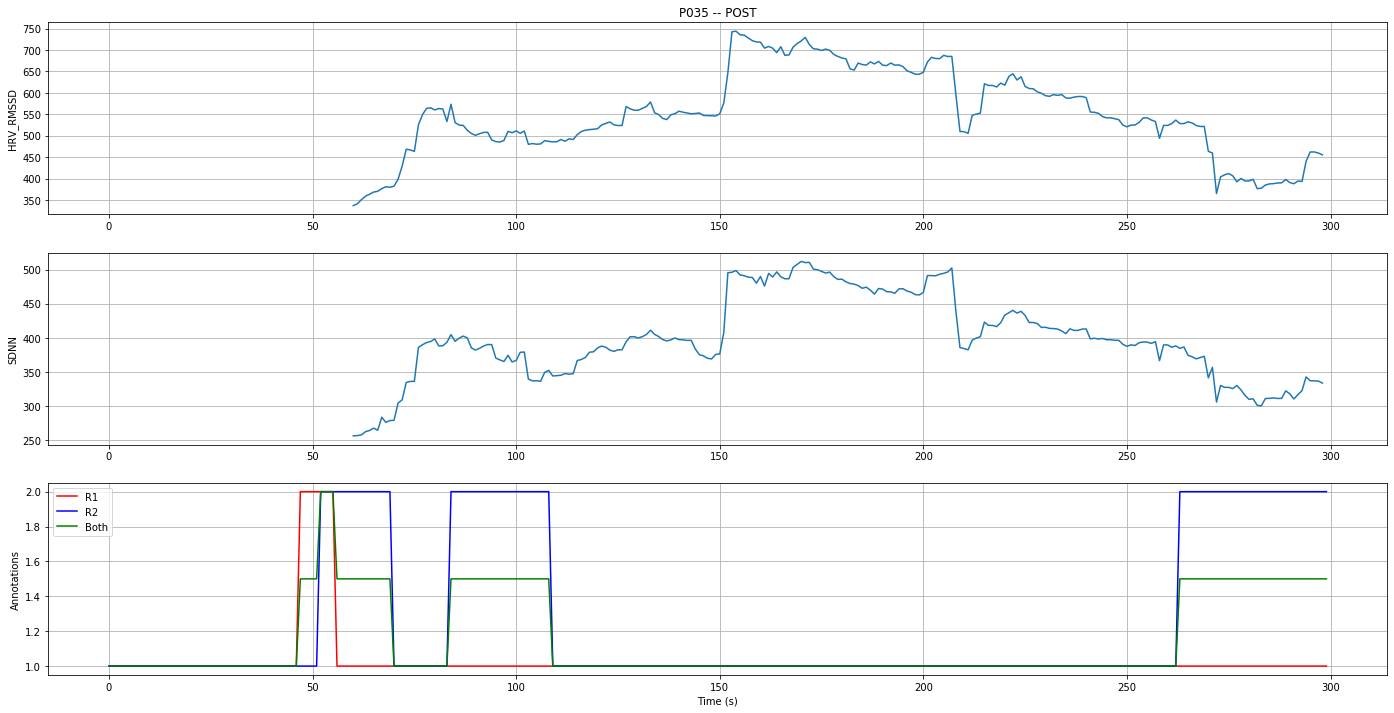

On P033
Participant 033 does not have baseline HR data
On P056


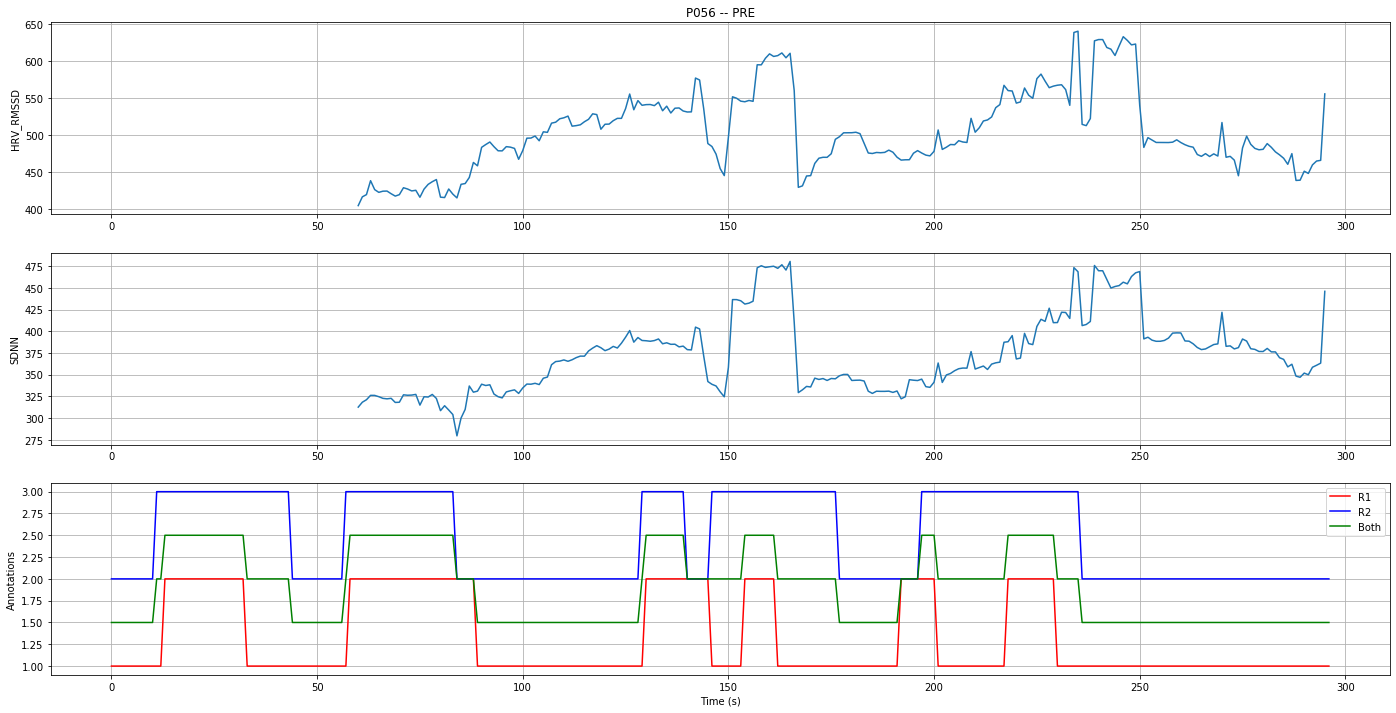

Participant 056 does not have session POST annotations
On P047


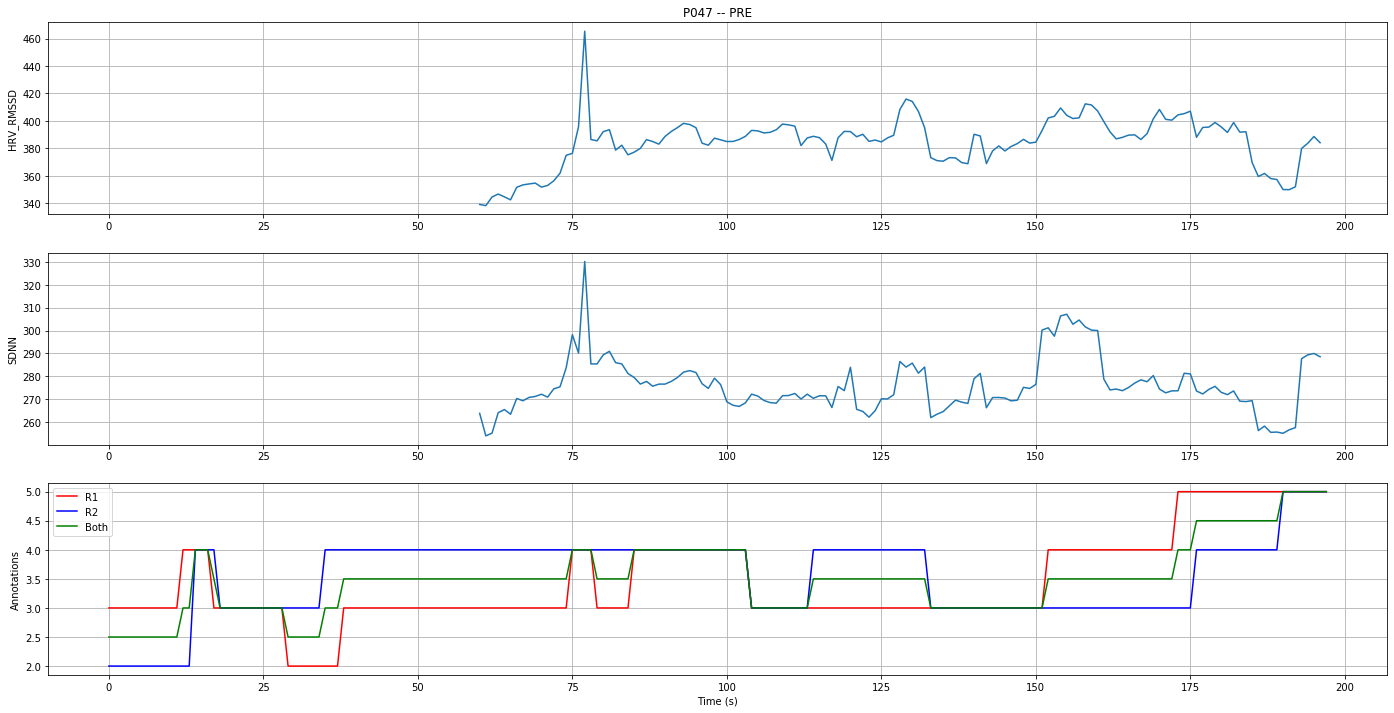

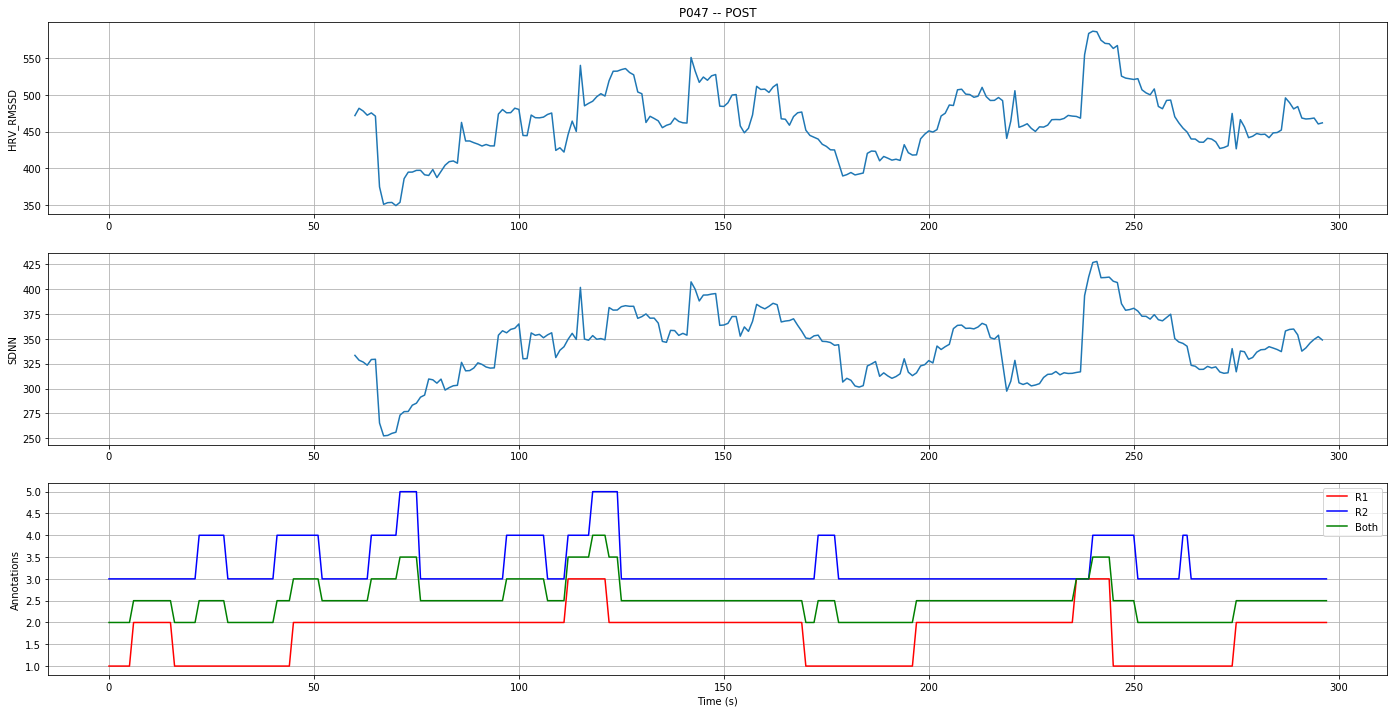

On P036
Participant 036 does not have baseline HR data
On P069
Participant 069 does not have baseline HR data
On P022
Participant 022 does not have baseline HR data
On P037


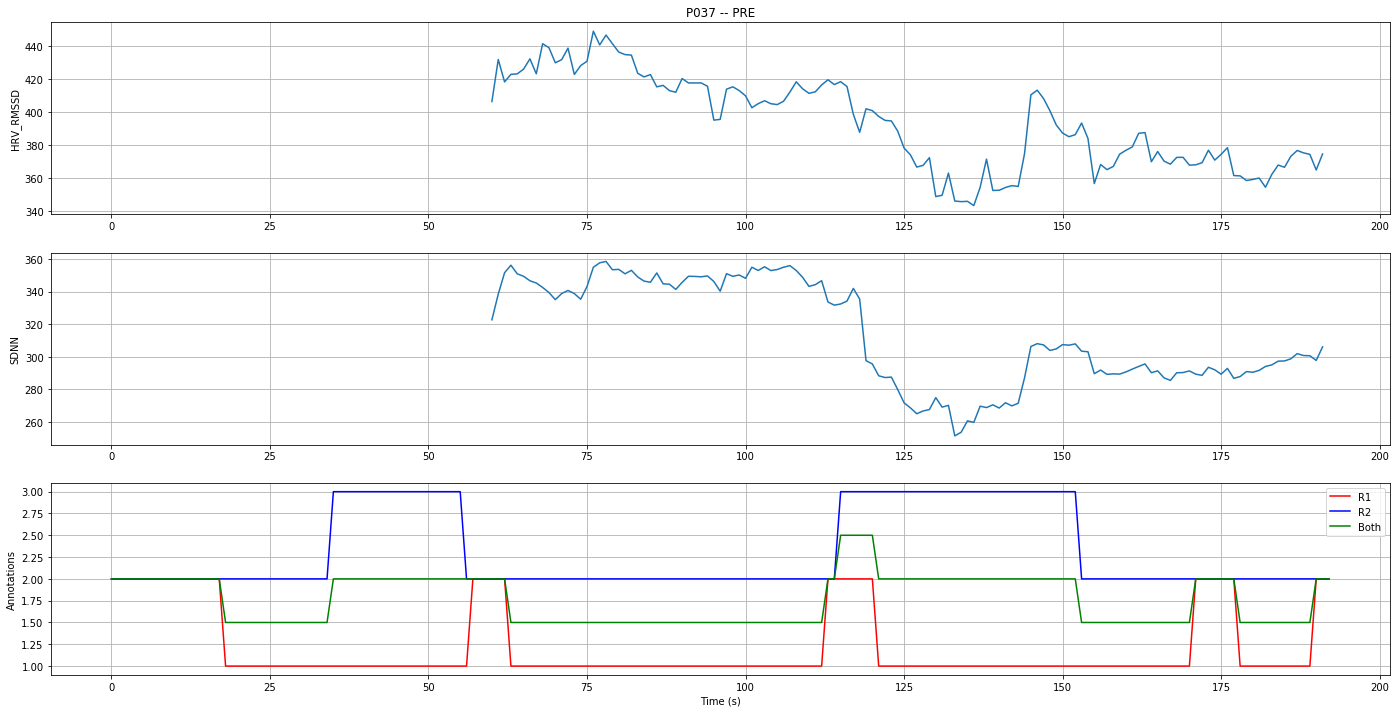

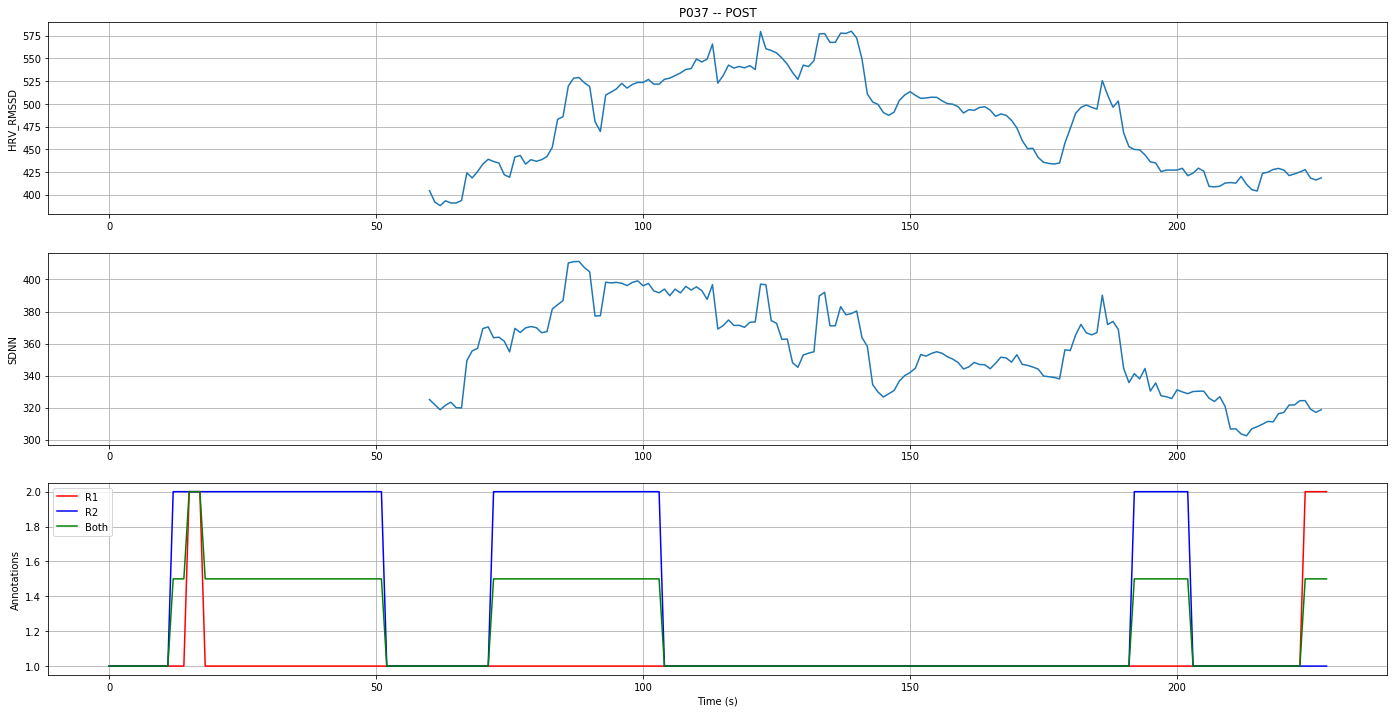

On P060


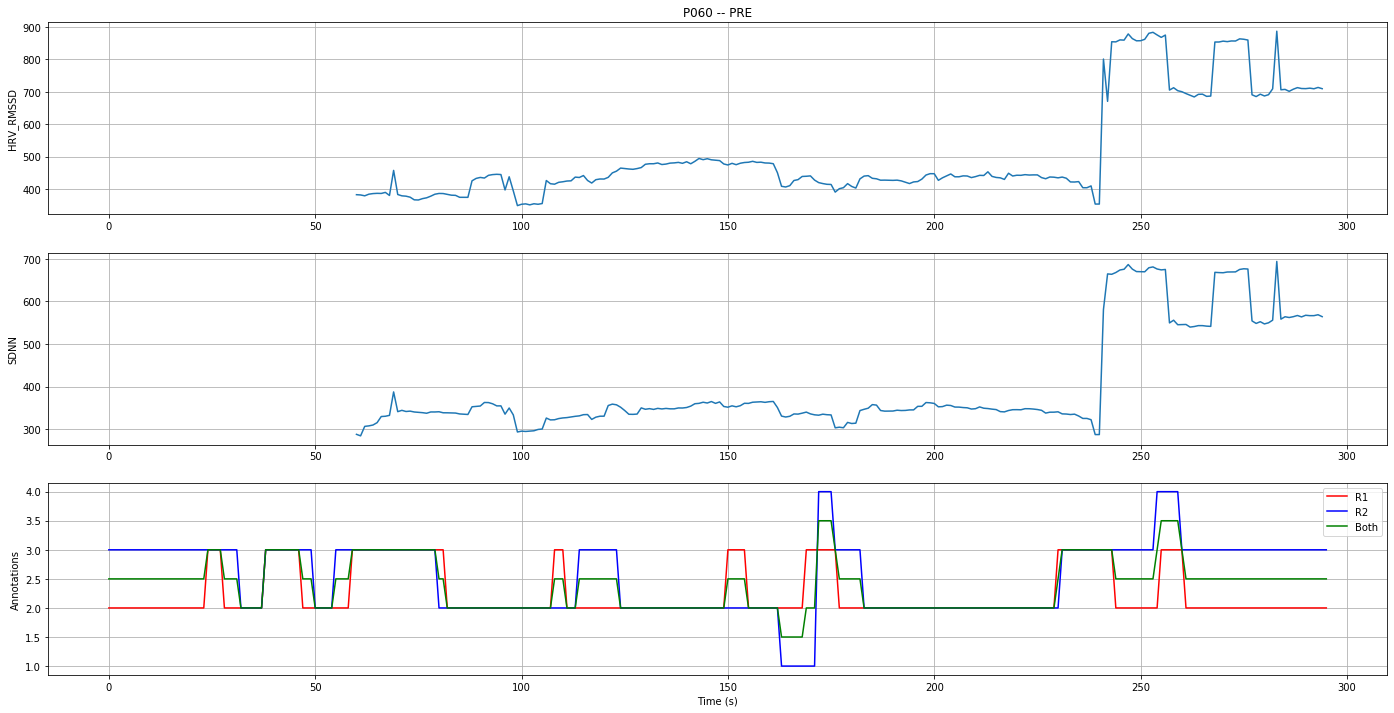

Participant 060 does not have session POST annotations
On P057


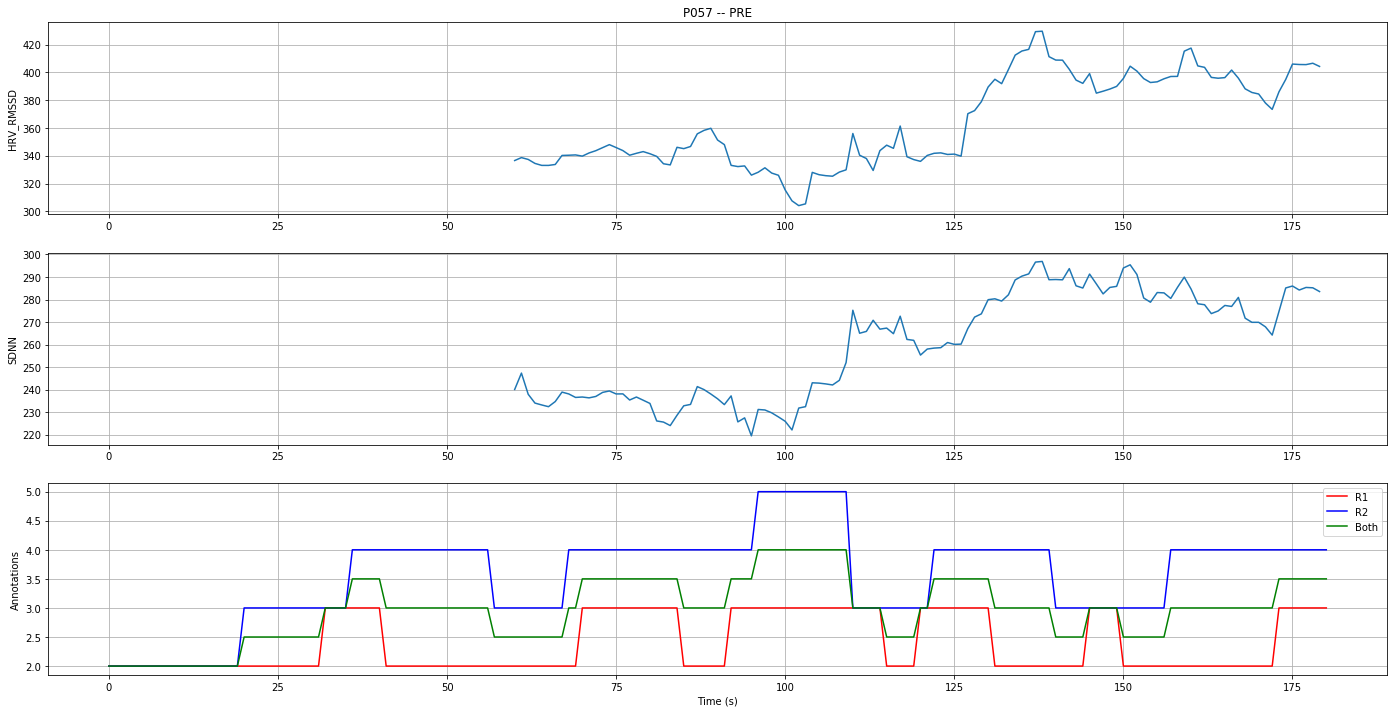

Participant 057 does not have session POST annotations
On P073


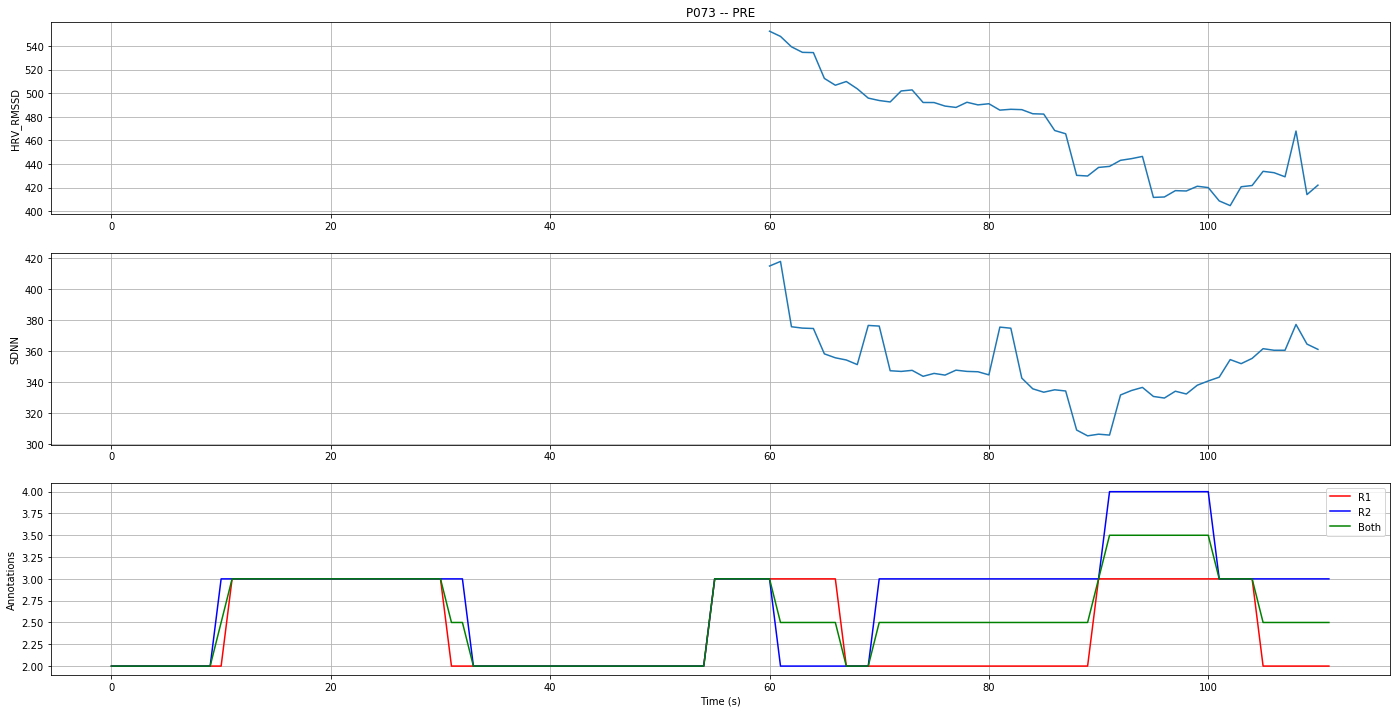

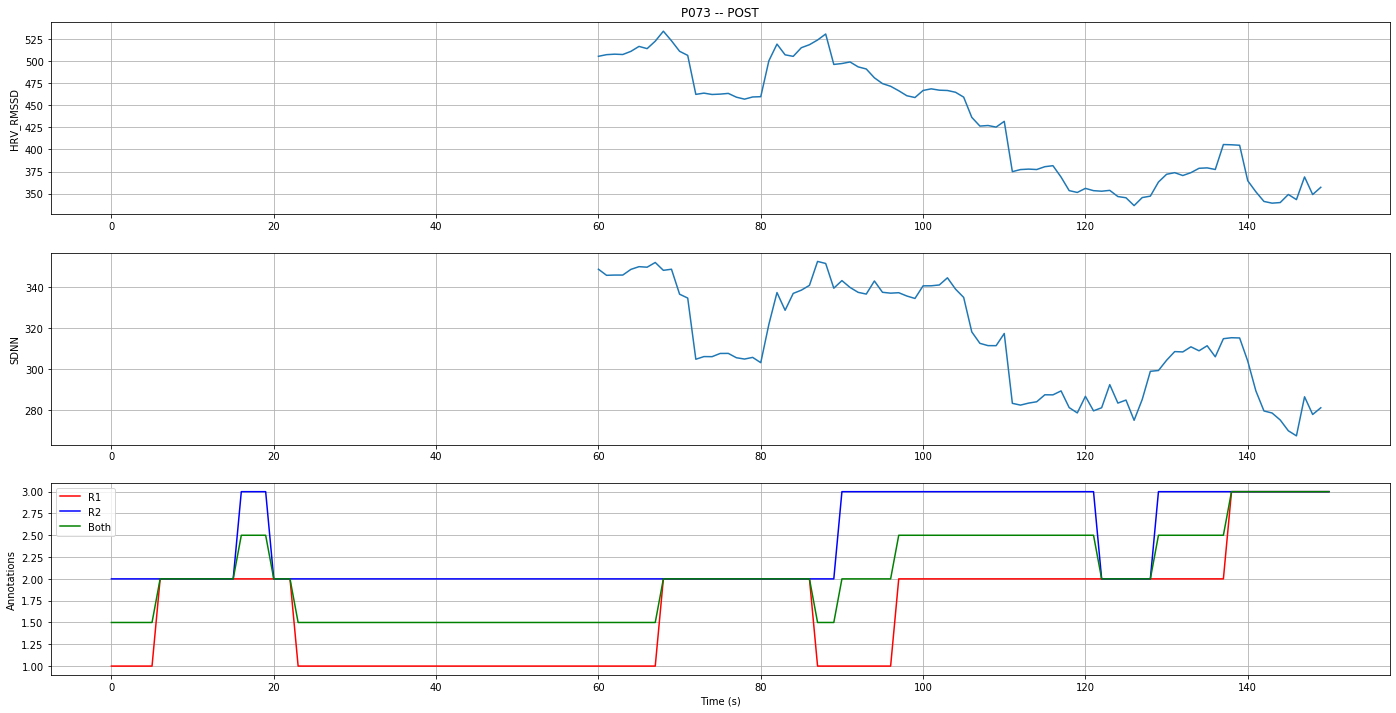

On P014


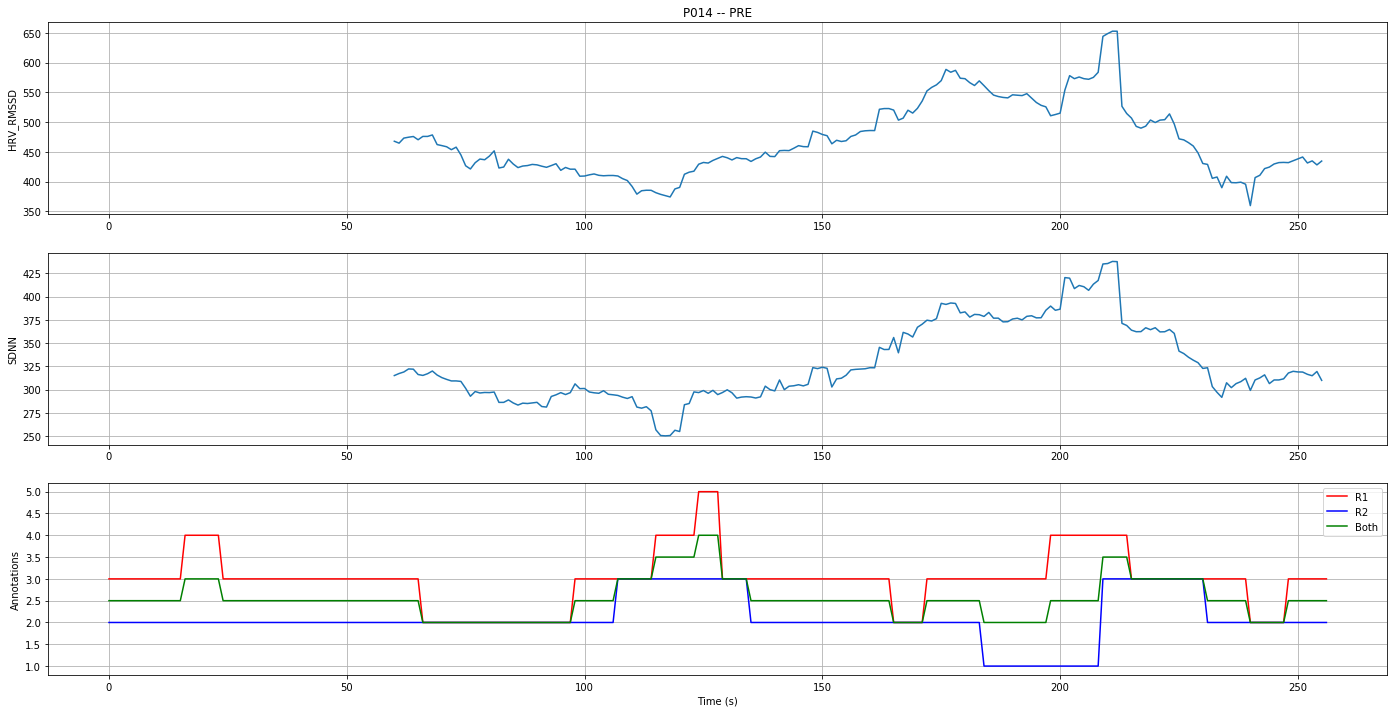

Participant 014 does not have session POST annotations
On P038


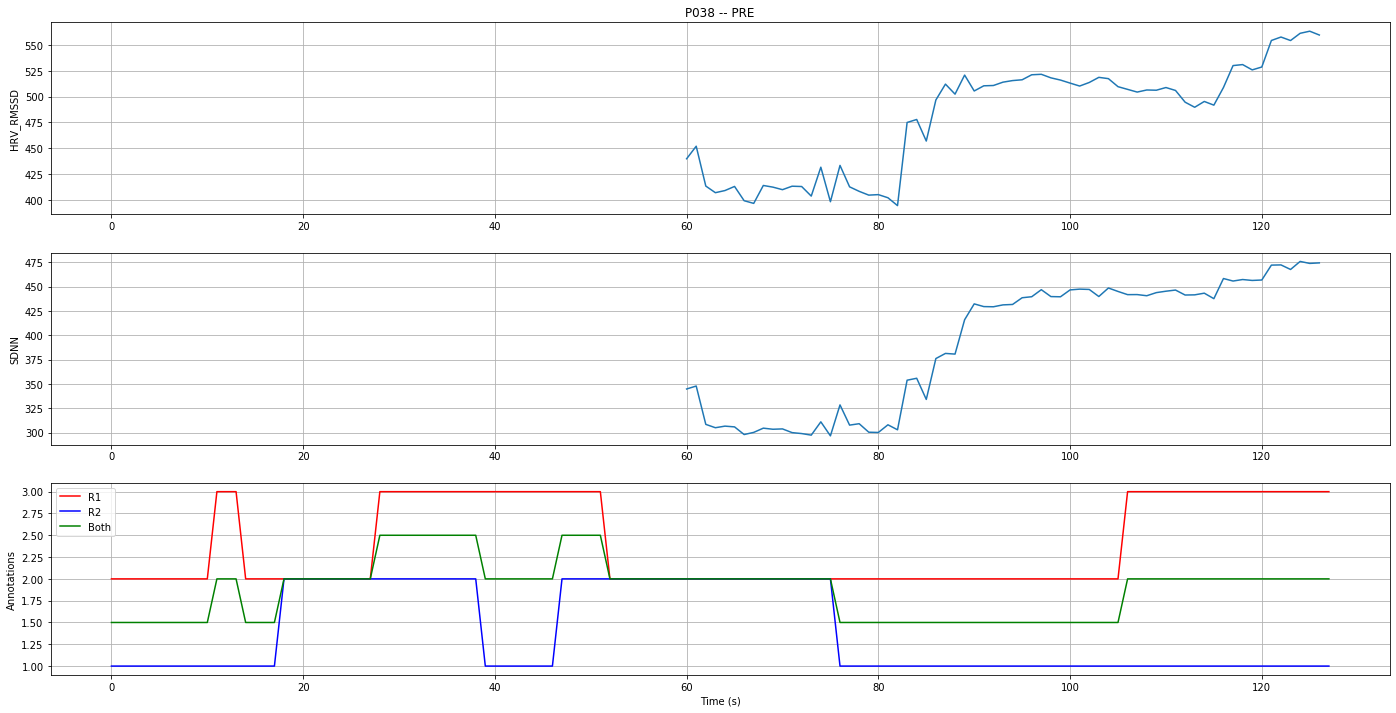

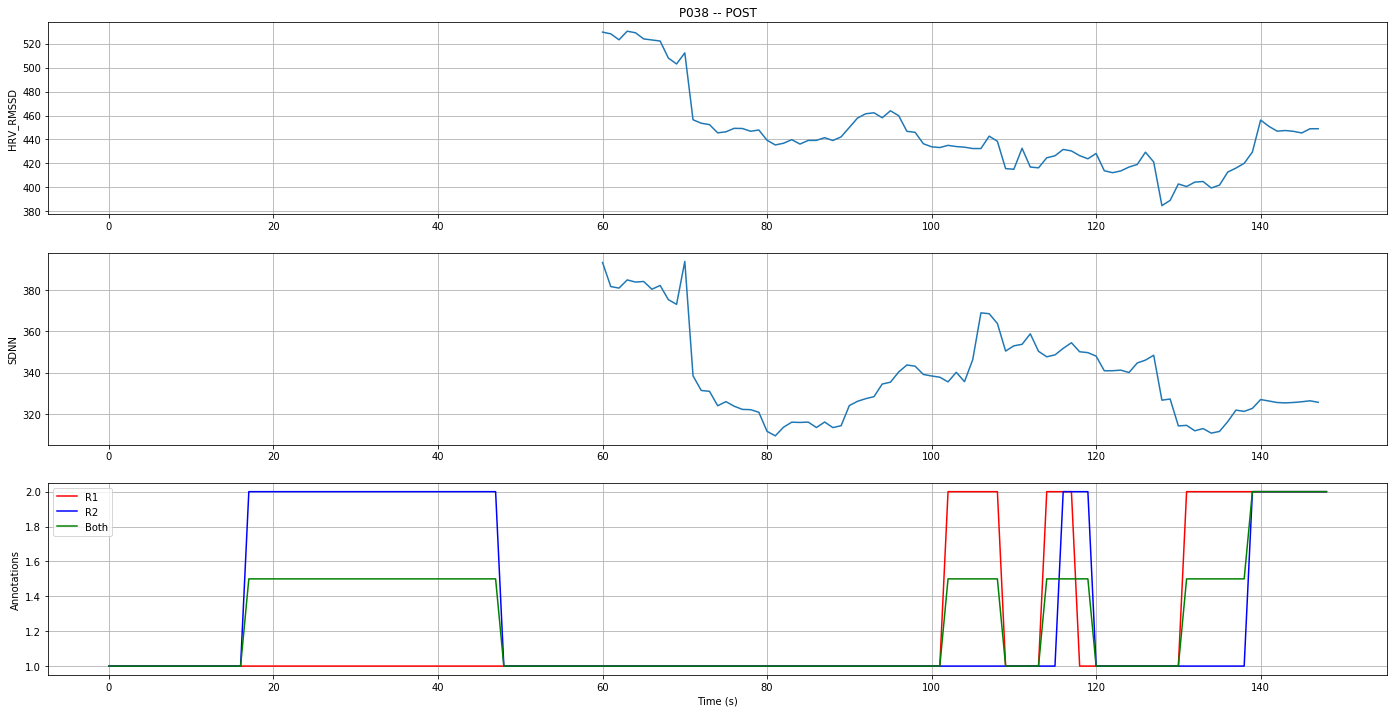

On P029
Participant 029 does not have baseline HR data
On P044


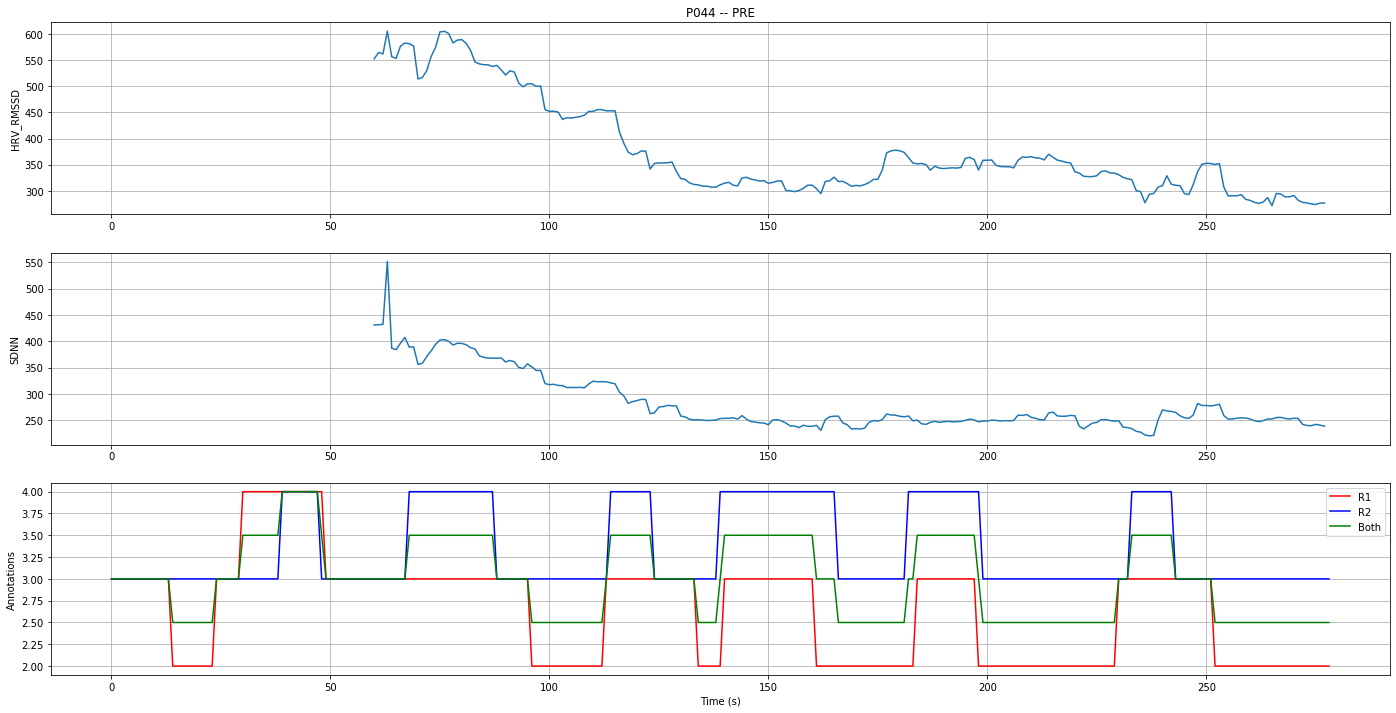

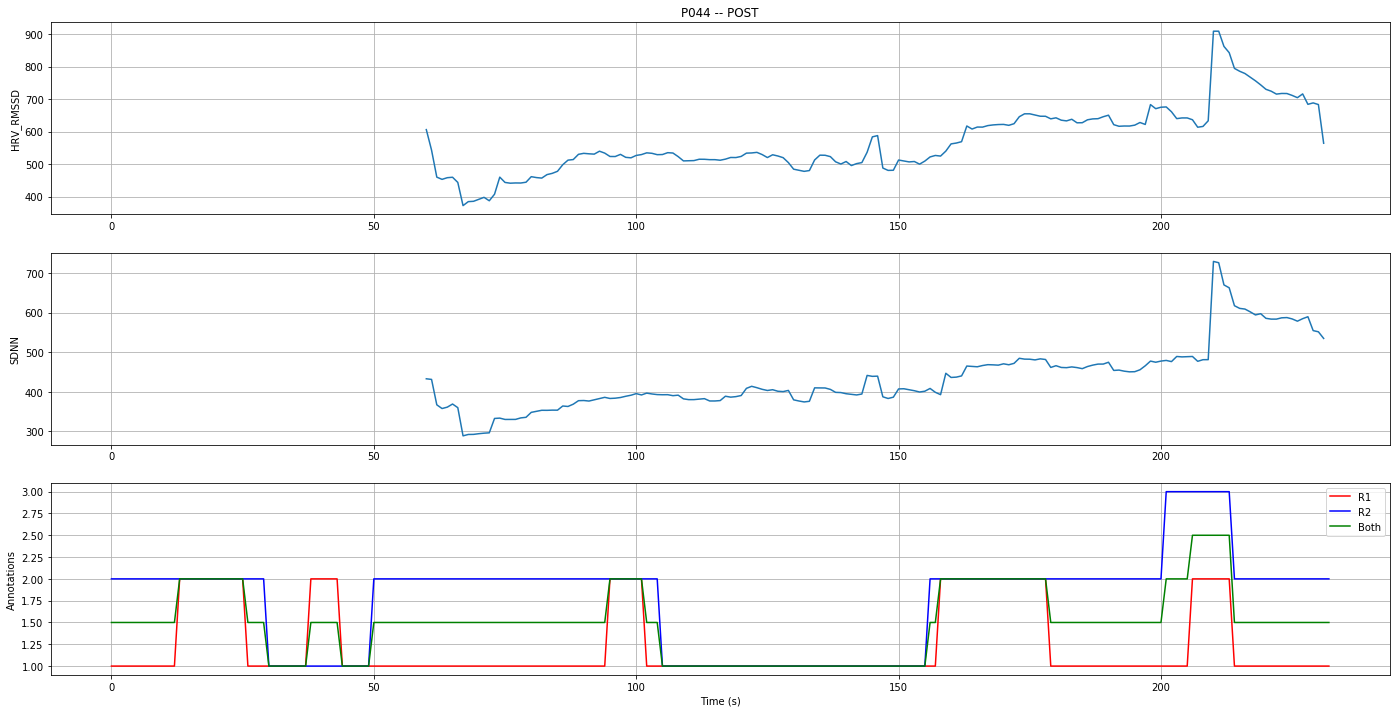

On P009


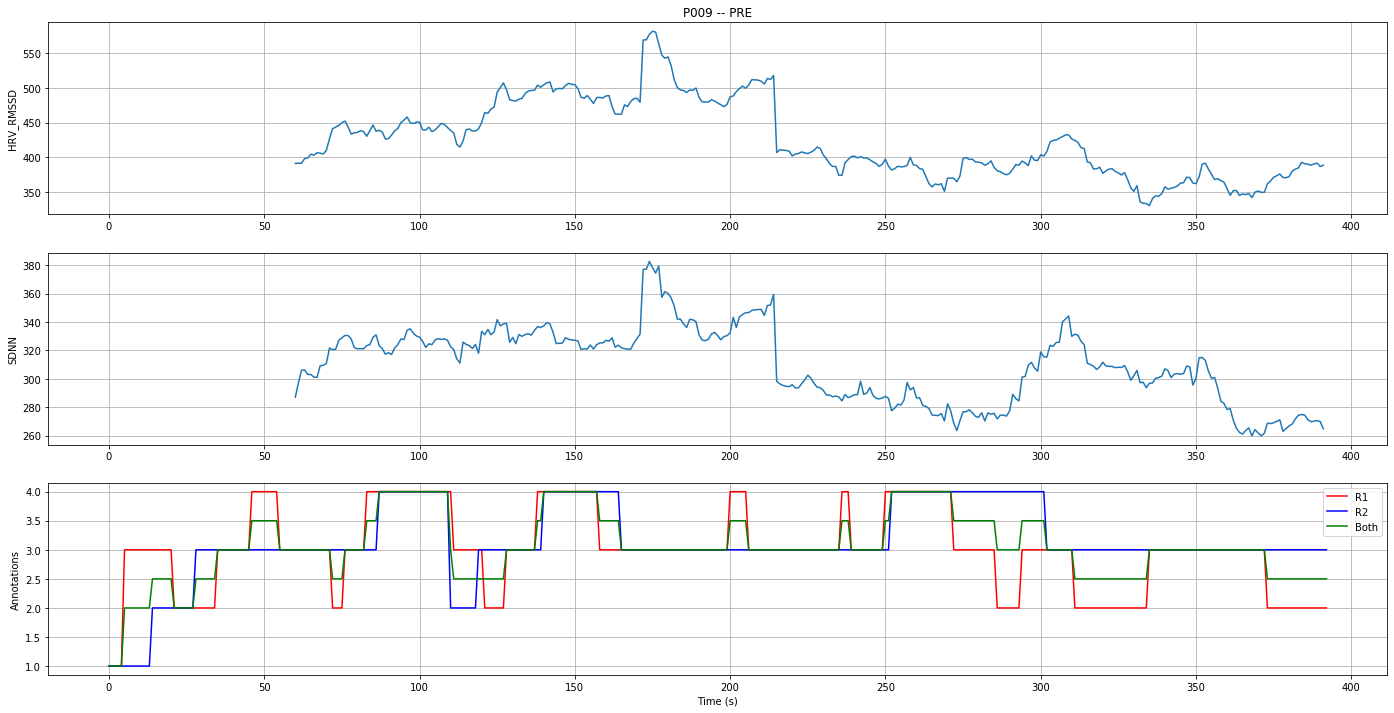

Participant 009 does not have session POST annotations
On P055
Participant 055 does not have baseline HR data


In [10]:
shuffle(pts)

for pt in pts:

    print(f'On P{pt:03d}')
    
    base_path = f'data/raw_data/P{pt:03d}/'

    hr_relax_path = os.path.join(base_path, 'PRE/E4_HR_RELAX.xlsx')
    hr_prep_path = os.path.join(base_path, 'PRE/E4_HR_PREP.xlsx')
    
    bvp_relax_path = os.path.join(base_path, 'PRE/E4_BVP_RELAX.xlsx')
    bvp_prep_path = os.path.join(base_path, 'PRE/E4_BVP_PREP.xlsx')

    try:
        hr_relax_df = pd.read_excel(hr_relax_path, engine='openpyxl')
        hr_prep_df = pd.read_excel(hr_prep_path, engine='openpyxl')
    except IOError:
        print(f'Participant {pt:03d} does not have baseline HR data')
        continue
        
    try:
        bvp_relax_df = pd.read_excel(bvp_relax_path, engine='openpyxl')
        bvp_prep_df = pd.read_excel(bvp_prep_path, engine='openpyxl')
    except IOError:
        print(f'Participant {pt:03d} does not have baseline BVP data')
        continue
        
    hr_relax_avg = hr_relax_df['HR'].mean()
    hr_prep_avg = hr_prep_df['HR'].mean()
    
    frame = bvp_relax_df['BVP'].to_numpy()[-int(64*win_size):]
    frame_clean = nk.ppg_clean(frame, sampling_rate=64)
    info = nk.ppg_findpeaks(frame_clean, sampling_rate=64)
    hrv_relax_df = nk.hrv(info['PPG_Peaks'], sampling_rate=64)
        
    frame = bvp_prep_df['BVP'].to_numpy()[-int(64*win_size):]
    frame_clean = nk.ppg_clean(frame, sampling_rate=64)
    info = nk.ppg_findpeaks(frame_clean, sampling_rate=64)
    hrv_prep_df = nk.hrv(info['PPG_Peaks'], sampling_rate=64)

    
    for session in ['PRE','POST']:

        session_path = os.path.join(base_path, session)
        hr_path = os.path.join(session_path, 'E4_HR_PPT.xlsx')
        bvp_path = os.path.join(session_path, 'E4_BVP_PPT.xlsx')
        annotation_path = os.path.join(session_path, 'annotation.xlsx')
        
        try:
            annotation_df = pd.read_excel(annotation_path, engine='openpyxl')
     
        except IOError:
            print(f'Participant {pt:03d} does not have session {session} annotations')
            continue

        annotations_r1 = annotation_df['R1'].to_numpy()
        annotations_r2 = annotation_df['R2'].to_numpy()

        annotation_times = annotation_df['Time (s)'].to_numpy()
            
        try:
            hr_df = pd.read_excel(hr_path, engine='openpyxl')
            
        except:
            print(f'Participant {pt:03d} does not have session {session} HR data')
            continue
        
        try:
            bvp_df = pd.read_excel(bvp_path, engine='openpyxl')
            
        except:
            print(f'Participant {pt:03d} does not have session {session} HR data')
            continue

        
        # Format data
        
        # Keys: ['HRV_RMSSD', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_SDSD', 'HRV_CVNN',
        #'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',
        #'HRV_pNN50', 'HRV_pNN20', 'HRV_TINN', 'HRV_HTI', 'HRV_ULF', 'HRV_VLF',
        #'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn',
        #'HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2', 'HRV_S', 'HRV_CSI',
        #'HRV_CVI', 'HRV_CSI_Modified', 'HRV_PIP', 'HRV_IALS', 'HRV_PSS',
        #'HRV_PAS', 'HRV_GI', 'HRV_SI', 'HRV_AI', 'HRV_PI', 'HRV_C1d', 'HRV_C1a',
        #'HRV_SD1d', 'HRV_SD1a', 'HRV_C2d', 'HRV_C2a', 'HRV_SD2d', 'HRV_SD2a',
        #'HRV_Cd', 'HRV_Ca', 'HRV_SDNNd', 'HRV_SDNNa', 'HRV_ApEn', 'HRV_SampEn']
        #
        
        # Try: HRV_RMSSD, HRV_SDNN, HRV_pNN50, HRV_HF, HRV_SDNNd, HRV_SDNNa
        hrv_feat = 'HRV_RMSSD'
        
        hr_times = hr_df['Time (s)'].to_numpy()
        hr_data = hr_df['HR'].to_numpy()
        
        hrv_df = features.get_HRV_features(bvp_df['BVP'].to_numpy(), 64, win_size, stride, bvp_df['Time (s)'].to_numpy())
        
        hrv_data = hrv_df[hrv_feat].to_numpy()
        hrv_times = hrv_df['tn'].to_numpy()
        
        hrv_relax_avg = hrv_relax_df[hrv_feat].iat[0]
        hrv_prep_avg = hrv_prep_df[hrv_feat].iat[0]
        
        extra_hrv_data = hrv_df['HRV_SDNN'].to_numpy()
        
        annotations_comb = median_filter(np.mean(np.vstack((annotations_r1, annotations_r2)), axis=0), size=5)

        # Plot data
            
        fig = plt.figure(figsize=(24,12)) 
        

        ax1 = fig.add_subplot(311)
        ax1.plot(hrv_times, hrv_data)
        ax1.grid()
        ax1.set_ylabel(hrv_feat)
        
        plt.title(f'P{pt:03d} -- {session}')

#         plt.axhline(y=hrv_relax_avg, color='green')
#         plt.axhline(y=hrv_prep_avg, color='purple')
        
        ax2 = fig.add_subplot(312,sharex=ax1)
        ax2.plot(hrv_times, extra_hrv_data)
        ax2.grid()
        ax2.set_ylabel('SDNN')
        
        ax3 = fig.add_subplot(313,sharex=ax1)
        ax3.plot(annotation_times, annotations_r1, color='red', label='R1')
        ax3.plot(annotation_times, annotations_r2, color='blue', label='R2')
        ax3.plot(annotation_times, annotations_comb, color='green', label='Both')
        ax3.grid()
        ax3.set_ylabel('Annotations')
        ax3.set_xlabel('Time (s)')
        plt.legend()
                       
        plt.show()
        
        print('=============================================================================================')